## import libraries and dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

drive_path = '/content/drive/MyDrive/us_accidents.csv'
df_loaded = pd.read_csv(drive_path)
print("DataFrame loaded successfully from Google Drive!")
# You can now work with df_loaded
print(df_loaded.head())

df=df_loaded

DataFrame loaded successfully from Google Drive!
    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Suns

In [3]:
# First, let's check the initial shape of the dataframe
print(f"Original dataframe shape: {df.shape}")

# 1. Remove end coordinates columns
df_cleaned = df.drop(['End_Lat', 'End_Lng'], axis=1)
print(f"Shape after removing end coordinates: {df_cleaned.shape}")

# 2. Check missing values in remaining columns
missing_values = df_cleaned.isnull().sum()
print("\nMissing values in remaining columns:")
print(missing_values[missing_values > 0].sort_values(ascending=False))

# 3. Calculate what percentage of rows would be lost if we drop all rows with any missing values
rows_with_missing = df_cleaned.isnull().any(axis=1).sum()
print(f"\nRows with at least one missing value: {rows_with_missing} ({rows_with_missing/len(df_cleaned)*100:.2f}%)")

# 4. Drop rows with missing values
df_no_missing = df_cleaned.dropna()
print(f"\nFinal dataframe shape after dropping rows with missing values: {df_no_missing.shape}")
print(f"Removed {len(df_cleaned) - len(df_no_missing)} rows ({(len(df_cleaned) - len(df_no_missing))/len(df_cleaned)*100:.2f}% of data)")

# 5. Verify there are no more missing values
assert df_no_missing.isnull().sum().sum() == 0, "There are still missing values in the dataframe"
print("Confirmed: No missing values remain in the cleaned dataframe")

# This is our clean dataframe for further processing
df_clean = df_no_missing

Original dataframe shape: (7728394, 46)
Shape after removing end coordinates: (7728394, 44)

Missing values in remaining columns:
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Sunrise_Sunset             23246
Civil_Twilight             23246
Nautical_Twilight          23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
dtype: int64

Rows with at least one missing value: 2520391 (32.61%)

Final dataframe shape after dropping rows with missing values: (5208003, 44)
Removed 2520391 rows (32.61% of data)
Confirmed: No missing val

In [4]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed', errors='coerce')

## data splitting

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# First convert Start_Time to datetime
df_clean['Start_Time'] = pd.to_datetime(df_clean['Start_Time'], format='mixed', errors='coerce')

# Extract year and month for potential time-based analysis
df_clean['Year'] = df_clean['Start_Time'].dt.year
df_clean['Month'] = df_clean['Start_Time'].dt.month

# Sort by time (helpful for understanding time-based trends)
df_clean = df_clean.sort_values('Start_Time')

# Stratified sampling based on 'Severity'
df_train, df_temp = train_test_split(df_clean, test_size=0.25, stratify=df_clean['Severity'], random_state=42)  # 75% train, 25% for val+test
df_val, df_test = train_test_split(df_temp, test_size=0.5, stratify=df_temp['Severity'], random_state=42) # Split remaining 25% into val/test

print(f"Training set: {df_train.shape[0]} samples ({df_train.shape[0]/df_clean.shape[0]:.2%})")
print(f"Validation set: {df_val.shape[0]} samples ({df_val.shape[0]/df_clean.shape[0]:.2%})")
print(f"Test set: {df_test.shape[0]} samples ({df_test.shape[0]/df_clean.shape[0]:.2%})")

# Check severity distribution in each split to ensure representativeness
for split_name, split_df in [('Train', df_train), ('Validation', df_val), ('Test', df_test)]:
    print(f"\n{split_name} Severity Distribution:")
    print(split_df['Severity'].value_counts(normalize=True).sort_index())

/tmp/ipython-input-5-805904049.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Start_Time'] = pd.to_datetime(df_clean['Start_Time'], format='mixed', errors='coerce')
/tmp/ipython-input-5-805904049.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Year'] = df_clean['Start_Time'].dt.year
/tmp/ipython-input-5-805904049.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

Training set: 3906002 samples (75.00%)
Validation set: 651000 samples (12.50%)
Test set: 651001 samples (12.50%)

Train Severity Distribution:
Severity
1    0.011890
2    0.852215
3    0.111963
4    0.023932
Name: proportion, dtype: float64

Validation Severity Distribution:
Severity
1    0.011891
2    0.852215
3    0.111962
4    0.023932
Name: proportion, dtype: float64

Test Severity Distribution:
Severity
1    0.011889
2    0.852215
3    0.111963
4    0.023932
Name: proportion, dtype: float64


## spatial analysis

### coordinate binning

In [6]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def spatial_binning_pipeline(train_df_orig, valid_df_orig, test_df_orig, n_bins=100):
    # Work on copies to avoid modifying original DFs passed to the function,
    # unless that's the desired side-effect. The function returns new DFs.
    print("Training Data Geographic Range:")
    print(f"Lat: {train_df_orig['Start_Lat'].min()} to {train_df_orig['Start_Lat'].max()}")
    print(f"Lng: {train_df_orig['Start_Lng'].min()} to {train_df_orig['Start_Lng'].max()}")

    print("\nValidation Data Geographic Range:")
    print(f"Lat: {valid_df_orig['Start_Lat'].min()} to {valid_df_orig['Start_Lat'].max()}")
    print(f"Lng: {valid_df_orig['Start_Lng'].min()} to {valid_df_orig['Start_Lng'].max()}")

    train_df = train_df_orig.copy()
    valid_df = valid_df_orig.copy()
    test_df = test_df_orig.copy()

    # Step 1: Determine binning boundaries from training data only
    min_lat_train = train_df['Start_Lat'].min()
    max_lat_train = train_df['Start_Lat'].max()
    min_lng_train = train_df['Start_Lng'].min()
    max_lng_train = train_df['Start_Lng'].max()

    # Handle edge case: if min and max are the same for lat or lng
    if min_lat_train == max_lat_train:
        lat_bins = np.array([min_lat_train - 0.00001, max_lat_train + 0.00001]) # Create a tiny bin
    else:
        lat_bins = np.linspace(min_lat_train, max_lat_train, n_bins + 1)

    if min_lng_train == max_lng_train:
        lng_bins = np.array([min_lng_train - 0.00001, max_lng_train + 0.00001]) # Create a tiny bin
    else:
        lng_bins = np.linspace(min_lng_train, max_lng_train, n_bins + 1)

    # Calculate bin centers
    # Ensure lat_bins/lng_bins have at least 2 elements for slicing to work as expected
    lat_centers = (lat_bins[:-1] + lat_bins[1:]) / 2 if len(lat_bins) > 1 else np.array([lat_bins[0]]) if len(lat_bins)==1 else np.array([])
    lng_centers = (lng_bins[:-1] + lng_bins[1:]) / 2 if len(lng_bins) > 1 else np.array([lng_bins[0]]) if len(lng_bins)==1 else np.array([])

    # Step 2: Create binned features for all datasets using train boundaries
    # We will modify train_df, valid_df, test_df directly now

    dfs_to_process_tuples = [('train', train_df), ('valid', valid_df), ('test', test_df)]

    for name, df_current in dfs_to_process_tuples:
        df_current['lat_bin'] = pd.cut(df_current['Start_Lat'], bins=lat_bins, labels=False, include_lowest=True, duplicates='drop')
        df_current['lng_bin'] = pd.cut(df_current['Start_Lng'], bins=lng_bins, labels=False, include_lowest=True, duplicates='drop')

        if len(lat_centers) > 0:
            df_current['lat_bin_center'] = df_current['lat_bin'].map(
                lambda x: lat_centers[int(x)] if pd.notna(x) and 0 <= int(x) < len(lat_centers) else np.nan
            )
        else:
            df_current['lat_bin_center'] = np.nan

        if len(lng_centers) > 0:
            df_current['lng_bin_center'] = df_current['lng_bin'].map(
                lambda x: lng_centers[int(x)] if pd.notna(x) and 0 <= int(x) < len(lng_centers) else np.nan
            )
        else:
            df_current['lng_bin_center'] = np.nan


        # Convert bin numbers to string representations of integers
        # Handle potential NaNs by first converting to nullable integer type, then to string.
        # NaN values in lat_bin/lng_bin will become "<NA>" string with .astype(pd.Int64Dtype()).astype(str)
        # These "<NA>" containing grid_cell_ids will then be set to np.nan by your later logic.

        lat_bin_str = df_current['lat_bin'].astype(pd.Int64Dtype()).astype(str)
        lng_bin_str = df_current['lng_bin'].astype(pd.Int64Dtype()).astype(str)

        df_current['grid_cell_id'] = lat_bin_str + '_' + lng_bin_str
        df_current.loc[lat_bin_str.str.contains('<NA>', na=False) | \
                       lng_bin_str.str.contains('<NA>', na=False), 'grid_cell_id'] = np.nan
        # df_current['grid_cell_id'] = df_current['lat_bin'].astype(str) + '_' + df_current['lng_bin'].astype(str)
        # Handle cases where lat_bin or lng_bin might be NaN after pd.cut (e.g., value outside range)
        df_current.loc[df_current['lat_bin'].isna() | df_current['lng_bin'].isna(), 'grid_cell_id'] = np.nan

        df_current['dist_from_bin_center'] = np.nan # Initialize
        valid_dist_mask = (pd.notna(df_current['Start_Lat']) &
                           pd.notna(df_current['Start_Lng']) &
                           pd.notna(df_current['lat_bin_center']) &
                           pd.notna(df_current['lng_bin_center']))

        df_current.loc[valid_dist_mask, 'dist_from_bin_center'] = np.sqrt(
            (df_current.loc[valid_dist_mask, 'Start_Lat'] - df_current.loc[valid_dist_mask, 'lat_bin_center'])**2 +
            (df_current.loc[valid_dist_mask, 'Start_Lng'] - df_current.loc[valid_dist_mask, 'lng_bin_center'])**2
        )


    train_unique_ids = set(train_df['grid_cell_id'].dropna().unique())
    valid_unique_ids = set(valid_df['grid_cell_id'].dropna().unique())
    common_ids_train_val = train_unique_ids.intersection(valid_unique_ids)
    print(f"Number of common grid_cell_ids between train and validation: {len(common_ids_train_val)}")

    # Step 3: Create aggregated statistics ONLY from training data
    # Use the modified train_df from Step 2
    train_df_for_stats = train_df.dropna(subset=['grid_cell_id'])
    if not train_df_for_stats.empty:
        grid_stats = train_df_for_stats.groupby('grid_cell_id')['Severity'].agg(
            ['mean', 'std', 'count']
        ).reset_index()
        grid_stats.columns = ['grid_cell_id', 'grid_severity_mean', 'grid_severity_std', 'grid_accident_count']
    else:
        grid_stats = pd.DataFrame(columns=['grid_cell_id', 'grid_severity_mean', 'grid_severity_std', 'grid_accident_count'])

    # Step 4: Join statistics back to all datasets
    # The train_df, valid_df, test_df are now directly merged
    if not grid_stats.empty:
        train_df = train_df.merge(grid_stats, on='grid_cell_id', how='left')
        valid_df = valid_df.merge(grid_stats, on='grid_cell_id', how='left')
        test_df = test_df.merge(grid_stats, on='grid_cell_id', how='left')
    else:
        # If grid_stats is empty, ensure the columns exist with NaNs before fillna
        for col_name in ['grid_severity_mean', 'grid_severity_std', 'grid_accident_count']:
            if col_name not in train_df.columns: train_df[col_name] = np.nan
            if col_name not in valid_df.columns: valid_df[col_name] = np.nan
            if col_name not in test_df.columns: test_df[col_name] = np.nan

    # Step 5: Handle NaN values in the newly merged/created stat columns
    # Use the original training data (before any processing in this function) for global aggregates
    # to ensure fill values are based on the true original training distribution of Severity.
    # Step 5: Handle NaN values in the newly merged/created stat columns
    global_severity_mean = train_df_orig['Severity'].mean()
    global_severity_std = train_df_orig['Severity'].std()



    for df_current in [train_df, valid_df, test_df]:
        # These columns should now exist due to Step 4
        # find the total amount of rows with missing grid_severity_mean, grid_severity_std, grid_accident_count
        print(f"current dataset: {len(df_current)}")
        missing_severity_mean_count = df_current['grid_severity_mean'].isna().sum()
        missing_severity_std_count = df_current['grid_severity_std'].isna().sum()
        missing_accident_count_count = df_current['grid_accident_count'].isna().sum()
        print(f"Total rows with missing grid_severity_mean: {missing_severity_mean_count}")
        print(f"Total rows with missing grid_severity_std: {missing_severity_std_count}")
        print(f"Total rows with missing grid_accident_count: {missing_accident_count_count}")

        if 'grid_severity_mean' in df_current.columns:
            df_current['grid_severity_mean'] = df_current['grid_severity_mean'].fillna(global_severity_mean) # MODIFIED
        else:
            df_current['grid_severity_mean'] = global_severity_mean

        if 'grid_severity_std' in df_current.columns:
            df_current['grid_severity_std'] = df_current['grid_severity_std'].fillna(global_severity_std) # MODIFIED
        else:
            df_current['grid_severity_std'] = global_severity_std

        if 'grid_accident_count' in df_current.columns:
            df_current['grid_accident_count'] = df_current['grid_accident_count'].fillna(0) # MODIFIED
        else:
            df_current['grid_accident_count'] = 0

    return train_df, valid_df, test_df

### k-means clustering

In [7]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

def kmeans_spatial_pipeline(train_df, valid_df, test_df, n_clusters=200):
    # Step 1: Fit KMeans on training data only
    coords_train = train_df[['Start_Lat', 'Start_Lng']].copy()
    coords_train = coords_train.fillna(coords_train.mean())

    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(coords_train)

    # Step 2: Transform all datasets
    for df, name in [(train_df, 'train'), (valid_df, 'valid'), (test_df, 'test')]:
        coords = df[['Start_Lat', 'Start_Lng']].copy()
        coords = coords.fillna(coords_train.mean())  # Use training mean for imputation

        # Assign clusters
        df['spatial_cluster'] = kmeans.predict(coords)

        # Get distance to cluster center
        distances = kmeans.transform(coords)
        df['dist_to_cluster_center'] = np.min(distances, axis=1)

        # Get distance to nearest 3 clusters for more granularity
        nearest_clusters = np.argsort(distances, axis=1)[:, :3]
        for i in range(3):
            df[f'nearest_cluster_{i+1}'] = nearest_clusters[:, i]
            df[f'dist_cluster_{i+1}'] = np.take_along_axis(distances, nearest_clusters[:, i:i+1], axis=1).flatten()

    # Step 3: Calculate cluster statistics from training data
    cluster_stats = train_df.groupby('spatial_cluster')['Severity'].agg(
        ['mean', 'std', 'count', 'max', 'min']
    ).reset_index()

    cluster_stats.columns = [
        'spatial_cluster',
        'cluster_severity_mean',
        'cluster_severity_std',
        'cluster_accident_count',
        'cluster_severity_max',
        'cluster_severity_min'
    ]

    # Step 4: Join statistics with all datasets
    train_df = train_df.merge(cluster_stats, on='spatial_cluster', how='left')
    valid_df = valid_df.merge(cluster_stats, on='spatial_cluster', how='left')
    test_df = test_df.merge(cluster_stats, on='spatial_cluster', how='left')

    # Handle NaNs in validation and test sets
    for df in [valid_df, test_df]:
        df['cluster_severity_mean'].fillna(train_df['Severity'].mean(), inplace=True)
        df['cluster_severity_std'].fillna(train_df['Severity'].std(), inplace=True)
        df['cluster_accident_count'].fillna(0, inplace=True)
        df['cluster_severity_max'].fillna(train_df['Severity'].max(), inplace=True)
        df['cluster_severity_min'].fillna(train_df['Severity'].min(), inplace=True)

    # Step 5: Calculate severity range within the cluster
    for df in [train_df, valid_df, test_df]:
        df['cluster_severity_range'] = df['cluster_severity_max'] - df['cluster_severity_min']

    # Step 6: Drop original lat/lng columns (optional)
    # for df in [train_df, valid_df, test_df]:
        # df.drop(['Start_Lat', 'Start_Lng'], axis=1, inplace=False)

    return train_df, valid_df, test_df, kmeans

### geohashing and aggregation

In [8]:
!pip install pygeohash -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.6 MB/s eta 0:00:00


In [9]:
import pygeohash as pgh
import pandas as pd
import numpy as np

def geohash_aggregation_pipeline(train_df_orig, valid_df_orig, test_df_orig, precision_levels=[5, 6, 7]):
    train_df = train_df_orig.copy()
    valid_df = valid_df_orig.copy()
    test_df = test_df_orig.copy()

    # Step 1: Create geohashes at different precision levels
    dfs_to_process = [train_df, valid_df, test_df]
    for df_current in dfs_to_process:
        for precision in precision_levels:
            df_current[f'geohash_{precision}'] = df_current.apply(
                lambda row: pgh.encode(row['Start_Lat'], row['Start_Lng'], precision=precision)
                if pd.notna(row['Start_Lat']) and pd.notna(row['Start_Lng']) else None,
                axis=1
            )

    # Calculate global stats from original training data ONCE for filling NaNs
    # Using train_df_orig to ensure these global stats are from the pristine training set
    train_overall_severity_mean = train_df_orig['Severity'].mean()
    train_overall_severity_std = train_df_orig['Severity'].std()
    train_overall_severity_max = train_df_orig['Severity'].max()
    train_overall_severity_min = train_df_orig['Severity'].min()

    # Step 2: Create aggregated statistics for EACH precision level using ONLY training data
    for precision in precision_levels:
        geohash_col = f'geohash_{precision}'

        # Calculate statistics per geohash area using the (potentially modified) train_df
        train_df_for_stats = train_df.dropna(subset=[geohash_col])
        if not train_df_for_stats.empty:
            geohash_stats = train_df_for_stats.groupby(geohash_col)['Severity'].agg(
                ['mean', 'std', 'count', 'max', 'min']
            ).reset_index()

            geohash_stats.columns = [
                geohash_col,
                f'gh{precision}_severity_mean',
                f'gh{precision}_severity_std',
                f'gh{precision}_accident_count',
                f'gh{precision}_severity_max',
                f'gh{precision}_severity_min'
            ]
        else:
            geohash_stats = pd.DataFrame(columns=[
                geohash_col, f'gh{precision}_severity_mean', f'gh{precision}_severity_std',
                f'gh{precision}_accident_count', f'gh{precision}_severity_max', f'gh{precision}_severity_min'
            ])

        # Join with all datasets (modifying train_df, valid_df, test_df directly)
        if not geohash_stats.empty:
            train_df = train_df.merge(geohash_stats, on=geohash_col, how='left')
            valid_df = valid_df.merge(geohash_stats, on=geohash_col, how='left')
            test_df = test_df.merge(geohash_stats, on=geohash_col, how='left')
        else:
            # If geohash_stats is empty, ensure columns exist before fillna
            for stat_col_suffix in ['severity_mean', 'severity_std', 'accident_count', 'severity_max', 'severity_min']:
                col_name = f'gh{precision}_{stat_col_suffix}'
                if col_name not in train_df.columns: train_df[col_name] = np.nan
                if col_name not in valid_df.columns: valid_df[col_name] = np.nan
                if col_name not in test_df.columns: test_df[col_name] = np.nan

        # Handle NaNs in merged columns for all dataframes
        stat_cols_map = {
            'severity_mean': train_overall_severity_mean,
            'severity_std': train_overall_severity_std,
            'accident_count': 0, # Default count is 0
            'severity_max': train_overall_severity_max,
            'severity_min': train_overall_severity_min
        }

        for df_current in [train_df, valid_df, test_df]:
            for suffix, fill_value in stat_cols_map.items():
                col = f'gh{precision}_{suffix}'
                if col in df_current.columns: # Should exist after merge or explicit creation
                    df_current[col] = df_current[col].fillna(fill_value) # MODIFIED
                else: # Fallback, though ideally not needed
                    df_current[col] = fill_value

            # Calculate severity range within the geohash area
            # Ensure max and min columns are not NaN before subtraction
            max_col_name = f'gh{precision}_severity_max'
            min_col_name = f'gh{precision}_severity_min'
            if pd.notna(df_current[max_col_name]).all() and pd.notna(df_current[min_col_name]).all():
                 df_current[f'gh{precision}_severity_range'] = df_current[max_col_name] - df_current[min_col_name]
            else: # Handle cases where max/min might still be NaN after fill (e.g. if global stats were NaN)
                 df_current[f'gh{precision}_severity_range'] = np.nan


    # Step 3: Create "location granularity" features (density ratios)
    # This part uses the '_accident_count' columns which should have been filled
    for df_current in [train_df, valid_df, test_df]:
        for i in range(len(precision_levels)-1):
            current_prec = precision_levels[i]
            next_prec = precision_levels[i+1]

            current_count_col = f'gh{current_prec}_accident_count'
            next_count_col = f'gh{next_prec}_accident_count'

            # Ensure columns exist and are numeric before division
            if current_count_col in df_current.columns and next_count_col in df_current.columns:
                # .clip(lower=1) on the denominator to avoid division by zero
                denominator = df_current[next_count_col].clip(lower=1)
                df_current[f'gh{current_prec}_to_{next_prec}_density_ratio'] = \
                    df_current[current_count_col] / denominator
            else:
                df_current[f'gh{current_prec}_to_{next_prec}_density_ratio'] = np.nan

    # Step 4: Drop original lat/lng columns (optional, and not affecting returned DFs due to inplace=False)
    # for df_current in [train_df, valid_df, test_df]:
    #     df_current.drop(['Start_Lat', 'Start_Lng'], axis=1, inplace=False)

    return train_df, valid_df, test_df

### API data enhancement

In [10]:
import pandas as pd
import numpy as np
import requests

def external_data_pipeline(train_df, valid_df, test_df, kmeans_model):
    # Step 1: Get representative points for each cluster (from training data)
    cluster_centers = kmeans_model.cluster_centers_

    # Step 2: Query external APIs for these representative points
    # For each cluster center, we'll gather data once and apply to all points in that cluster
    cluster_features = {}

    for cluster_id, center in enumerate(cluster_centers):
        lat, lng = center

        # Example: Query OpenStreetMap API for road density
        # This is just a placeholder - replace with actual API calls
        try:
            # OpenStreetMap Overpass API (example)
            overpass_url = "https://overpass-api.de/api/interpreter"
            overpass_query = f"""
            [out:json];
            (
              way["highway"](around:1000,{lat},{lng});
            );
            out count;
            """

            response = requests.post(overpass_url, data={"data": overpass_query})
            if response.status_code == 200:
                result = response.json()
                road_count = len(result.get('elements', []))
            else:
                road_count = np.nan

            # Example: Get population density from another API
            # Replace with actual implementation
            population_density = np.random.randint(100, 10000)  # Placeholder

            # Store features for this cluster
            cluster_features[cluster_id] = {
                'road_density': road_count / (3.14 * 1000**2),  # roads per sq km
                'population_density': population_density
            }

        except Exception as e:
            print(f"Error fetching data for cluster {cluster_id}: {e}")
            cluster_features[cluster_id] = {
                'road_density': np.nan,
                'population_density': np.nan
            }

    # Step 3: Join these features to all datasets
    for df in [train_df, valid_df, test_df]:
        # Initialize new columns
        df['road_density'] = np.nan
        df['population_density'] = np.nan

        # Populate based on cluster
        for cluster_id, features in cluster_features.items():
            mask = df['spatial_cluster'] == cluster_id
            for feature_name, value in features.items():
                df.loc[mask, feature_name] = value

    # Step 4: Impute missing values
    for df in [train_df, valid_df, test_df]:
        for col in ['road_density', 'population_density']:
            # Use training data median for imputation
            median_value = train_df[col].median()
            df[col].fillna(median_value, inplace=True)

    return train_df, valid_df, test_df

### full pipeline of spatial analysis

In [11]:
def complete_spatial_feature_pipeline(train_df, valid_df, test_df):
    print("Phase 1: Implementing spatial binning...")
    # Assuming spatial_binning_pipeline takes original DFs and returns modified copies
    train_df, valid_df, test_df = spatial_binning_pipeline(
        train_df, valid_df, test_df, n_bins=50
    ) # Pass n_bins as specified in your original call

    print("Phase 2: Implementing geohash aggregation...")
    # Assuming geohash_aggregation_pipeline also takes original DFs and returns modified copies
    train_df, valid_df, test_df = geohash_aggregation_pipeline(
        train_df, valid_df, test_df, precision_levels=[4, 5, 6] # Pass precision_levels
    )

    # print("Phase 3: Implementing K-means clustering...") # SKIPPING FOR NOW
    # train_df, valid_df, test_df, kmeans_model = kmeans_spatial_pipeline(
    #     train_df, valid_df, test_df, n_clusters=150
    # )

    # print("Phase 4: Enhancing with external data...") # SKIPPED

    # print("Phase 5: Creating interaction features...") # SKIPPING FOR NOW (was dependent on K-Means output)
    # # Create interaction features between weather and spatial info
    # for df in [train_df, valid_df, test_df]:
    #     # Example: Interaction between weather conditions and location clusters
    #     if 'WeatherGroup_Clear' in df.columns: # This would need cluster_accident_count
    #         df['clear_weather_in_dense_area'] = df['WeatherGroup_Clear'] * (df['cluster_accident_count'] > df['cluster_accident_count'].median())
    #
    #     # Interaction between time of day and location
    #     if 'PartOfDay_Night' in df.columns: # This would need cluster_accident_count
    #         df['night_accident_in_dense_area'] = df['PartOfDay_Night'] * (df['cluster_accident_count'] > df['cluster_accident_count'].median())

    print("Spatial feature engineering (Phases 1 & 2) complete!")
    # If K-Means was run, you'd return kmeans_model too. For now, just the DFs.
    return train_df, valid_df, test_df

In [12]:
# Make sure df_train, df_val, df_test are your original splits before this line
# It's also good practice to pass copies if you intend to keep the truly original DFs unchanged for other purposes,
# though the spatial pipeline functions should also be working on copies internally if designed robustly.

df_train_with_spatial_features, df_val_with_spatial_features, df_test_with_spatial_features = \
    complete_spatial_feature_pipeline(df_train.copy(), df_val.copy(), df_test.copy())

# Now, df_train_with_spatial_features (and val/test) should contain all the new spatial columns.
# You would then pass these to your engineer_features function:

# Example:
print("Columns in df_train_with_spatial_features BEFORE engineer_features:", df_train_with_spatial_features.columns.tolist()) # Add this to verify!

Phase 1: Implementing spatial binning...
Training Data Geographic Range:
Lat: 24.5548 to 49.000759
Lng: -124.548074 to -67.48413000000001

Validation Data Geographic Range:
Lat: 24.570087 to 49.002201
Lng: -124.548074 to -68.54053
Number of common grid_cell_ids between train and validation: 1298
current dataset: 3906002
Total rows with missing grid_severity_mean: 0
Total rows with missing grid_severity_std: 55
Total rows with missing grid_accident_count: 0
current dataset: 651000
Total rows with missing grid_severity_mean: 4
Total rows with missing grid_severity_std: 17
Total rows with missing grid_accident_count: 4
current dataset: 651001
Total rows with missing grid_severity_mean: 12
Total rows with missing grid_severity_std: 31
Total rows with missing grid_accident_count: 12
Phase 2: Implementing geohash aggregation...
Spatial feature engineering (Phases 1 & 2) complete!
Columns in df_train_with_spatial_features BEFORE engineer_features: ['ID', 'Source', 'Severity', 'Start_Time', 'E

In [13]:
# After this call:
# df_train_with_spatial_features_spatial, df_val_spatial, df_test_spatial = complete_spatial_feature_pipeline(
#     df_train_with_spatial_features.copy(), df_val.copy(), df_test.copy()
# )

print("Columns in df_train_with_spatial_features_spatial BEFORE engineer_features:", df_train_with_spatial_features.columns.tolist())
print("First 5 rows of df_train_with_spatial_features (sample of spatial features):")
spatial_feature_sample_names = ['Start_Lat', 'Start_Lng', 'lat_bin', 'grid_cell_id', 'geohash_4'] # Add a few key ones
existing_sample_cols = [col for col in spatial_feature_sample_names if col in df_train_with_spatial_features.columns]
if existing_sample_cols:
    print(df_train_with_spatial_features[existing_sample_cols].head())
else:
    print("None of the sample spatial features found in df_train_with_spatial_features_spatial.")


# Then you call engineer_features:
# df_train_with_spatial_features_eng = engineer_features(df_train_with_spatial_features_spatial, is_training=True)
# ...

Columns in df_train_with_spatial_features_spatial BEFORE engineer_features: ['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Year', 'Month', 'lat_bin', 'lng_bin', 'lat_bin_center', 'lng_bin_center', 'grid_cell_id', 'dist_from_bin_center', 'grid_severity_mean', 'grid_severity_std', 'grid_accident_count', 'geohash_4', 'geohash_5', 'geohash_6', 'gh4_severity_mean', 'gh4_severity_std', 'gh4_accident_count', 'gh4_severity

## feature engineering and preprocessing pipeline

In [14]:
def engineer_features(df, is_training=True):
    """
    Comprehensive feature engineering pipeline for accident severity prediction

    Parameters:
    df (pd.DataFrame): Input dataframe
    is_training (bool): Whether this is the training set (affects how some operations are performed)

    Returns:
    pd.DataFrame: Dataframe with engineered features
    """
    # Make a copy to avoid modifying the original
    df_processed = df.copy()

    # ===== 1. DATETIME FEATURES =====
    print("Creating datetime features...")

    # Ensure datetime format
    df_processed['Start_Time'] = pd.to_datetime(df_processed['Start_Time'])

    # Extract basic time components
    df_processed['Year'] = df_processed['Start_Time'].dt.year
    df_processed['Month'] = df_processed['Start_Time'].dt.month
    df_processed['Day'] = df_processed['Start_Time'].dt.day
    df_processed['Hour'] = df_processed['Start_Time'].dt.hour
    df_processed['Minute'] = df_processed['Start_Time'].dt.minute
    df_processed['DayOfWeek'] = df_processed['Start_Time'].dt.dayofweek  # 0=Monday, 6=Sunday

    # Create meaningful time-related features based on EDA
    df_processed['IsRushHourMorning'] = df_processed['Hour'].isin([7, 8, 9]).astype(int)
    df_processed['IsRushHourEvening'] = df_processed['Hour'].isin([16, 17, 18]).astype(int)
    df_processed['IsRushHour'] = df_processed['IsRushHourMorning'] | df_processed['IsRushHourEvening']
    df_processed['IsWeekend'] = (df_processed['DayOfWeek'] >= 5).astype(int)
    df_processed['IsWinter'] = df_processed['Month'].isin([11, 12, 1]).astype(int)

    # Time since midnight (continuous feature)
    df_processed['HourSinceMidnight'] = df_processed['Hour'] + df_processed['Minute']/60

    # Part of day (categorical)
    bins = [0, 6, 12, 18, 24]
    labels = ['Night', 'Morning', 'Afternoon', 'Evening']
    df_processed['PartOfDay'] = pd.cut(df_processed['Hour'], bins=bins, labels=labels, include_lowest=True)

    # ===== 2. LOCATION FEATURES =====
    print("Creating location features...")


    # US Region based on state (Census Bureau regions)
    northeast = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA']
    midwest = ['OH', 'MI', 'IN', 'IL', 'WI', 'MN', 'IA', 'MO', 'KS', 'NE', 'SD', 'ND']
    south = ['DE', 'MD', 'DC', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL', 'KY', 'TN', 'AL', 'MS', 'AR', 'LA', 'OK', 'TX']
    west = ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'CA', 'OR', 'WA', 'AK', 'HI']

    df_processed['Region'] = None
    if 'State' in df_processed.columns:
        df_processed.loc[df_processed['State'].isin(northeast), 'Region'] = 'Northeast'
        df_processed.loc[df_processed['State'].isin(midwest), 'Region'] = 'Midwest'
        df_processed.loc[df_processed['State'].isin(south), 'Region'] = 'South'
        df_processed.loc[df_processed['State'].isin(west), 'Region'] = 'West'

    # ===== 3. DISTANCE AND ROAD FEATURES =====
    print("Processing distance and road features...")

    # Distance categories (from EDA findings)
    df_processed['DistanceCategory'] = pd.cut(
        df_processed['Distance(mi)'],
        bins=[-0.001, 1, 5, 10, float('inf')],
        labels=['Very Short', 'Short', 'Medium', 'Long'],
        include_lowest=True
    )

    # Create intersection complexity score
    intersection_features = ['Junction', 'Crossing', 'Traffic_Signal', 'Stop', 'Give_Way']
    for feature in intersection_features:
        # Fill missing values with False (0)
        if feature in df_processed.columns:
            df_processed[feature] = df_processed[feature].fillna(False).astype(int)

    # Create complexity score if all required features exist
    if all(feature in df_processed.columns for feature in intersection_features):
        df_processed['IntersectionComplexity'] = (
            df_processed['Junction'] +
            df_processed['Crossing'] +
            df_processed['Traffic_Signal'] +
            df_processed['Stop'] +
            df_processed['Give_Way']
        )

        # Road feature combinations that showed significance in EDA
        df_processed['JunctionWithSignal'] = (df_processed['Junction'] & df_processed['Traffic_Signal']).astype(int)
        df_processed['CrossingWithSignal'] = (df_processed['Crossing'] & df_processed['Traffic_Signal']).astype(int)

    # Fill other road features with False (0) if missing
    road_features = ['Amenity', 'Bump', 'Railway', 'Roundabout', 'Station',
                    'Traffic_Calming', 'Turning_Loop', 'No_Exit']
    for feature in road_features:
        if feature in df_processed.columns:
            df_processed[feature] = df_processed[feature].fillna(False).astype(int)

    # ===== 4. WEATHER FEATURES =====
    print("Processing weather features...")

    # Group weather conditions (from EDA)
    if 'Weather_Condition' in df_processed.columns:
        weather_mapping = {
            'Clear': 'Clear',
            'Fair': 'Clear',
            'Partly Cloudy': 'PartlyCloudy',
            'Mostly Cloudy': 'MostlyCloudy',
            'Cloudy': 'Cloudy',
            'Overcast': 'Cloudy',
            'Fog': 'Poor Visibility',
            'Haze': 'Poor Visibility',
            'Smoke': 'Poor Visibility',
            'Light Rain': 'Light Precipitation',
            'Light Snow': 'Light Precipitation',
            'Light Drizzle': 'Light Precipitation',
            'Rain': 'Precipitation',
            'Snow': 'Precipitation',
            'Heavy Rain': 'Heavy Precipitation',
            'Heavy Snow': 'Heavy Precipitation',
            'Thunderstorm': 'Severe',
            'Thunder': 'Severe',
            'Tornado': 'Severe',
            'Squalls': 'Severe',
            'Heavy Thunderstorms': 'Severe'
        }

        # Apply mapping with a default for unmatched conditions
        df_processed['WeatherGroup'] = df_processed['Weather_Condition'].map(
            lambda x: weather_mapping.get(x, 'Other') if not pd.isna(x) else 'Unknown'
        )

    # Temperature categories
    if 'Temperature(F)' in df_processed.columns:
        df_processed['TemperatureCategory'] = pd.cut(
            df_processed['Temperature(F)'],
            bins=[-float('inf'), 32, 50, 70, 85, float('inf')],
            labels=['Freezing', 'Cold', 'Moderate', 'Warm', 'Hot']
        )

    # Precipitation and visibility indicators
    if 'Precipitation(in)' in df_processed.columns:
        df_processed['HasPrecipitation'] = (df_processed['Precipitation(in)'] > 0).astype(int)

    if 'Visibility(mi)' in df_processed.columns:
        df_processed['PoorVisibility'] = (df_processed['Visibility(mi)'] < 5).astype(int)

    # Wind categories
    if 'Wind_Speed(mph)' in df_processed.columns:
        df_processed['WindCategory'] = pd.cut(
            df_processed['Wind_Speed(mph)'],
            bins=[-0.001, 5, 15, 30, float('inf')],
            labels=['Low', 'Moderate', 'High', 'Very High'],
            include_lowest=True
        )

    # Twilight features
    twilight_cols = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
    for col in twilight_cols:
        if col in df_processed.columns:
            df_processed[col] = df_processed[col].map({'Day': 0, 'Night': 1}).fillna(0)

    # ===== 5. HANDLING CATEGORICAL FEATURES =====
    # ===== 5. HANDLING CATEGORICAL FEATURES =====
    print("Encoding categorical features...")

    # Define all columns that are potentially categorical at the start of this section
    initial_potential_cats = [
        'State', 'Region', 'PartOfDay', 'DistanceCategory',
        'WeatherGroup', 'TemperatureCategory', 'WindCategory', 'Wind_Direction'
    ]
    # These are the raw categorical features created by your spatial pipeline
    # Ensure these names match exactly what your spatial pipeline creates.
    # 'spatial_cluster' is excluded as K-Means is currently off.
    spatial_categorical_features = [
        'lat_bin',
        'lng_bin',
        # 'grid_cell_id',
        # 'geohash_4',
        # 'geohash_5',
        # 'geohash_6'
        # Add other geohash precision levels if you use them
    ]

    all_potential_categorical_candidates = initial_potential_cats + spatial_categorical_features

    # Filter down to those actually present in the current df_processed
    # These are candidates for some form of categorical treatment.
    present_categorical_candidates = [col for col in all_potential_categorical_candidates if col in df_processed.columns]

    # This list will hold columns that should undergo one-hot encoding
    cols_to_one_hot_encode = []

    # Handle 'State' (Frequency Encoding - NOT One-Hot Encoding)
    if 'State' in present_categorical_candidates:
        print("Applying frequency encoding to 'State'.")
        # Ensure 'State' is not NaN before value_counts if it can have NaNs from merge/previous steps
        # Though your initial cleaning should remove NaNs.
        if df_processed['State'].notna().all():
            state_freq_map = df_processed['State'].value_counts(normalize=True).to_dict()
            df_processed['State_Freq'] = df_processed['State'].map(state_freq_map)
        else: # Handle if 'State' somehow has NaNs
            print("Warning: NaNs found in 'State' column during frequency encoding. State_Freq might have NaNs.")
            # Option: fillna for State_Freq if necessary, e.g., with 0 or mean frequency
            temp_state_series = df_processed['State'].dropna()
            if not temp_state_series.empty:
                 state_freq_map = temp_state_series.value_counts(normalize=True).to_dict()
                 df_processed['State_Freq'] = df_processed['State'].map(state_freq_map).fillna(0) # Example fill
            else:
                 df_processed['State_Freq'] = 0


    # Handle 'Wind_Direction' (Cyclical Encoding - NOT One-Hot Encoding of original)
    if 'Wind_Direction' in present_categorical_candidates:
        print("Applying cyclical encoding to 'Wind_Direction'.")
        wind_dir_map = {
            'Calm': None, 'CALM': None, 'N': 0, 'North': 0, 'NNE': 22.5, 'NE': 45,
            'ENE': 67.5, 'E': 90, 'East': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
            'S': 180, 'South': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
            'W': 270, 'West': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5, 'Variable': None
        }
        df_processed['Wind_Direction_Angle'] = df_processed['Wind_Direction'].map(wind_dir_map)
        df_processed['Wind_Direction_sin'] = np.sin(np.radians(df_processed['Wind_Direction_Angle'])).fillna(0)
        df_processed['Wind_Direction_cos'] = np.cos(np.radians(df_processed['Wind_Direction_Angle'])).fillna(0)

        # Original 'Wind_Direction' and intermediate 'Wind_Direction_Angle' will be dropped later
        # (Ensure they are in your main drop_cols list or drop them here)

    # Identify columns for One-Hot Encoding
    # These are the present categoricals that were NOT 'State' or 'Wind_Direction'
    for col in present_categorical_candidates:
        if col not in ['State', 'Wind_Direction']: # Since State and Wind_Direction are handled specially
            if col in df_processed.columns: # Double check it still exists
                 cols_to_one_hot_encode.append(col)

    # Perform One-Hot Encoding
    if cols_to_one_hot_encode:
        print(f"Converting to string for OHE: {cols_to_one_hot_encode}")
        for col in cols_to_one_hot_encode:
            # Ensure column exists before astype (it should, due to previous check)
            df_processed[col] = df_processed[col].astype(str)

        print(f"Applying one-hot encoding to: {cols_to_one_hot_encode}")
        df_processed = pd.get_dummies(df_processed, columns=cols_to_one_hot_encode, dummy_na=False, drop_first=False)
    else:
        print("No categorical columns identified for one-hot encoding in this pass.")


    # ===== 6. FEATURE INTERACTIONS =====
    print("Creating feature interactions...")

    # Weather-Time interactions
    if all(col in df_processed.columns for col in ['HasPrecipitation', 'Sunrise_Sunset']):
        df_processed['RainDarkness'] = df_processed['HasPrecipitation'] * df_processed['Sunrise_Sunset']

    if all(col in df_processed.columns for col in ['PoorVisibility', 'Sunrise_Sunset']):
        df_processed['PoorVisibilityDarkness'] = df_processed['PoorVisibility'] * df_processed['Sunrise_Sunset']

    # Distance-Weather interactions
    if all(col in df_processed.columns for col in ['Distance(mi)', 'HasPrecipitation', 'PoorVisibility']):
      # With:
      df_processed['LongDistanceBadWeather'] = ((df_processed['Distance(mi)'] > 10) &
                                            ((df_processed['HasPrecipitation'] > 0) | (df_processed['PoorVisibility'] > 0))).astype(int)

    # Rush hour with complex intersection
    if all(col in df_processed.columns for col in ['IsRushHour', 'IntersectionComplexity']):
        df_processed['RushHourIntersection'] = df_processed['IsRushHour'] * (df_processed['IntersectionComplexity'] > 1).astype(int)

    # ===== 7. OUTLIER HANDLING =====
    print("Handling outliers...")

    # Extreme values capping for continuous variables
    # Use quantile-based capping for the features that had outliers in EDA
    outlier_features = ['Distance(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
    q_low = None
    q_high = None

    for feature in outlier_features:
        if feature in df_processed.columns:
            # Get or compute the quantile caps
            if is_training:
                q_low = df_processed[feature].quantile(0.01)
                q_high = df_processed[feature].quantile(0.99)
                print(f"{feature} capped between {q_low:.3f} and {q_high:.3f}")

            # Apply capping
            df_processed[feature] = df_processed[feature].clip(lower=q_low, upper=q_high)

    # ===== 8. DROP UNUSED COLUMNS =====
    print("Dropping unused columns...")

    # List of columns to drop
    drop_cols = [
        'Start_Time', 'End_Time', 'Weather_Timestamp', 'Description', 'ID', 'Source',
        'Street', 'City', 'County', 'Zipcode', 'Country', 'Airport_Code', 'Timezone',
        'Weather_Condition', 'State',  # State is now encoded as State_Freq
        'Start_Lng','Start_Lat',
        # Add high-cardinality spatial features that were NOT one-hot encoded:
        'grid_cell_id',
        'geohash_4',
        'geohash_5',
        'geohash_6',
        "Wind_Direction",
        "Wind_Direction_Angle"
    ]

    # Drop only if they exist
    df_processed = df_processed.drop([col for col in drop_cols if col in df_processed.columns], axis=1)

    # ===== 9. HANDLE MISSING VALUES =====
    print("Final missing value check...")

    # Get numeric columns
    numeric_cols = df_processed.select_dtypes(include=['float64', 'int64']).columns

    # Fill remaining numeric NAs with median
    for col in numeric_cols:
        if df_processed[col].isna().sum() > 0:
            median_val = df_processed[col].median()
            df_processed[col] = df_processed[col].fillna(median_val)
            print(f"Filled {df_processed[col].isna().sum()} missing values in {col} with median {median_val:.3f}")

    # Check for any remaining missing values
    missing_counts = df_processed.isna().sum()
    if missing_counts.sum() > 0:
        print("Remaining missing values:")
        print(missing_counts[missing_counts > 0])
    else:
        print("No missing values remain in the processed dataset")

    print("Feature engineering complete!")
    return df_processed

In [15]:
# Apply feature engineering to each dataset
df_train_processed = engineer_features(df_train_with_spatial_features, is_training=True)
df_val_processed = engineer_features(df_val_with_spatial_features, is_training=False)
df_test_processed = engineer_features(df_test_with_spatial_features, is_training=False)

Creating datetime features...
Creating location features...
Processing distance and road features...
Processing weather features...
Encoding categorical features...
Applying frequency encoding to 'State'.
Applying cyclical encoding to 'Wind_Direction'.
Converting to string for OHE: ['Region', 'PartOfDay', 'DistanceCategory', 'WeatherGroup', 'TemperatureCategory', 'WindCategory', 'lat_bin', 'lng_bin']
Applying one-hot encoding to: ['Region', 'PartOfDay', 'DistanceCategory', 'WeatherGroup', 'TemperatureCategory', 'WindCategory', 'lat_bin', 'lng_bin']
Creating feature interactions...
Handling outliers...
Distance(mi) capped between 0.000 and 7.340
Wind_Speed(mph) capped between 0.000 and 23.000
Precipitation(in) capped between 0.000 and 0.150
Dropping unused columns...
Final missing value check...
No missing values remain in the processed dataset
Feature engineering complete!
Creating datetime features...
Creating location features...
Processing distance and road features...
Processing we

In [16]:
df_train_processed.head()

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,...,lng_bin_49,lng_bin_5,lng_bin_6,lng_bin_7,lng_bin_8,lng_bin_9,RainDarkness,PoorVisibilityDarkness,LongDistanceBadWeather,RushHourIntersection
0,2,3.996,58.0,58.0,72.0,30.10,10.0,6.0,0.0,0,...,False,False,False,False,False,False,0,0,0,0
1,3,0.000,54.0,54.0,90.0,29.37,10.0,10.0,0.0,0,...,False,False,False,False,False,False,0,0,0,0
2,3,0.000,23.0,11.1,74.0,29.75,1.8,12.7,0.0,0,...,False,False,False,False,False,False,0,0,0,0
3,2,0.083,90.0,90.0,40.0,29.83,10.0,8.0,0.0,0,...,False,False,False,False,False,False,0,0,0,0
4,2,0.768,40.0,40.0,83.0,30.01,10.0,0.0,0.0,0,...,False,False,False,False,False,False,0,0,0,0


## align features

since when we apply separately feature engineering to train,validation, test sets some encoded features might not be the same (e.g. the vocabulary in the train test might be bigger than the vocabulary in the test set)

In [17]:
def align_feature_sets(df_train, df_val, df_test=None):
    """
    Ensure all dataframes have the same columns by adding missing ones with zeros
    and removing extra ones from validation/test sets.

    Parameters:
    df_train (pd.DataFrame): Training dataframe
    df_val (pd.DataFrame): Validation dataframe
    df_test (pd.DataFrame): Test dataframe (optional)

    Returns:
    Tuple of aligned dataframes
    """
    print("Aligning feature sets between train/val/test...")

    # Get the list of columns in the training set (our reference)
    train_columns = df_train.columns.tolist()

    # For validation set
    # 1. Add missing columns from training set with zeros
    for col in train_columns:
        if col not in df_val.columns and col != 'Severity':
            df_val[col] = 0
            print(f"Added missing column {col} to validation set")

    # 2. Remove columns not in training set
    extra_cols_val = [col for col in df_val.columns if col not in train_columns and col != 'Severity']
    if extra_cols_val:
        df_val = df_val.drop(columns=extra_cols_val)
        print(f"Removed {len(extra_cols_val)} extra columns from validation set")

    # 3. Ensure column order matches training set
    severity_col = 'Severity'
    train_cols_no_target = [col for col in train_columns if col != severity_col]
    if severity_col in df_val.columns:
        df_val = df_val[[severity_col] + [col for col in train_cols_no_target if col != severity_col]]
    else:
        df_val = df_val[train_cols_no_target]

    # If test set is provided, do the same
    if df_test is not None:
        # 1. Add missing columns with zeros
        for col in train_columns:
            if col not in df_test.columns and col != 'Severity':
                df_test[col] = 0
                print(f"Added missing column {col} to test set")

        # 2. Remove columns not in training set
        extra_cols_test = [col for col in df_test.columns if col not in train_columns and col != 'Severity']
        if extra_cols_test:
            df_test = df_test.drop(columns=extra_cols_test)
            print(f"Removed {len(extra_cols_test)} extra columns from test set")

        # 3. Ensure column order matches training set
        if severity_col in df_test.columns:
            df_test = df_test[[severity_col] + [col for col in train_cols_no_target if col != severity_col]]
        else:
            df_test = df_test[train_cols_no_target]

        return df_train, df_val, df_test

    return df_train, df_val

In [18]:
df_train_aligned, df_val_aligned, df_test_aligned = align_feature_sets(
    df_train_processed, df_val_processed, df_test_processed
)

Aligning feature sets between train/val/test...
Added missing column lat_bin_0 to validation set
Added missing column lat_bin_1 to validation set
Added missing column lat_bin_10 to validation set
Added missing column lat_bin_11 to validation set
Added missing column lat_bin_12 to validation set
Added missing column lat_bin_13 to validation set
Added missing column lat_bin_14 to validation set
Added missing column lat_bin_15 to validation set
Added missing column lat_bin_16 to validation set
Added missing column lat_bin_17 to validation set
Added missing column lat_bin_18 to validation set
Added missing column lat_bin_19 to validation set
Added missing column lat_bin_2 to validation set
Added missing column lat_bin_20 to validation set
Added missing column lat_bin_21 to validation set
Added missing column lat_bin_22 to validation set
Added missing column lat_bin_23 to validation set
Added missing column lat_bin_24 to validation set
Added missing column lat_bin_25 to validation set
Added

## handling class imbalance

In [19]:
def prepare_balanced_data(df, target_col='Severity', method='hybrid'):
    """
    Prepare balanced datasets using different methods

    Parameters:
    df (pd.DataFrame): Input dataframe
    target_col (str): Target column name
    method (str): Balancing method - 'hybrid', 'class_weight', 'smote', 'undersampling',
                  'smote_tomek', 'smote_enn', 'adasyn', 'borderline_smote'

    Returns:
    Tuple or Dict depending on method
    """
    from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
    from imblearn.under_sampling import RandomUnderSampler, TomekLinks
    from imblearn.combine import SMOTETomek, SMOTEENN

    # Split features and target
    X = df.drop(target_col, axis=1)
    y = df[target_col]

    # Get class distribution
    class_counts = y.value_counts().sort_index()
    print(f"Original class distribution:\n{class_counts}")

    # Calculate class weights
    class_weights = {c: len(y) / (len(class_counts) * count) for c, count in class_counts.items()}
    print(f"Class weights: {class_weights}")

    if method == 'class_weight':
        # Just return features, target and weights for models that support class_weight
        return X, y, class_weights

    elif method == 'hybrid':
        # Hybrid approach: oversample minority classes + slight undersampling of majority
        # Calculate target counts
        sampling_strategy = {}

        # Set the target for each class
        n_class1 = class_counts.get(1, 0)
        n_class2 = class_counts.get(2, 0)
        n_class3 = class_counts.get(3, 0)
        n_class4 = class_counts.get(4, 0)

        # Increase class 1 by 3x, class 4 by 2x, reduce class 2 to 50%
        if n_class1 > 0:
            sampling_strategy[1] = min(n_class1 * 3, n_class3)
        if n_class4 > 0:
            sampling_strategy[4] = min(n_class4 * 2, n_class3)

        # Apply SMOTE to minority classes
        smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X, y)

        # Then undersample majority class
        undersampler = RandomUnderSampler(
            sampling_strategy={2: int(n_class2 * 0.5)},
            random_state=42
        )
        X_resampled, y_resampled = undersampler.fit_resample(X_resampled, y_resampled)

        # Show new distribution
        print(f"After hybrid resampling:\n{pd.Series(y_resampled).value_counts().sort_index()}")
        return X_resampled, y_resampled, class_weights

    elif method == 'smote':
        # Pure SMOTE approach
        sampling_strategy = 'auto'  # Oversample all minority classes to match the majority
        smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X, y)

        print(f"After SMOTE:\n{pd.Series(y_resampled).value_counts().sort_index()}")
        return X_resampled, y_resampled, class_weights

    elif method == 'undersampling':
        # Pure undersampling approach
        min_count = class_counts.min()
        sampling_strategy = {c: min_count for c in class_counts.index}

        undersampler = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
        X_resampled, y_resampled = undersampler.fit_resample(X, y)

        print(f"After undersampling:\n{pd.Series(y_resampled).value_counts().sort_index()}")
        return X_resampled, y_resampled, class_weights

    elif method == 'adasyn':
        from imblearn.over_sampling import ADASYN

        # ADASYN focuses more on difficult-to-learn samples
        adasyn = ADASYN(random_state=42)
        X_resampled, y_resampled = adasyn.fit_resample(X, y)

        print(f"After ADASYN:\n{pd.Series(y_resampled).value_counts().sort_index()}")
        return X_resampled, y_resampled, class_weights

    elif method == 'tomek':
        from imblearn.under_sampling import TomekLinks

        # Remove majority samples that form Tomek links
        tomek = TomekLinks()
        X_resampled, y_resampled = tomek.fit_resample(X, y)

        print(f"After Tomek Links:\n{pd.Series(y_resampled).value_counts().sort_index()}")
        return X_resampled, y_resampled, class_weights

    elif method == 'smote_tomek':
        from imblearn.combine import SMOTETomek

        # Combined approach: SMOTE followed by Tomek links
        smote_tomek = SMOTETomek(random_state=42)
        X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

        print(f"After SMOTE+Tomek:\n{pd.Series(y_resampled).value_counts().sort_index()}")
        return X_resampled, y_resampled, class_weights

    # New method: SMOTE-ENN
    elif method == 'smote_enn':
        # SMOTE followed by Edited Nearest Neighbors cleaning
        # Often more aggressive than SMOTE+Tomek at removing noise
        smote_enn = SMOTEENN(random_state=42)
        X_resampled, y_resampled = smote_enn.fit_resample(X, y)

        print(f"After SMOTE+ENN:\n{pd.Series(y_resampled).value_counts().sort_index()}")
        return X_resampled, y_resampled, class_weights

    # New method: Borderline SMOTE (adaptive synthetic sampling)
    elif method == 'borderline_smote':
        # Focuses on samples near the decision boundary (harder to classify)
        # More adaptive than regular SMOTE
        b_smote = BorderlineSMOTE(random_state=42)
        X_resampled, y_resampled = b_smote.fit_resample(X, y)

        print(f"After Borderline SMOTE:\n{pd.Series(y_resampled).value_counts().sort_index()}")
        return X_resampled, y_resampled, class_weights

    # Targeted sampling for rare classes
    elif method == 'targeted_sampling':
        # Keep all samples from rare classes (1 and 4) and sample from others
        # Set sampling ratios - adjust these based on your needs
        n_class1 = class_counts.get(1, 0)
        n_class2 = class_counts.get(2, 0)
        n_class3 = class_counts.get(3, 0)
        n_class4 = class_counts.get(4, 0)

        # Define target distribution - keep all Class 1 and 4, sample others
        sampling_strategy = {
            1: n_class1,  # Keep all Class 1 samples
            2: int(min(n_class2 * 0.25, n_class3 * 3)),  # Reduce majority class significantly
            3: int(min(n_class3, n_class1 * 5)),  # Keep reasonable number of Class 3
            4: n_class4   # Keep all Class 4 samples
        }

        # Apply undersampling with specified strategy
        undersampler = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
        X_resampled, y_resampled = undersampler.fit_resample(X, y)

        print(f"After targeted sampling:\n{pd.Series(y_resampled).value_counts().sort_index()}")
        return X_resampled, y_resampled, class_weights

    elif method == 'custom_ratio':
        # Define custom ratios between classes (e.g., 1:3:2:1)
        # This example aims for a ratio of 1:3:2:1 between classes 1:2:3:4
        min_class = class_counts.min()
        target_counts = {
            1: min_class,          # Keep class 1 unchanged (or could boost it)
            2: min_class * 3,      # Class 2 will be 3x class 1
            3: min_class * 2,      # Class 3 will be 2x class 1
            4: min_class           # Class 4 unchanged
        }
        # First oversample smaller classes
        oversampler = SMOTE(
            sampling_strategy={k: v for k, v in target_counts.items() if v > class_counts.get(k, 0)},
            random_state=42
        )
        X_resampled, y_resampled = oversampler.fit_resample(X, y)

        # Then undersample larger classes
        undersampler = RandomUnderSampler(
            sampling_strategy={k: v for k, v in target_counts.items() if v < pd.Series(y_resampled).value_counts().get(k, 0)},
            random_state=42
        )
        X_resampled, y_resampled = undersampler.fit_resample(X_resampled, y_resampled)

        print(f"After custom ratio resampling:\n{pd.Series(y_resampled).value_counts().sort_index()}")
        return X_resampled, y_resampled, class_weights

    else:
        raise ValueError(f"Unknown method: {method}")

## feature importance

In [20]:
def evaluate_feature_importance(X_train, y_train, X_val=None, y_val=None, n_features_small=10, n_features_medium=30):
    """
    Evaluate feature importance and create various feature subsets

    Parameters:
    X_train (pd.DataFrame): Training features
    y_train (pd.Series): Training targets
    X_val (pd.DataFrame): Validation features (optional)
    y_val (pd.Series): Validation targets (optional)
    n_features_small (int): Number of features in the small subset
    n_features_medium (int): Number of features in the medium subset

    Returns:
    Dict: Dictionary with feature importances and feature subsets
    """
    from sklearn.ensemble import RandomForestClassifier
    import xgboost as xgb
    import numpy as np
    import pandas as pd

    print("Evaluating feature importance...")
    results = {}

    # Create feature importance using different methods
    feature_importances = {}

    # Method 1: Random Forest importance
    print("Calculating Random Forest feature importance...")
    rf_model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
    rf_model.fit(X_train, y_train)
    feature_importances['random_forest'] = pd.Series(
        rf_model.feature_importances_,
        index=X_train.columns
    ).sort_values(ascending=False)

    # Method 2: XGBoost importance
    print("Calculating XGBoost feature importance...")
    # Adjust y values to be 0-indexed for XGBoost (mlogloss requires this)
    y_train_xgb = y_train - 1

    xgb_model = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False,
                                 eval_metric='mlogloss', random_state=42)
    xgb_model.fit(X_train, y_train_xgb) # Use adjusted target values
    feature_importances['xgboost'] = pd.Series(
        xgb_model.feature_importances_,
        index=X_train.columns
    ).sort_values(ascending=False)

    # Method 3: Permutation importance (if validation set provided)
    if X_val is not None and y_val is not None:
        from sklearn.inspection import permutation_importance
        print("Calculating permutation feature importance...")

        # Adjust y values for validation as well
        y_val_xgb = y_val - 1

        # Use the trained XGBoost model
        perm_importance = permutation_importance(
            xgb_model, X_val, y_val_xgb, n_repeats=5, random_state=42, n_jobs=-1 # Use adjusted target values
        )

        feature_importances['permutation'] = pd.Series(
            perm_importance.importances_mean,
            index=X_train.columns
        ).sort_values(ascending=False)

    # Calculate average importance across methods
    all_importances = pd.DataFrame(feature_importances)
    # Normalize each method's importance to 0-1 scale
    for col in all_importances.columns:
        all_importances[col] = all_importances[col] / all_importances[col].max()

    # Calculate average importance
    all_importances['average'] = all_importances.mean(axis=1)
    all_importances = all_importances.sort_values('average', ascending=False)

    # Store complete feature importance results
    results['importances'] = all_importances

    # Create feature subsets
    print("Creating feature subsets...")

    # Small feature set (top n_features_small features)
    small_features = all_importances.index[:n_features_small].tolist()
    results['small_features'] = small_features

    # Medium feature set (top n_features_medium features)
    medium_features = all_importances.index[:n_features_medium].tolist()
    results['medium_features'] = medium_features

    # Large feature set (all features)
    results['large_features'] = X_train.columns.tolist()

    # Print summary of top features
    print("\nTop 10 most important features:")
    print(all_importances.head(10))

    print(f"\nFeature subsets created: small ({len(small_features)}), "
          f"medium ({len(medium_features)}), large ({len(results['large_features'])})")

    return results

## feature alignment, target variable balancing and feature hierarchy

## full pipeline

In [21]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def create_stratified_samples(df, sample_sizes=[100000, 200000, 500000, 1000000, 3000000]):
    """
    Create stratified samples of different sizes from the training data

    Parameters:
    df (pd.DataFrame): Full training dataset
    sample_sizes (list): List of sample sizes to create

    Returns:
    dict: Dictionary of dataframes with sample sizes as keys
    """
    print("Creating stratified samples of different sizes...")
    samples = {}

    for size in sample_sizes:
        if size >= len(df):
            print(f"Sample size {size} is >= full dataset size ({len(df)}), using full dataset")
            samples[size] = df
            continue

        # Calculate the sampling fraction
        sample_fraction = size / len(df)

        # Create stratified sample
        sample_df, _ = train_test_split(
            df,
            test_size=1-sample_fraction,
            random_state=42,
            stratify=df['Severity']
        )

        samples[size] = sample_df
        print(f"Created sample of size {len(sample_df)} with class distribution:")
        print(sample_df['Severity'].value_counts(normalize=True).sort_index())

    return samples

def analyze_feature_importance(X, y, feature_importance_method='random_forest'):
    """
    Analyze feature importance using specified method

    Parameters:
    X (pd.DataFrame): Features
    y (pd.Series): Target
    feature_importance_method (str): Method to use

    Returns:
    pd.Series: Feature importances
    """
    from sklearn.ensemble import RandomForestClassifier
    import xgboost as xgb

    print("Analyzing feature importance...")

    if feature_importance_method == 'random_forest':
        # Use Random Forest for feature importance
        model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
        model.fit(X, y)
        importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

    elif feature_importance_method == 'xgboost':
        # Use XGBoost for feature importance
        model = xgb.XGBClassifier(n_estimators=100, eval_metric='mlogloss', random_state=42)
        model.fit(X, y)
        importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

    else:
        raise ValueError(f"Unknown feature importance method: {feature_importance_method}")

    return importances

def create_feature_sets(importances, X, n_features_small=10, n_features_medium=30):
    """
    Create feature sets based on feature importance

    Parameters:
    importances (pd.Series): Feature importances
    X (pd.DataFrame): Feature dataframe
    n_features_small (int): Number of features for small set
    n_features_medium (int): Number of features for medium set

    Returns:
    dict: Dictionary with feature subsets
    """
    # Handle State features specially
    all_features = importances.index.tolist()

    # Identify state-related features
    state_features = [col for col in all_features if col.startswith('State_') and col != 'State_Freq']

    # Get top important state feature if any
    top_state = [feat for feat in importances.index[:n_features_small] if feat in state_features]

    # Create feature subsets
    print("Creating feature subsets...")

    # Small feature set
    if top_state and len(top_state) > 0:
        # If a state binary feature is in top features, include all state features
        non_state_features = [feat for feat in importances.index[:n_features_small]
                             if feat not in state_features]

        small_features = non_state_features + state_features
        small_features = small_features[:n_features_small]  # Maintain size limit
    else:
        small_features = importances.index[:n_features_small].tolist()

    # Medium feature set (similar approach)
    if top_state and len(top_state) > 0:
        non_state_features = [feat for feat in importances.index[:n_features_medium]
                             if feat not in state_features]

        medium_features = non_state_features + state_features
        medium_features = medium_features[:n_features_medium]  # Maintain size limit
    else:
        medium_features = importances.index[:n_features_medium].tolist()

    # Large feature set - top 50% of features
    large_features = importances.index[:int(len(importances) * 0.5)].tolist()

    # extra large set - top 75% of features
    extra_large_features = importances.index[:int(len(importances) * 0.75)].tolist()

    # Full feature set (all features)
    full_features = X.columns.tolist()

    return {
        'small': small_features,
        'medium': medium_features,
        'large': large_features,
        'extra_large': extra_large_features,
        'full': full_features
    }


## parallel model run gemini

In [22]:
!pip install ray -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 MB 33.2 MB/s eta 0:00:00


In [23]:
import ray
import pandas as pd
import numpy as np
import time
import os
import matplotlib.pyplot as plt # Keep if you use it elsewhere
import seaborn as sns # Keep if you use it elsewhere
from sklearn.metrics import (classification_report, f1_score, matthews_corrcoef,
                             balanced_accuracy_score, cohen_kappa_score,
                             accuracy_score, precision_score, recall_score, confusion_matrix) # Added new metrics
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.combine import SMOTETomek, SMOTEENN
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import json # For serializing confusion matrix and class weights
import csv # For CSV writing

In [24]:
@ray.remote
def train_single_model_ray(sample_size_arg, balance_technique_arg, feature_list_arg, feature_set_name_arg, model_type_arg,
                           sample_df_obj, val_data_obj, n_cv_folds_arg=3):
    import pandas as pd
    import numpy as np
    import time
    import os
    from sklearn.metrics import (classification_report, f1_score,
                                 matthews_corrcoef, balanced_accuracy_score,
                                 cohen_kappa_score, accuracy_score, precision_score, recall_score, confusion_matrix)
    from sklearn.model_selection import StratifiedKFold
    from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
    from imblearn.under_sampling import RandomUnderSampler, TomekLinks
    from imblearn.combine import SMOTETomek, SMOTEENN
    import tensorflow as tf
    from sklearn.preprocessing import StandardScaler
    import json

    # Parameters received by the actor
    sample_size = sample_size_arg
    balance_technique = balance_technique_arg
    feature_set_name = feature_set_name_arg
    model_type = model_type_arg
    n_cv_folds = n_cv_folds_arg # This should be an integer now

    #Moved fixed_report_labels definition earlier for wider scope
    fixed_report_labels = [1, 2, 3, 4] # Define this early

    sample_df = sample_df_obj
    val_data = val_data_obj

    task_id = ray.get_runtime_context().get_task_id()
    print(f"RAY_TASK_ID: {task_id}, Worker PID: {os.getpid()}")
    cuda_visible_devices = os.environ.get('CUDA_VISIBLE_DEVICES', 'Not Set')
    # print(f"CUDA_VISIBLE_DEVICES for task {task_id}: {cuda_visible_devices}") # Already printed in main
    print(f"Training {model_type} with {balance_technique} on {feature_set_name} features (sample: {sample_size})")

    if sample_df.empty: # Should have columns even if empty
        print(f"Task {task_id}: Sample DataFrame is empty. Skipping.")
        return None
    if val_data.empty:
        print(f"Task {task_id}: Validation DataFrame is empty. Skipping.")
        return None

    X_balanced, y_balanced, class_weights_dict_internal = None, None, None
    used_gpu_flag = False

    # --- Data Balancing ---
    try:
        if 'Severity' not in sample_df.columns:
            raise ValueError("'Severity' column missing from sample_df for balancing.")

        original_X_df = sample_df.drop('Severity', axis=1) # Keep original df form for column names
        original_y_series = sample_df['Severity']

        # X and y for imblearn are typically numpy arrays or pandas DataFrames/Series
        X_for_balancing = original_X_df.copy()
        y_for_balancing = original_y_series.copy()


        if balance_technique == 'none' or balance_technique == 'class_weight':
            X_balanced_intermediate = X_for_balancing # Should be DataFrame
            y_balanced_intermediate = y_for_balancing # Should be Series
            if not y_balanced_intermediate.empty:
                class_counts = y_balanced_intermediate.value_counts().sort_index()
                if not class_counts.empty and len(class_counts) > 0:
                    class_weights_dict_internal = {c: len(y_balanced_intermediate) / (len(class_counts) * count)
                                     for c, count in class_counts.items()}
        else:
            # Most imblearn samplers will return X_balanced_intermediate, y_balanced_intermediate as NumPy arrays
            # (Your existing balancing logic that assigns to X_balanced_intermediate, y_balanced_intermediate)
            # Example for SMOTE:
            # smote = SMOTE(...)
            # X_balanced_intermediate, y_balanced_intermediate = smote.fit_resample(X_for_balancing, y_for_balancing)
            # --- Start of your detailed balancing logic (ensure it assigns to X_balanced_intermediate, y_balanced_intermediate) ---
            class_counts = y_for_balancing.value_counts().sort_index()
            if not class_counts.empty and len(class_counts) > 0:
                 class_weights_dict_internal = {c: len(y_for_balancing) / (len(class_counts) * count) for c, count in class_counts.items()}

            min_class_count = class_counts.min() if not class_counts.empty else 0
            min_samples_threshold = 6

            smote_based_methods = ['hybrid', 'smote', 'smote_tomek', 'smote_enn', 'borderline_smote', 'adasyn', 'custom_ratio']

            if min_class_count < min_samples_threshold and balance_technique in smote_based_methods and balance_technique != 'custom_ratio':
                print(f"Warning: Not enough samples in minority class ({min_class_count} < {min_samples_threshold}) for {balance_technique}. Using original data.")
                X_balanced_intermediate, y_balanced_intermediate = X_for_balancing.copy(), y_for_balancing.copy()
            elif balance_technique == 'smote':
                smote_k_neighbors = max(1, min(5, min_class_count - 1)) if min_class_count > 1 else 1
                if smote_k_neighbors > 0 :
                    smote = SMOTE(random_state=42, k_neighbors=smote_k_neighbors)
                    X_balanced_intermediate, y_balanced_intermediate = smote.fit_resample(X_for_balancing, y_for_balancing)
                else:
                    print(f"Warning: Cannot apply SMOTE due to insufficient samples ({min_class_count}). Using original data.")
                    X_balanced_intermediate, y_balanced_intermediate = X_for_balancing.copy(), y_for_balancing.copy()
            # ... (Your other elif blocks for other balancing techniques, assigning to X_balanced_intermediate, y_balanced_intermediate)
            elif balance_technique in ["custom_ratio", "targeted_sampling", "borderline_smote", "tomek", "undersampling", "adasyn", "smote_enn", "smote_tomek", "hybrid"]:
                 # Simplified fallback for this example - ensure these are implemented fully in your actual code
                 print(f"Applying balancing: {balance_technique} (ensure implementation is complete)")
                 try:
                    if balance_technique == "undersampling":
                        rus = RandomUnderSampler(random_state=42)
                        X_balanced_intermediate, y_balanced_intermediate = rus.fit_resample(X_for_balancing,y_for_balancing)
                    elif balance_technique == "adasyn":
                        k_neighbors = max(1, min(5, min_class_count - 1)) if min_class_count > 1 else 1
                        if k_neighbors > 0:
                             adasyn_sampler = ADASYN(random_state=42, n_neighbors=k_neighbors)
                             X_balanced_intermediate, y_balanced_intermediate = adasyn_sampler.fit_resample(X_for_balancing, y_for_balancing)
                        else: X_balanced_intermediate, y_balanced_intermediate = X_for_balancing.copy(), y_for_balancing.copy()
                    elif balance_technique == 'smote_tomek':
                        k_neighbors_safe = max(1, min(5, min_class_count - 1)) if min_class_count > 1 else 1
                        st = SMOTETomek(random_state=42, smote=SMOTE(random_state=42, k_neighbors=k_neighbors_safe) if k_neighbors_safe > 0 else None)
                        if k_neighbors_safe > 0: X_balanced_intermediate, y_balanced_intermediate = st.fit_resample(X_for_balancing, y_for_balancing)
                        else: X_balanced_intermediate, y_balanced_intermediate = X_for_balancing.copy(), y_for_balancing.copy() # Or just Tomek
                    elif balance_technique == 'smote_enn':
                        k_neighbors_safe = max(1, min(5, min_class_count - 1)) if min_class_count > 1 else 1
                        se = SMOTEENN(random_state=42, smote=SMOTE(random_state=42, k_neighbors=k_neighbors_safe) if k_neighbors_safe > 0 else None)
                        if k_neighbors_safe > 0: X_balanced_intermediate, y_balanced_intermediate = se.fit_resample(X_for_balancing, y_for_balancing)
                        else: X_balanced_intermediate, y_balanced_intermediate = X_for_balancing.copy(), y_for_balancing.copy() # Or just ENN
                    elif balance_technique == 'hybrid': # Example placeholder
                        print(f"Warning: Balancing technique {balance_technique} not fully implemented. Using original data.")
                        X_balanced_intermediate, y_balanced_intermediate = X_for_balancing.copy(), y_for_balancing.copy()
                    # Add other specific handlers
                    else:
                         print(f"Warning: Balancing technique {balance_technique} not explicitly handled. Using original data.")
                         X_balanced_intermediate, y_balanced_intermediate = X_for_balancing.copy(), y_for_balancing.copy()
                 except Exception as bal_e:
                     print(f"Error during {balance_technique}: {bal_e}. Using original data.")
                     X_balanced_intermediate, y_balanced_intermediate = X_for_balancing.copy(), y_for_balancing.copy()
            else:
                print(f"Warning: Balancing technique {balance_technique} not recognized. Using original data.")
                X_balanced_intermediate, y_balanced_intermediate = X_for_balancing.copy(), y_for_balancing.copy()
            # --- End of your detailed balancing logic ---
    except Exception as e:
        print(f"Task {task_id}: Error in balancing setup for {model_type}, {sample_size}, {balance_technique}: {str(e)}. Falling back.")
        X_balanced_intermediate = original_X_df.copy() # Fallback to original df
        y_balanced_intermediate = original_y_series.copy() # Fallback to original series

    # --- Convert to pandas DataFrame/Series and ensure consistency ---
    if isinstance(X_balanced_intermediate, np.ndarray):
        X_balanced = pd.DataFrame(X_balanced_intermediate, columns=original_X_df.columns)
    elif isinstance(X_balanced_intermediate, pd.DataFrame):
        X_balanced = X_balanced_intermediate
    else: # Should not happen if logic above is correct
        print(f"Task {task_id}: X_balanced_intermediate is of unexpected type {type(X_balanced_intermediate)}. Attempting to use original.")
        X_balanced = original_X_df.copy()

    if isinstance(y_balanced_intermediate, np.ndarray):
        y_balanced = pd.Series(y_balanced_intermediate, name='Severity')
    elif isinstance(y_balanced_intermediate, pd.Series):
        y_balanced = y_balanced_intermediate
    else: # Should not happen
        print(f"Task {task_id}: y_balanced_intermediate is of unexpected type {type(y_balanced_intermediate)}. Attempting to use original.")
        y_balanced = original_y_series.copy()

    # Align indices if both are pandas objects and lengths match but indices don't
    if isinstance(X_balanced, pd.DataFrame) and isinstance(y_balanced, pd.Series):
        if len(X_balanced) == len(y_balanced):
            X_balanced = X_balanced.reset_index(drop=True)
            y_balanced = y_balanced.reset_index(drop=True)
            # y_balanced.index = X_balanced.index # This should align them
        else:
            print(f"Task {task_id}: Length mismatch after balancing X:{len(X_balanced)}, y:{len(y_balanced)}. Critical error. Skipping task.")
            return None
    else: # One or both are not pandas objects - critical issue means conversion failed
        print(f"Task {task_id}: X_balanced or y_balanced are not pandas objects after conversion attempt. Skipping task.")
        return None

    if X_balanced.empty or y_balanced.empty:
        print(f"Task {task_id}: Data is empty after balancing and conversion for {model_type}, {sample_size}, {balance_technique}. Skipping.")
        return None
    # --- End Data Balancing and Conversion ---

    # --- Feature Engineering (uses X_balanced, y_balanced which are now pandas objects) ---
    # removing feature hierarchy
    # try:
    #     feature_importance = analyze_feature_importance(X_balanced, y_balanced) # Expects pandas
    #     feature_sets_dict = create_feature_sets(feature_importance, X_balanced) # Expects pandas
    # except Exception as e:
    #     # ... (rest of your feature engineering, model training, metrics code) ...
    #     print(f"Task {task_id}: Error in feature engineering: {e}. Using all features.")
    #     all_features_list = X_balanced.columns.tolist()
    #     feature_sets_dict = {'small': all_features_list, 'medium': all_features_list, 'large': all_features_list}

    # if feature_set_name not in feature_sets_dict or not feature_sets_dict[feature_set_name]:
    #     print(f"Task {task_id}: Feature set '{feature_set_name}' is empty or not found. Using all features as fallback.")
    #     current_feature_list = X_balanced.columns.tolist()
    #     if not current_feature_list:
    #         print(f"Task {task_id}: X_balanced has no columns after balancing. Skipping.")
    #         return None
    # else:
    #     current_feature_list = feature_sets_dict[feature_set_name]
    #     if not current_feature_list:
    #          print(f"Task {task_id}: Feature set '{feature_set_name}' resolved to an empty list. Using all available features as fallback.")
    #          current_feature_list = X_balanced.columns.tolist()
    #          if not current_feature_list:
    #               print(f"Task {task_id}: X_balanced has no columns for fallback. Skipping.")
    #               return None
    # --- NEW: Directly use the feature list passed from the main process ---
    current_feature_list = feature_list_arg # This is now a list of column names
    feature_set_name = feature_set_name_arg # This is just the name ('small', etc.) for logging

    # Simple check to ensure the list is not empty
    if not current_feature_list:
        print(f"Task {task_id}: Received an empty feature list. Skipping.")
        return None

    try:
        X_train_features = X_balanced[current_feature_list]
        X_val_features = val_data[current_feature_list]
        y_val = val_data['Severity']
    except KeyError as e:
        print(f"Task {task_id}: KeyError during feature selection ({e}). This means a feature in the list was not in the DataFrame. Check alignment. Skipping.")
        return None

    # try:
    #     X_train_features = X_balanced[current_feature_list]
    #     if 'Severity' not in val_data.columns:
    #         raise ValueError("'Severity' column missing from val_data.")
    #     X_val_features = val_data[current_feature_list]
    #     y_val = val_data['Severity']
    # except KeyError as e:
    #     print(f"Task {task_id}: KeyError during feature selection ({e}). Missing columns? Check alignment. Skipping.")
    #     return None
    # --- End Feature Engineering ---

    cv_scores = []
    # StratifiedKFold expects y to be array-like. y_balanced is now a pandas Series.
    skf = StratifiedKFold(n_splits=n_cv_folds, shuffle=True, random_state=42)
    final_model_obj = None
    params = ""
    train_time = 0.0

    try:
        if model_type == 'RandomForest':
            # ... RF training logic ...
            # Ensure y_balanced.iloc is used, which is fine since y_balanced is a Series
            from sklearn.ensemble import RandomForestClassifier
            start_time = time.time()
            rf_class_weight_param = None
            if balance_technique == 'class_weight' or (balance_technique == 'none' and class_weights_dict_internal):
                rf_class_weight_param = class_weights_dict_internal

            rf_params = {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 10,
                           'min_samples_leaf': 4, 'random_state': 42, 'n_jobs': 1,
                           'class_weight': rf_class_weight_param}
            for train_idx, val_idx in skf.split(X_train_features, y_balanced): # y_balanced is Series here
                X_cv_train, X_cv_val = X_train_features.iloc[train_idx], X_train_features.iloc[val_idx]
                y_cv_train, y_cv_val_fold = y_balanced.iloc[train_idx], y_balanced.iloc[val_idx] # .iloc is fine
                cv_model = RandomForestClassifier(**rf_params).fit(X_cv_train, y_cv_train)
                # y_pred_cv for f1 score is numpy array. y_cv_val_fold is Series. f1_score handles this.
                cv_scores.append(f1_score(y_cv_val_fold, cv_model.predict(X_cv_val), average='macro', zero_division=0, labels=fixed_report_labels))

            final_model_obj = RandomForestClassifier(**rf_params).fit(X_train_features, y_balanced)
            train_time = time.time() - start_time
            y_pred = final_model_obj.predict(X_val_features) # y_pred is numpy array
            params = str(rf_params)
            used_gpu_flag = False


        elif model_type == 'XGBoost':
            # ... XGBoost training logic ...
            import xgboost as xgb
            start_time = time.time()
            device_type = "cpu"
            if cuda_visible_devices != 'Not Set' and cuda_visible_devices != "":
                # print(f"Task {task_id}: XGBoost attempting to use GPU.") # Redundant with next line
                device_type = "cuda"
                used_gpu_flag = True
            # else: # Already printed in main if no GPU
            #      print(f"Task {task_id}: XGBoost using CPU (no GPU assigned).")

            print(f"Task {task_id}: XGBoost using device: {device_type}")


            xgb_params = {'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1, 'subsample': 0.8,
                          'colsample_bytree': 0.8, 'random_state': 42, 'eval_metric': 'mlogloss',
                          'tree_method': 'hist', 'device': device_type, 'nthread': 1}

            y_train_xgb = y_balanced - 1 # y_balanced is Series, so y_train_xgb is Series (0-indexed)

            for train_idx, val_idx in skf.split(X_train_features, y_balanced): # y_balanced is Series (1-4)
                X_cv_train, X_cv_val = X_train_features.iloc[train_idx], X_train_features.iloc[val_idx]
                y_cv_train_xgb, y_cv_val_fold_orig = y_balanced.iloc[train_idx] - 1, y_balanced.iloc[val_idx] # Series (0-idx), Series (1-4)

                cv_model = xgb.XGBClassifier(**xgb_params)
                current_fit_params = {}
                if (balance_technique == 'class_weight' or balance_technique == 'none') and class_weights_dict_internal:
                    xgb_class_weights_mapped = {k-1: v for k,v in class_weights_dict_internal.items()}
                    # sample_weight needs to be array of same length as y_cv_train_xgb
                    sample_weight_cv_fold = np.array([xgb_class_weights_mapped.get(label, 1.0) for label in y_cv_train_xgb])
                    if len(sample_weight_cv_fold) == len(y_cv_train_xgb): # Ensure same length
                        current_fit_params['sample_weight'] = sample_weight_cv_fold

                cv_model.fit(X_cv_train, y_cv_train_xgb, **current_fit_params) # y_cv_train_xgb is Series (0-idx)
                y_pred_cv = cv_model.predict(X_cv_val) + 1 # y_pred_cv numpy array (1-4)
                cv_scores.append(f1_score(y_cv_val_fold_orig, y_pred_cv, average='macro', zero_division=0, labels=fixed_report_labels))

            final_model_obj = xgb.XGBClassifier(**xgb_params)
            final_fit_params = {}
            if (balance_technique == 'class_weight' or balance_technique == 'none') and class_weights_dict_internal:
                xgb_class_weights_mapped = {k-1: v for k,v in class_weights_dict_internal.items()}
                sample_weight_final_train = np.array([xgb_class_weights_mapped.get(label, 1.0) for label in y_train_xgb])
                if len(sample_weight_final_train) == len(y_train_xgb):
                    final_fit_params['sample_weight'] = sample_weight_final_train

            final_model_obj.fit(X_train_features, y_train_xgb, **final_fit_params) # y_train_xgb is Series (0-idx)
            train_time = time.time() - start_time
            y_pred = final_model_obj.predict(X_val_features) + 1 # y_pred numpy array (1-4)
            params = str(xgb_params)


        elif model_type == 'NeuralNetwork':
            # ... (TF setup logic as before) ...
            if cuda_visible_devices != 'Not Set' and cuda_visible_devices != "":
                print(f"Task {task_id}: TensorFlow configuring GPU: {cuda_visible_devices}")
                try:
                    physical_gpus = tf.config.list_physical_devices('GPU')
                    if physical_gpus:
                        for gpu_device in physical_gpus: tf.config.experimental.set_memory_growth(gpu_device, True)
                        print(f"Task {task_id}: TensorFlow memory growth set for GPU(s): {physical_gpus}")
                        used_gpu_flag = True
                    else: used_gpu_flag = False # No physical GPUs found by TF
                except Exception as e:
                    print(f"Task {task_id}: Error configuring TensorFlow GPU: {e}. Using CPU.")
                    used_gpu_flag = False
            else: used_gpu_flag = False # No CUDA_VISIBLE_DEVICES set for task

            print(f"Task {task_id}: TensorFlow using GPU: {used_gpu_flag}")
            tf.config.threading.set_intra_op_parallelism_threads(1)
            tf.config.threading.set_inter_op_parallelism_threads(1)

            def build_nn_model(input_shape_val, num_classes_val=4): # num_classes_val is num_distinct_classes_in_train
                # ... (model definition) ...
                nn_model = tf.keras.models.Sequential([
                    tf.keras.layers.Input(shape=(input_shape_val,)),
                    tf.keras.layers.Dense(128, activation='relu'), tf.keras.layers.BatchNormalization(), tf.keras.layers.Dropout(0.3),
                    tf.keras.layers.Dense(64, activation='relu'), tf.keras.layers.BatchNormalization(), tf.keras.layers.Dropout(0.3),
                    tf.keras.layers.Dense(32, activation='relu'),
                    tf.keras.layers.Dense(num_classes_val, activation='softmax')])
                nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                               loss='sparse_categorical_crossentropy', metrics=['accuracy'])
                return nn_model

            start_time = time.time()
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train_features).astype(np.float32)
            X_val_scaled = scaler.transform(X_val_features).astype(np.float32)

            # y_balanced is Series (1-4). Map to 0-indexed for NN.
            unique_classes_train_orig = sorted(y_balanced.unique()) # e.g., [1, 2, 4]
            class_mapping_to_0_idx = {label: i for i, label in enumerate(unique_classes_train_orig)}
            num_distinct_classes_in_train = len(unique_classes_train_orig)

            y_train_nn_mapped = y_balanced.map(class_mapping_to_0_idx) # Series (0-idx)
            # y_val_nn_mapped = y_val.map(feature_list_argclass_mapping_to_0_idx) # Series (0-idx or NaN)
            y_val_nn_mapped = y_val.map(class_mapping_to_0_idx) # Series (0-idx or NaN)

            nn_class_weights_fit = None
            if (balance_technique == 'class_weight' or balance_technique == 'none') and class_weights_dict_internal:
                nn_class_weights_fit = {class_mapping_to_0_idx.get(orig_class_label): weight
                                      for orig_class_label, weight in class_weights_dict_internal.items()
                                      if orig_class_label in class_mapping_to_0_idx}

            callbacks_list = [
                tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
                tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)]

            for train_idx, val_idx in skf.split(X_train_scaled, y_train_nn_mapped): # y_train_nn_mapped is Series (0-idx)
                X_cv_train, X_cv_val_fold_scaled = X_train_scaled[train_idx], X_train_scaled[val_idx]
                y_cv_train_fold_mapped, y_cv_val_fold_mapped = y_train_nn_mapped.iloc[train_idx], y_train_nn_mapped.iloc[val_idx] # Series (0-idx)

                cv_model_nn = build_nn_model(X_cv_train.shape[1], num_classes_val=num_distinct_classes_in_train)
                cv_model_nn.fit(X_cv_train, y_cv_train_fold_mapped, epochs=10, batch_size=128,
                             validation_data=(X_cv_val_fold_scaled, y_cv_val_fold_mapped),
                             class_weight=nn_class_weights_fit, callbacks=callbacks_list, verbose=0)

                y_cv_pred_proba = cv_model_nn.predict(X_cv_val_fold_scaled)
                y_cv_pred_mapped = np.argmax(y_cv_pred_proba, axis=1) # Numpy array (0-idx based on num_distinct_classes_in_train)

                reverse_class_mapping_from_0_idx = {i: label for label, i in class_mapping_to_0_idx.items()}
                y_cv_pred_original_labels = pd.Series(y_cv_pred_mapped).map(reverse_class_mapping_from_0_idx) # Series (original labels or NaN)
                y_cv_val_fold_original_labels = pd.Series(y_cv_val_fold_mapped).map(reverse_class_mapping_from_0_idx) # Series (original labels or NaN)

                # **FIX APPLIED HERE for UnboundLocalError**
                cv_scores.append(f1_score(
                    y_cv_val_fold_original_labels.fillna(min(fixed_report_labels)), # Use fixed_report_labels
                    y_cv_pred_original_labels.fillna(min(fixed_report_labels)),   # Use fixed_report_labels
                    average='macro', zero_division=0, labels=fixed_report_labels    # Use fixed_report_labels
                ))
                tf.keras.backend.clear_session()
                del cv_model_nn

            valid_val_indices = ~y_val_nn_mapped.isna()
            X_val_scaled_valid = X_val_scaled[valid_val_indices]
            y_val_nn_mapped_valid = y_val_nn_mapped[valid_val_indices].astype(int)

            final_model_obj_nn = build_nn_model(X_train_scaled.shape[1], num_classes_val=num_distinct_classes_in_train)
            final_model_obj_nn.fit(X_train_scaled, y_train_nn_mapped, epochs=20, batch_size=128,
                                validation_data=(X_val_scaled_valid, y_val_nn_mapped_valid) if len(X_val_scaled_valid)>0 else None,
                                class_weight=nn_class_weights_fit, callbacks=callbacks_list, verbose=0)
            train_time = time.time() - start_time

            y_pred_proba_final = final_model_obj_nn.predict(X_val_scaled)
            y_pred_mapped_final = np.argmax(y_pred_proba_final, axis=1) # Numpy array (0-idx based on num_distinct_classes_in_train)

            reverse_class_mapping_from_0_idx = {i: label for label, i in class_mapping_to_0_idx.items()}
            # y_pred is now a pandas Series with original labels (1-4 or NaN)
            y_pred_series_orig_labels = pd.Series(y_pred_mapped_final).map(reverse_class_mapping_from_0_idx)
            # Ensure y_pred has same index as y_val and fill NaNs
            y_pred = y_pred_series_orig_labels.reindex(y_val.index).fillna(fixed_report_labels[0]) # Ensure alignment and handle missing map

            params = f'NN_{num_distinct_classes_in_train}cls_layers_Adam_ES5_RLRP3'
            del final_model_obj_nn
            tf.keras.backend.clear_session()
        else:
            print(f"Task {task_id}: Unknown model_type: {model_type}. Skipping.")
            return None

    except Exception as model_e:
        import traceback
        print(f"!!! TASK {task_id} FAILED during model training block for: {model_type} !!!")
        traceback.print_exc()
        if model_type == 'NeuralNetwork': tf.keras.backend.clear_session()
        return None # Critical failure in model training

    # --- Metrics Calculation ---
    # y_pred is numpy array for RF/XGB, pandas Series for NN after mapping.
    # y_val is pandas Series. sklearn metrics functions generally handle this mix.
    # fixed_report_labels is already defined at the top.

    if len(y_pred) != len(y_val): # This check is still important
        print(f"Task {task_id}: Length mismatch y_pred ({len(y_pred)}) vs y_val ({len(y_val)}). Metrics unreliable. Skipping.")
        return None

    # Ensure y_pred is 1D array/Series for metrics
    if hasattr(y_pred, 'ndim') and y_pred.ndim > 1 and y_pred.shape[1] == 1:
        y_pred = y_pred.ravel() # Flatten if it's a column vector

    try:
        report_dict = classification_report(y_val, y_pred, output_dict=True, zero_division=0, labels=fixed_report_labels)
        f1_w = f1_score(y_val, y_pred, average='weighted', zero_division=0, labels=fixed_report_labels)
        # ... (rest of your metrics calculation and result_row creation as before) ...
        f1_m = f1_score(y_val, y_pred, average='macro', zero_division=0, labels=fixed_report_labels)
        mcc_val = matthews_corrcoef(y_val, y_pred)
        bal_acc = balanced_accuracy_score(y_val, y_pred)
        kappa_val = cohen_kappa_score(y_val, y_pred, labels=fixed_report_labels if len(np.unique(y_val)) > 1 else None)

        accuracy = accuracy_score(y_val, y_pred)
        precision_macro = precision_score(y_val, y_pred, average='macro', zero_division=0, labels=fixed_report_labels)
        recall_macro = recall_score(y_val, y_pred, average='macro', zero_division=0, labels=fixed_report_labels)
        precision_weighted = precision_score(y_val, y_pred, average='weighted', zero_division=0, labels=fixed_report_labels)
        recall_weighted = recall_score(y_val, y_pred, average='weighted', zero_division=0, labels=fixed_report_labels)

        f1_scores_per_class = {}
        prec_scores_per_class = {}
        rec_scores_per_class = {}
        for i in fixed_report_labels:
            class_str = str(i)
            if class_str in report_dict:
                f1_scores_per_class[f'f1_class{i}'] = report_dict[class_str]['f1-score']
                prec_scores_per_class[f'precision_class{i}'] = report_dict[class_str]['precision']
                rec_scores_per_class[f'recall_class{i}'] = report_dict[class_str]['recall']
            else:
                f1_scores_per_class[f'f1_class{i}'] = 0.0
                prec_scores_per_class[f'precision_class{i}'] = 0.0
                rec_scores_per_class[f'recall_class{i}'] = 0.0

        cm = confusion_matrix(y_val, y_pred, labels=fixed_report_labels)
        confusion_matrix_str = json.dumps(cm.tolist())
        selected_features_str = ",".join(current_feature_list)
        model_identifier = f"{model_type}_{sample_size}_{balance_technique}_{feature_set_name}"

        class_weights_json_str = None
        if class_weights_dict_internal:
            class_weights_json_str = json.dumps(class_weights_dict_internal)

        result_row = {
            'model_identifier': model_identifier,
            'sample_size': sample_size, 'balance_technique': balance_technique,
            'feature_set': feature_set_name, 'model_type': model_type,
            'train_time': round(train_time, 2), 'n_features': X_train_features.shape[1],
            'selected_features_list': selected_features_str,
            'f1_weighted': round(f1_w, 4), 'f1_macro': round(f1_m, 4),
            **{k: round(v, 4) for k, v in f1_scores_per_class.items()},
            'accuracy': round(accuracy, 4),
            'precision_macro': round(precision_macro, 4), 'precision_weighted': round(precision_weighted, 4),
            **{k: round(v, 4) for k, v in prec_scores_per_class.items()},
            'recall_macro': round(recall_macro, 4), 'recall_weighted': round(recall_weighted, 4),
            **{k: round(v, 4) for k, v in rec_scores_per_class.items()},
            'mcc': round(mcc_val, 4), 'balanced_acc': round(bal_acc, 4), 'kappa': round(kappa_val, 4),
            'confusion_matrix_str': confusion_matrix_str,
            'cv_f1_macro': round(np.mean(cv_scores), 4) if cv_scores else 0.0,
            'cv_std': round(np.std(cv_scores), 4) if cv_scores else 0.0,
            'model_params_str': params,
            'used_gpu': used_gpu_flag,
            'class_weights_str': class_weights_json_str
        }
        return result_row, model_identifier

    except Exception as e:
        import traceback
        task_id_err = ray.get_runtime_context().get_task_id() # Safe now
        print(f"!!! TASK {task_id_err} FAILED during metrics calculation or final processing for: {model_type} with {sample_size}, {balance_technique}, {feature_set_name} !!!")
        traceback.print_exc()
        if model_type == 'NeuralNetwork': tf.keras.backend.clear_session()
        return None

In [25]:
def run_comprehensive_pipeline_ray(df_train_aligned, df_val_aligned, df_test_aligned=None,
                                  sample_sizes_param=[10000],
                                  balance_techniques_param=['none', 'hybrid', 'smote_tomek'],
                                  feature_set_sizes_param=['small', 'medium', 'large'],
                                  n_cv_folds_param=5,
                                  drive_results_base_folder='/content/drive/MyDrive/my_accident_model_results/'
                                  ): # Default path):
    if ray.is_initialized():
        ray.shutdown()
    # Consider num_cpus, num_gpus arguments for ray.init() if needed, or let it auto-detect.
    ray.init(ignore_reinit_error=True) # Add other Ray init options as necessary
    print(f"Ray initialized. Cluster resources: {ray.cluster_resources()}")

    gpus_in_cluster = int(ray.cluster_resources().get("GPU", 0)) # Use cluster_resources for total potential
    print(f"Ray cluster has {gpus_in_cluster} GPU(s) potentially available.")


    # --- CSV Filename and Columns ---
    s_sizes_str = "-".join(map(str, sorted(list(set(sample_sizes_param)))))
    b_tech_str = f"{len(balance_techniques_param)}balancing"
    f_set_str = f"{len(feature_set_sizes_param)}features"
    # Ensure the base folder exists (os.makedirs can create it if not)
    # This is important if the folder doesn't exist in your Drive yet.
    if not os.path.exists(drive_results_base_folder):
        os.makedirs(drive_results_base_folder)
        print(f"Created Google Drive results folder: {drive_results_base_folder}")

    # Modify the filename to include the Google Drive path
    base_filename = f"results_{s_sizes_str}_{b_tech_str}_{f_set_str}.csv"
    output_csv_filename = os.path.join(drive_results_base_folder, base_filename) # Use os.path.join for robustness

    print(f"Results will be saved to/loaded from: {output_csv_filename}")

    csv_columns = [
        'model_identifier', 'sample_size', 'balance_technique', 'feature_set', 'model_type',
        'train_time', 'n_features', 'selected_features_list',
        'f1_weighted', 'f1_macro', 'f1_class1', 'f1_class2', 'f1_class3', 'f1_class4',
        'accuracy',
        'precision_macro', 'precision_weighted',
        'precision_class1', 'precision_class2', 'precision_class3', 'precision_class4',
        'recall_macro', 'recall_weighted',
        'recall_class1', 'recall_class2', 'recall_class3', 'recall_class4',
        'mcc', 'balanced_acc', 'kappa', 'confusion_matrix_str',
        'cv_f1_macro', 'cv_std', 'model_params_str', 'used_gpu', 'class_weights_str'
    ]
    pipeline_start_time = time.time()

    # --- Create and Pre-process Data (Stratified Samples) ---
    if df_train_aligned.empty:
        print("Initial training DataFrame (df_train_aligned) is empty. Aborting.")
        ray.shutdown()
        return pd.DataFrame(columns=csv_columns)
    if df_val_aligned.empty:
        print("Initial validation DataFrame (df_val_aligned) is empty. Aborting.")
        ray.shutdown()
        return pd.DataFrame(columns=csv_columns)

    print("Creating stratified samples...")
    stratified_sample_dfs = create_stratified_samples(df_train_aligned, sample_sizes_param)
    sample_dfs_obj_refs = {
        size: ray.put(df) for size, df in stratified_sample_dfs.items() if not df.empty
    }
    if not sample_dfs_obj_refs:
        print("All stratified sample DataFrames are empty after creation. Aborting.")
        ray.shutdown()
        return pd.DataFrame(columns=csv_columns)
    df_val_aligned_obj_ref = ray.put(df_val_aligned)
    # --- NEW: Pre-calculation of Feature Sets ---
    print("\nPre-calculating feature sets for all sample/balance combinations...")
    feature_sets_per_combo = {} # This will store all our results

    for s_size in sample_sizes_param:
        if s_size not in stratified_sample_dfs or stratified_sample_dfs[s_size].empty:
            continue

        feature_sets_per_combo[s_size] = {}
        sample_df = stratified_sample_dfs[s_size]

        for bal_tech in balance_techniques_param:
            print(f"  - Generating feature hierarchy for sample={s_size}, balance='{bal_tech}'...")

            # 1. Apply the balancing to get the exact data that importance will be based on
            # We're temporarily doing the balancing here just for the feature analysis
            X_train = sample_df.drop('Severity', axis=1)
            y_train = sample_df['Severity']

            # (Use a simplified version of your balancing logic from the Ray task)
            # This is a key part: you need a helper function or to replicate the logic.
            # For example:
            if bal_tech == 'none' or bal_tech == 'class_weight':
                X_balanced, y_balanced = X_train, y_train
            else:
                # This function would encapsulate your imblearn logic
                X_balanced, y_balanced, _ = prepare_balanced_data(sample_df, method=bal_tech)

            # 2. Analyze importance and create feature sets
            try:
                # Ensure X_balanced is a DataFrame for your functions
                if isinstance(X_balanced, np.ndarray):
                    X_balanced = pd.DataFrame(X_balanced, columns=X_train.columns)

                # These are your existing functions
                importances = analyze_feature_importance(X_balanced, y_balanced)
                feature_sets_dict = create_feature_sets(importances, X_balanced)

                # 3. Store the result
                feature_sets_per_combo[s_size][bal_tech] = feature_sets_dict
                print(f"    -> Stored 'small'({len(feature_sets_dict['small'])}), 'medium'({len(feature_sets_dict['medium'])}), 'large'({len(feature_sets_dict['large'])}) sets.")

            except Exception as e:
                print(f"    -> ERROR calculating feature sets for {s_size}/{bal_tech}: {e}. Skipping this combo.")
                feature_sets_per_combo[s_size][bal_tech] = None # Mark as failed


    # --- Identify All Potential Tasks & Resume Logic ---
    all_potential_tasks_info = []
    model_types_param = ['RandomForest', 'XGBoost', 'NeuralNetwork'] # Define model types
    for s_size in sample_sizes_param:
        if s_size not in sample_dfs_obj_refs: # Skip if sample df was empty
            print(f"Note: Sample size {s_size} resulted in an empty DataFrame, will not generate tasks for it.")
            continue
        for bal_tech in balance_techniques_param:
            for feat_set in feature_set_sizes_param:
                for m_type in model_types_param:
                    task_id = f"{m_type}_{s_size}_{bal_tech}_{feat_set}"
                    all_potential_tasks_info.append({
                        'task_id': task_id, 's_size': s_size, 'bal_tech': bal_tech,
                        'feat_set': feat_set, 'm_type': m_type
                    })

    completed_task_ids = set()
    results_list_for_df = [] # To hold all results (existing + new) for final DataFrame

    if os.path.exists(output_csv_filename):
        try:
            print(f"Resuming from existing file: {output_csv_filename}")
            existing_df = pd.read_csv(output_csv_filename)
            if 'model_identifier' in existing_df.columns:
                completed_task_ids = set(existing_df['model_identifier'])
                results_list_for_df = existing_df.to_dict('records')
                print(f"Found {len(completed_task_ids)} completed tasks.")
            else:
                print("Warning: Existing CSV found but 'model_identifier' column is missing. Starting fresh.")
                # Optionally, you could try to rename or backup the old file here.
                # Forcing fresh start by writing header:
                with open(output_csv_filename, 'w', newline='') as f:
                    writer = csv.DictWriter(f, fieldnames=csv_columns)
                    writer.writeheader()
        except pd.errors.EmptyDataError:
            print(f"Existing file {output_csv_filename} is empty. Starting fresh.")
            with open(output_csv_filename, 'w', newline='') as f:
                writer = csv.DictWriter(f, fieldnames=csv_columns)
                writer.writeheader()
        except Exception as e:
            print(f"Error reading existing CSV {output_csv_filename}: {e}. Starting fresh.")
            with open(output_csv_filename, 'w', newline='') as f:
                writer = csv.DictWriter(f, fieldnames=csv_columns)
                writer.writeheader()
    else:
        print(f"No existing results file found. Creating new file: {output_csv_filename}")
        with open(output_csv_filename, 'w', newline='') as f:
            writer = csv.DictWriter(f, fieldnames=csv_columns)
            writer.writeheader()

    # --- Submit Tasks to Ray ---
    tasks_to_submit_refs = []
    active_task_map = {} # Maps Ray ObjectRef to our task_id for easy lookup

    print("\nGenerating and submitting tasks...")

    # for task_info in all_potential_tasks_info:
    #     if task_info['task_id'] in completed_task_ids:
    #         print(f"Skipping already completed task: {task_info['task_id']}")
    #         continue

    #     # Determine GPU requirement for the task
    #     num_gpus_for_task = 0
    #     # Only request GPU if cluster has them AND model can use it AND not already overallocated
    #     # Ray's scheduler handles actual assignment based on availability.
    #     if gpus_in_cluster > 0 and task_info['m_type'] in ['XGBoost', 'NeuralNetwork']:
    #         num_gpus_for_task = 1 # Request 1 GPU for these types

    #     current_sample_df_ref = sample_dfs_obj_refs[task_info['s_size']]

    #     # Using .options() for resource requests
    #     task_options = train_single_model_ray.options(num_cpus=1, num_gpus=num_gpus_for_task)
    #     task_ref = task_options.remote(
    #         task_info['s_size'], task_info['bal_tech'], task_info['feat_set'], task_info['m_type'],
    #         current_sample_df_ref, df_val_aligned_obj_ref, n_cv_folds_param
    #     )
    #     tasks_to_submit_refs.append(task_ref)
    #     active_task_map[task_ref] = task_info['task_id']
    #     print(f"Submitted task: {task_info['task_id']} (GPU req: {num_gpus_for_task})")
    for s_size in sample_sizes_param:
      # Get the correct sample DataFrame for this loop iteration
      if s_size not in sample_dfs_obj_refs:
          print(f"Skipping sample size {s_size} as its DataFrame is not available.")
          continue
      current_sample_df_ref = sample_dfs_obj_refs[s_size]

      for bal_tech in balance_techniques_param:
          # Check if feature sets were successfully created for this combo.
          # This is an important error check.
          if feature_sets_per_combo.get(s_size, {}).get(bal_tech) is None:
              print(f"Skipping tasks for {s_size}/{bal_tech} due to earlier feature set calculation error.")
              continue

          for feat_set_name in feature_set_sizes_param:
              # ---> THIS IS THE CRUCIAL LOOKUP <---
              # We get the actual list of column names for this specific combination.
              current_feature_list = feature_sets_per_combo[s_size][bal_tech][feat_set_name]

              # Now, we loop through the model types to complete the combination
              for m_type in model_types_param:

                  # --- This logic is from YOUR old loop ---

                  # 1. Create the unique task identifier
                  task_id = f"{m_type}_{s_size}_{bal_tech}_{feat_set_name}"

                  # 2. Check if the task was already completed (resume logic)
                  if task_id in completed_task_ids:
                      # print(f"Skipping already completed task: {task_id}") # Optional: can be noisy
                      continue

                  # 3. Determine GPU requirement for the task
                  num_gpus_for_task = 0
                  if gpus_in_cluster > 0 and m_type in ['XGBoost', 'NeuralNetwork']:
                      num_gpus_for_task = 1

                  # 4. Submit the task to Ray
                  task_options = train_single_model_ray.options(num_cpus=1, num_gpus=num_gpus_for_task)

                  # ---> NOTE THE NEW ARGUMENT PASSED TO .remote() <---
                  # We pass `current_feature_list` instead of `feat_set_name`.
                  task_ref = task_options.remote(
                      sample_size_arg=s_size,
                      balance_technique_arg=bal_tech,
                      feature_list_arg=current_feature_list,      # The list of feature names
                      feature_set_name_arg=feat_set_name,         # <<< --- ADD THIS LINE
                      model_type_arg=m_type,
                      sample_df_obj=current_sample_df_ref,
                      val_data_obj=df_val_aligned_obj_ref,
                  )

                  # 5. Track the submitted task
                  tasks_to_submit_refs.append(task_ref)
                  active_task_map[task_ref] = task_id
                  print(f"Submitted task: {task_id} (GPU req: {num_gpus_for_task}) | Features: {len(current_feature_list)}")

    if not tasks_to_submit_refs:
        print("No new tasks to run. All combinations may have been completed previously.")
        ray.shutdown()
        return pd.DataFrame(results_list_for_df) # Return df from loaded CSV

    print(f"\nExecuting {len(tasks_to_submit_refs)} model configurations in this session...")
    num_newly_completed_tasks = 0
    total_tasks_this_session = len(tasks_to_submit_refs)

    # --- Collect Results & Append to CSV ---
    # Process tasks as they complete
    while tasks_to_submit_refs:
        ready_refs, tasks_to_submit_refs = ray.wait(tasks_to_submit_refs, num_returns=1, timeout=None)
        if not ready_refs: continue # Should not happen with timeout=None if list is not empty

        task_ref_completed = ready_refs[0]
        task_id_completed = active_task_map.pop(task_ref_completed) # Get our ID and remove from active map

        try:
            result_object = ray.get(task_ref_completed)
            num_newly_completed_tasks += 1
            if result_object:
                result_data_row, model_id_from_task = result_object
                # Ensure the identifier matches (sanity check)
                if model_id_from_task != task_id_completed:
                     print(f"Warning: Task ID mismatch! Expected {task_id_completed}, got {model_id_from_task}")
                     # Still, use data from task if model_identifier is primary key

                # Append to CSV immediately
                try:
                    with open(output_csv_filename, 'a', newline='') as f:
                        writer = csv.DictWriter(f, fieldnames=csv_columns)
                        # Ensure all columns are present in result_data_row or handle missing ones
                        # For simplicity, assume result_data_row matches csv_columns structure
                        filtered_row = {k: result_data_row.get(k) for k in csv_columns}
                        writer.writerow(filtered_row)
                except Exception as csv_e:
                    print(f"Error writing task {task_id_completed} to CSV: {csv_e}")

                results_list_for_df.append(result_data_row) # Add to in-memory list
                completed_task_ids.add(task_id_completed) # Add to set of completed IDs
                print(f"Completed ({num_newly_completed_tasks}/{total_tasks_this_session}): {task_id_completed} | F1-macro={result_data_row.get('f1_macro', 'N/A')}")
            else:
                print(f"Task ({num_newly_completed_tasks}/{total_tasks_this_session}) {task_id_completed} returned None or failed internally.")
                # Optionally, write a "failed" status to CSV for this task_id
        except ray.exceptions.RayTaskError as e:
            num_newly_completed_tasks += 1
            print(f"RayTaskError for task {task_id_completed} ({num_newly_completed_tasks}/{total_tasks_this_session}): {e.cause if hasattr(e, 'cause') else e}")
        except Exception as e:
            num_newly_completed_tasks += 1
            print(f"Generic error processing task future for {task_id_completed} ({num_newly_completed_tasks}/{total_tasks_this_session}): {e}")
            import traceback
            traceback.print_exc()

    ray.shutdown()
    print(f"\nTotal pipeline execution time for this session: {time.time() - pipeline_start_time:.2f} seconds")

    final_results_df = pd.DataFrame(results_list_for_df)

    if not final_results_df.empty:
        print(f"\nResults summary (total {len(final_results_df)} entries):")
        # Sort by CV F1 Macro for top models display
        if 'cv_f1_macro' in final_results_df.columns:
            top_models_cv_f1 = final_results_df.sort_values('cv_f1_macro', ascending=False).head(10)
            print("\nTop 10 models by CV Macro F1 score:")
            print(top_models_cv_f1[['model_identifier', 'f1_macro', 'cv_f1_macro', 'cv_std', 'used_gpu']])
        else:
             print("\nTop 10 models by F1 Macro score (CV F1 not available for sorting):")
             top_models_f1 = final_results_df.sort_values('f1_macro', ascending=False).head(10)
             print(top_models_f1[['model_identifier', 'f1_macro', 'used_gpu']])


        if 'used_gpu' in final_results_df.columns:
            print("\nGPU Usage Summary in Successful Tasks (from results file):")
            gpu_tasks = final_results_df[final_results_df['used_gpu'] == True]
            cpu_tasks = final_results_df[final_results_df['used_gpu'] == False]
            if not gpu_tasks.empty:
                 print(gpu_tasks.groupby(['model_type'])['model_identifier'].count().rename("Count of GPU Tasks"))
            else: print("No tasks reported using GPU.")
            if not cpu_tasks.empty:
                 print(cpu_tasks.groupby(['model_type'])['model_identifier'].count().rename("Count of CPU Tasks"))
            else: print("No tasks reported using CPU (or all used GPU).")

    else:
        print("No results were successfully collected or loaded.")
    return final_results_df

## reproduce

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import ast # To safely parse the string representation of the dictionary
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# --- Step 1: Parse the Configuration from your CSV Line ---
# I've manually created the configuration dictionary from the line you provided.

model_config = {
    'model_identifier': 'XGBoost_200000_smote_enn_large',
    'sample_size': 200000,
    'balance_technique': 'smote_enn',
    'model_type': 'XGBoost',
    'selected_features_list_str': "gh6_severity_mean,Distance(mi),gh6_severity_max,gh6_severity_std,gh6_severity_min,gh5_severity_mean,gh5_severity_std,Year,gh6_severity_range,gh6_accident_count,Month,gh5_accident_count,gh4_severity_std,gh4_severity_mean,gh5_to_6_density_ratio,gh4_accident_count,grid_severity_std,grid_severity_mean,grid_accident_count,Temperature(F),IsWinter,gh5_severity_max,gh5_severity_min,Wind_Chill(F),gh4_to_5_density_ratio,DistanceCategory_Short,State_Freq,lng_bin_center,HourSinceMidnight,lat_bin_center,dist_from_bin_center,Pressure(in),gh5_severity_range,Wind_Speed(mph),Hour,Wind_Direction_sin,Humidity(%),Wind_Direction_cos,Minute,DayOfWeek,Day,IntersectionComplexity,DistanceCategory_Very Short,gh4_severity_range,PartOfDay_Night,TemperatureCategory_Warm,Sunrise_Sunset,Civil_Twilight,PartOfDay_Morning,WindCategory_Low,Visibility(mi),Nautical_Twilight,IsRushHour,TemperatureCategory_Cold,PartOfDay_Evening,WeatherGroup_Clear,TemperatureCategory_Moderate,PartOfDay_Afternoon,WindCategory_Moderate,Astronomical_Twilight,Region_West,TemperatureCategory_Freezing,Region_South,IsRushHourEvening,Precipitation(in),Traffic_Signal,IsWeekend,gh4_severity_min,IsRushHourMorning,WeatherGroup_MostlyCloudy,WeatherGroup_Cloudy,TemperatureCategory_Hot,lat_bin_26,WeatherGroup_PartlyCloudy,Crossing,lng_bin_2,Region_Midwest,Region_Northeast,CrossingWithSignal,lng_bin_41,WeatherGroup_Light Precipitation,lng_bin_37,lng_bin_5,WindCategory_High,lat_bin_19,Junction,DistanceCategory_Medium,lng_bin_1,HasPrecipitation,PoorVisibility,lng_bin_38,WeatherGroup_Other,lat_bin_18,lat_bin_29,lat_bin_31,lat_bin_32,lng_bin_42,lng_bin_36,gh4_severity_max,lat_bin_21,lng_bin_33,lng_bin_6,lng_bin_35",
    'model_params_str': "{'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 0.8, 'random_state': 42, 'eval_metric': 'mlogloss', 'tree_method': 'hist', 'device': 'cpu', 'nthread': 1}",
    'expected_f1_macro': 0.5617,
    'expected_f1_class4': 0.2505,
    'expected_confusion_matrix': np.array([[3707, 3273, 718, 43], [5158, 492960, 41552, 15122], [984, 12789, 57399, 1715], [109, 8972, 1852, 4647]])
}

print(f"--- Configuration to Replicate: {model_config['model_identifier']} ---")

# --- Step 2: Prepare the Datasets ---
# This assumes your full pipeline has already been run to create the master aligned dataframes.
# We will use df_train_aligned and df_val_aligned from your script.

print("\nStep 2: Creating the specific 200k training sample...")
# Use your existing function to create the stratified sample
samples_dict = create_stratified_samples(df_train_aligned, sample_sizes=[model_config['sample_size']])
train_sample_df = samples_dict[model_config['sample_size']].copy()

print(f"Shape of initial training sample: {train_sample_df.shape}")
print("Class distribution of sample:\n", train_sample_df['Severity'].value_counts(normalize=True).sort_index())

# --- Step 3: Apply the Balancing Technique ---
print(f"\nStep 3: Applying '{model_config['balance_technique']}' balancing...")
X_resampled, y_resampled, _ = prepare_balanced_data(
    train_sample_df,
    target_col='Severity',
    method=model_config['balance_technique']
)

# Convert back to DataFrame to retain feature names
X_train_balanced = pd.DataFrame(X_resampled, columns=train_sample_df.drop('Severity', axis=1).columns)
y_train_balanced = pd.Series(y_resampled, name='Severity')

print(f"Shape after balancing: {X_train_balanced.shape}")

# --- Step 4: Select the Exact Features ---
print("\nStep 4: Selecting the exact feature list from the log...")
feature_list = model_config['selected_features_list_str'].split(',')
print(f"Number of features to select: {len(feature_list)}")

# Select features for both training and validation sets
X_train_final = X_train_balanced[feature_list]
X_val_final = df_val_aligned[feature_list]
y_val_final = df_val_aligned['Severity']

# --- Step 5: Instantiate and Train the Model ---
print("\nStep 5: Instantiating and training the XGBoost model...")
# Safely parse the model parameters string into a dictionary
model_params = ast.literal_eval(model_config['model_params_str'])
print("Model Hyperparameters:", model_params)

# Instantiate the model with the exact parameters
model = xgb.XGBClassifier(**model_params)

# XGBoost requires a 0-indexed target variable
y_train_xgb = y_train_balanced - 1

# Train the model
# NOTE: We do NOT pass sample_weight here, because SMOTE+ENN is a resampling technique,
# not a weighting technique. The balancing is already done in the data itself.
model.fit(X_train_final, y_train_xgb)
print("Model training complete.")

# --- Step 6: Predict and Verify Metrics ---
print("\n--- Step 6: Verifying Performance Metrics ---")

# Make predictions on the validation set
y_pred_xgb = model.predict(X_val_final)
# Convert predictions back to 1-indexed severity
y_pred = y_pred_xgb + 1

# Calculate the actual confusion matrix
actual_cm = confusion_matrix(y_val_final, y_pred, labels=[1, 2, 3, 4])

# Calculate actual metrics
actual_f1_macro = f1_score(y_val_final, y_pred, average='macro', labels=[1, 2, 3, 4])
actual_f1_class4 = f1_score(y_val_final, y_pred, average=None, labels=[1, 2, 3, 4])[3] # Index 3 for class 4

# --- Verification ---
print("\n--- METRIC COMPARISON ---")
print(f"F1 Macro:      Expected = {model_config['expected_f1_macro']:.4f} | Actual = {actual_f1_macro:.4f}")
print(f"F1 for Class 4: Expected = {model_config['expected_f1_class4']:.4f} | Actual = {actual_f1_class4:.4f}")
print("-" * 25)
print("CONFUSION MATRIX COMPARISON:")
print("Expected Matrix:\n", model_config['expected_confusion_matrix'])
print("\nActual Matrix:\n", actual_cm)

# The ultimate check
if np.array_equal(model_config['expected_confusion_matrix'], actual_cm):
    print("\n✅ SUCCESS! The actual confusion matrix perfectly matches the expected one.")
    print("This confirms the model and data pipeline are fully reproducible.")
else:
    print("\n❌ MISMATCH! The confusion matrices do not match. Review the steps for potential differences.")
    # Calculate and print the difference for easier debugging
    diff = model_config['expected_confusion_matrix'] - actual_cm
    print("\nDifference (Expected - Actual):\n", diff)

print("\n--- Full Actual Classification Report ---")
print(classification_report(y_val_final, y_pred, labels=[1, 2, 3, 4]))

--- Configuration to Replicate: XGBoost_200000_smote_enn_large ---

Step 2: Creating the specific 200k training sample...
Creating stratified samples of different sizes...
Created sample of size 200000 with class distribution:
Severity
1    0.011890
2    0.852215
3    0.111965
4    0.023930
Name: proportion, dtype: float64
Shape of initial training sample: (200000, 207)
Class distribution of sample:
 Severity
1    0.011890
2    0.852215
3    0.111965
4    0.023930
Name: proportion, dtype: float64

Step 3: Applying 'smote_enn' balancing...
Original class distribution:
Severity
1      2378
2    170443
3     22393
4      4786
Name: count, dtype: int64
Class weights: {1: 21.026072329688816, 2: 0.2933532031236249, 3: 2.2328406198365562, 4: 10.447137484329295}
After SMOTE+ENN:
Severity
1    165836
2    100938
3    155683
4    162553
Name: count, dtype: int64
Shape after balancing: (585010, 206)

Step 4: Selecting the exact feature list from the log...
Number of features to select: 103

Step 

## test

In [ ]:
# The 'model' variable from the previous cell is already trained and ready.
# We also have df_test_aligned, which was prepared at the beginning of the notebook.

print("--- FINAL EVALUATION ON THE UNSEEN TEST SET ---")

# --- Step 1: Prepare the Test Data ---
# The feature list is the same one we used for training and validation.
feature_list = model_config['selected_features_list_str'].split(',')

# Ensure all required features are present in the test set
missing_features = [f for f in feature_list if f not in df_test_aligned.columns]
if missing_features:
    print(f"❌ ERROR: The following features are missing from the test set: {missing_features}")
else:
    print("✅ All required features are present in the test set.")

    # Select the exact same features
    X_test_final = df_test_aligned[feature_list]
    y_test_final = df_test_aligned['Severity']

    # --- Step 2: Predict on the Test Set ---
    print("\nMaking predictions on the test data...")
    # Predict with the XGBoost model
    y_pred_xgb_test = model.predict(X_test_final)

    # Convert 0-indexed predictions back to 1-indexed severity labels
    y_pred_test = y_pred_xgb_test + 1

    # --- Step 3: Analyze the Results ---
    print("\n--- TEST SET PERFORMANCE RESULTS ---")

    # Calculate performance metrics on the test set
    test_accuracy = (y_pred_test == y_test_final).mean()
    test_f1_macro = f1_score(y_test_final, y_pred_test, average='macro', labels=[1, 2, 3, 4])
    test_f1_class4 = f1_score(y_test_final, y_pred_test, average=None, labels=[1, 2, 3, 4])[3]

    print(f"\nModel: {model_config['model_identifier']}")
    print("-" * 40)
    print(f"Test Set Accuracy: {test_accuracy:.4f}")
    print(f"Test Set F1 Macro: {test_f1_macro:.4f}  (Validation F1 Macro was: {model_config['expected_f1_macro']:.4f})")
    print(f"Test Set F1 for Class 4: {test_f1_class4:.4f} (Validation F1 for Class 4 was: {model_config['expected_f1_class4']:.4f})")
    print("-" * 40)

    print("\n--- Test Set Confusion Matrix ---")
    test_cm = confusion_matrix(y_test_final, y_pred_test, labels=[1, 2, 3, 4])
    print(test_cm)

    print("\n--- Test Set Full Classification Report ---")
    print(classification_report(y_test_final, y_pred_test, labels=[1, 2, 3, 4]))

--- FINAL EVALUATION ON THE UNSEEN TEST SET ---
✅ All required features are present in the test set.

Making predictions on the test data...

--- TEST SET PERFORMANCE RESULTS ---

Model: XGBoost_200000_smote_enn_large
----------------------------------------
Test Set Accuracy: 0.8575
Test Set F1 Macro: 0.5601  (Validation F1 Macro was: 0.5617)
Test Set F1 for Class 4: 0.2490 (Validation F1 for Class 4 was: 0.2505)
----------------------------------------

--- Test Set Confusion Matrix ---
[[  3681   3277    739     43]
 [  5114 492538  41995  15146]
 [  1046  12698  57411   1733]
 [   111   9043   1805   4621]]

--- Test Set Full Classification Report ---
              precision    recall  f1-score   support

           1       0.37      0.48      0.42      7740
           2       0.95      0.89      0.92    554793
           3       0.56      0.79      0.66     72888
           4       0.21      0.30      0.25     15580

    accuracy                           0.86    651001
   macro a

--- Generating ROC and Precision-Recall Curves ---


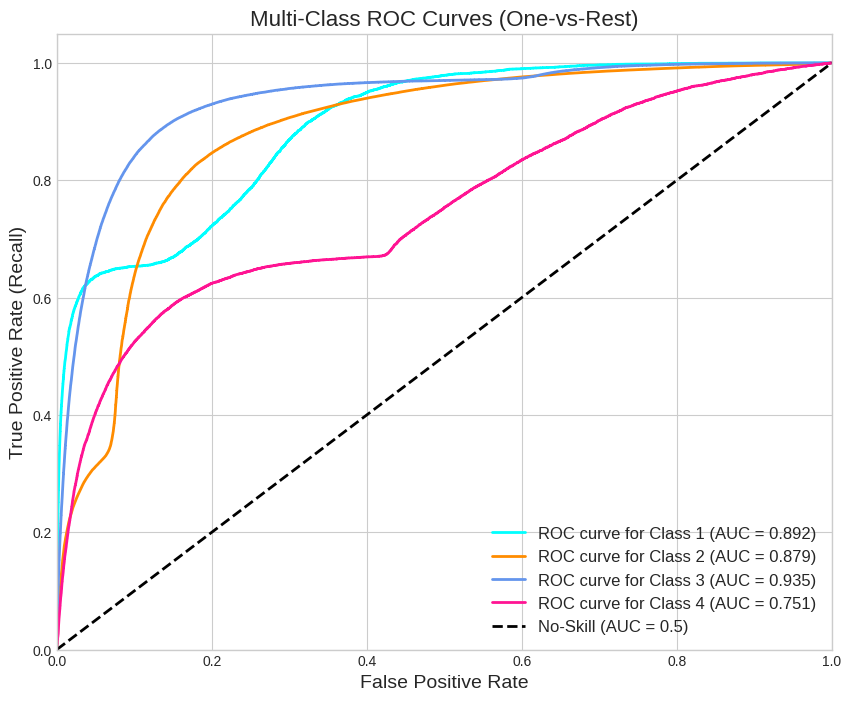

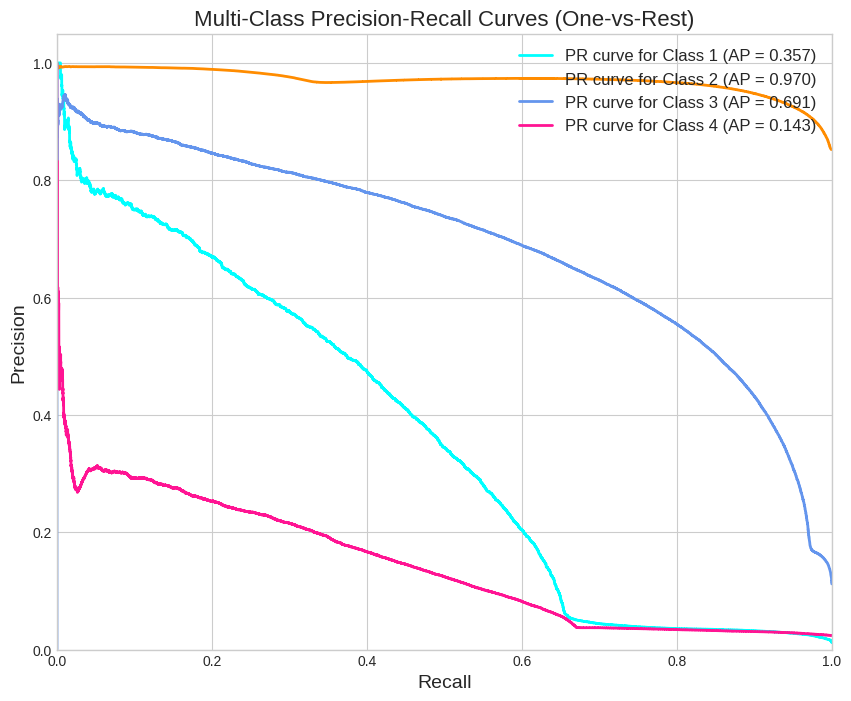

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

print("--- Generating ROC and Precision-Recall Curves ---")

# --- Step 1: Get Prediction Probabilities ---
# This gives us an array where each row is a sample and each column is the probability for a class
# The columns are ordered based on the classes the model learned (0, 1, 2, 3) which correspond to (1, 2, 3, 4)
y_test_proba = model.predict_proba(X_test_final)

# --- Step 2: Binarize the True Labels in a One-vs-Rest (OvR) fashion ---
# We need y_test to be in the format [[1,0,0,0], [0,1,0,0], ...]
y_test_binarized = label_binarize(y_test_final, classes=[1, 2, 3, 4])
n_classes = y_test_binarized.shape[1]

# Define class names for plotting
class_names = {0: "Class 1", 1: "Class 2", 2: "Class 3", 3: "Class 4"}

# --- Step 3: Calculate ROC Curve and ROC area for each class ---
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_test_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- Step 4: Plot all ROC curves ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 8))

colors = ['aqua', 'darkorange', 'cornflowerblue', 'deeppink']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve for {class_names[i]} (AUC = {roc_auc[i]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='No-Skill (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate (Recall)', fontsize=14)
plt.title('Multi-Class ROC Curves (One-vs-Rest)', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.show()


# --- Step 5: Calculate Precision-Recall Curve for each class ---
precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_test_proba[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], y_test_proba[:, i])

# --- Step 6: Plot all Precision-Recall curves ---
plt.figure(figsize=(10, 8))

for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label=f'PR curve for {class_names[i]} (AP = {average_precision[i]:.3f})')

plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Multi-Class Precision-Recall Curves (One-vs-Rest)', fontsize=16)
plt.legend(loc="upper right", fontsize=12)
plt.show()

In [26]:
try:
    results_dataframe = run_comprehensive_pipeline_ray(
        df_train_aligned=df_train_aligned,
        df_val_aligned=df_val_aligned,
        df_test_aligned=df_test_aligned, # Can be None if your pipeline handles it
        sample_sizes_param=[200000],
        balance_techniques_param=[
            "custom_ratio",
            "smote_enn",
            "targeted_sampling",
            "borderline_smote",
            "class_weight",
            "smote",
            "smote_tomek",
            "tomek",
            "undersampling",
            "adasyn"
        ],
        feature_set_sizes_param=["large",'medium','extra_large'],
        n_cv_folds_param=3
    )

    print("-" * 50)
    print("Pipeline execution finished.")

    if results_dataframe is not None and not results_dataframe.empty:
        print("\n--- Final Results DataFrame Head ---")
        print(results_dataframe.head())

        # The CSV file would have been created/updated in your current working directory
        # (e.g., results_200-400_3balancing_2features.csv)


        # Example: Show some specific columns for clarity
        if 'model_identifier' in results_dataframe.columns and \
           'f1_macro' in results_dataframe.columns and \
           'accuracy' in results_dataframe.columns:
            print("\n--- Key Metrics from Results ---")
            print(results_dataframe[['model_identifier', 'f1_macro', 'accuracy', 'cv_f1_macro', 'used_gpu']])

    else:
        print("Pipeline did not return any results or the DataFrame was empty.")

except Exception as e:
    print(f"An error occurred during the pipeline execution: {e}")
    import traceback
    traceback.print_exc()

finally:
    # Ensure Ray is shutdown if it was initialized,
    # though run_comprehensive_pipeline_ray should handle its own shutdown.
    if ray.is_initialized():
        ray.shutdown()

2025-06-19 08:29:33,523	INFO worker.py:1917 -- Started a local Ray instance.


Ray initialized. Cluster resources: {'accelerator_type:L4': 1.0, 'node:__internal_head__': 1.0, 'CPU': 12.0, 'memory': 39554385920.0, 'node:172.28.0.12': 1.0, 'object_store_memory': 16951879680.0, 'GPU': 1.0}
Ray cluster has 1 GPU(s) potentially available.
Results will be saved to/loaded from: /content/drive/MyDrive/my_accident_model_results/results_200000_10balancing_3features.csv
Creating stratified samples...
Creating stratified samples of different sizes...
Created sample of size 200000 with class distribution:
Severity
1    0.011890
2    0.852215
3    0.111965
4    0.023930
Name: proportion, dtype: float64

Pre-calculating feature sets for all sample/balance combinations...
  - Generating feature hierarchy for sample=200000, balance='custom_ratio'...
Original class distribution:
Severity
1      2378
2    170443
3     22393
4      4786
Name: count, dtype: int64
Class weights: {1: 21.026072329688816, 2: 0.2933532031236249, 3: 2.2328406198365562, 4: 10.447137484329295}
After custom r

KeyboardInterrupt: 

## re-training the best models for error analysis

In [27]:
from google.colab import drive
import pandas as pd
import ast # For safely evaluating string representations of dicts/lists

# Mount Google Drive
try:
    drive.mount('/content/drive', force_remount=True)
    print("Google Drive mounted successfully.")
except Exception as e:
    print(f"Error mounting Google Drive: {e}")
    # Handle the error appropriately, perhaps by exiting or prompting for manual file upload

# Define the path to your CSV file
csv_file_path = '/content/drive/MyDrive/my_accident_model_results/results_200000_10balancing_3features.csv'

# Load the CSV file into a pandas DataFrame
try:
    results_df = pd.read_csv(csv_file_path)
    print(f"Successfully loaded CSV from: {csv_file_path}")
    print(f"DataFrame shape: {results_df.shape}")
    print("DataFrame columns:", results_df.columns.tolist())
except FileNotFoundError:
    print(f"ERROR: The file was not found at {csv_file_path}")
    print("Please ensure the path is correct and the file exists.")
    results_df = None
except Exception as e:
    print(f"An error occurred while loading the CSV: {e}")
    results_df = None

Mounted at /content/drive
Google Drive mounted successfully.
Successfully loaded CSV from: /content/drive/MyDrive/my_accident_model_results/results_200000_10balancing_3features.csv
DataFrame shape: (90, 36)
DataFrame columns: ['model_identifier', 'sample_size', 'balance_technique', 'feature_set', 'model_type', 'train_time', 'n_features', 'selected_features_list', 'f1_weighted', 'f1_macro', 'f1_class1', 'f1_class2', 'f1_class3', 'f1_class4', 'accuracy', 'precision_macro', 'precision_weighted', 'precision_class1', 'precision_class2', 'precision_class3', 'precision_class4', 'recall_macro', 'recall_weighted', 'recall_class1', 'recall_class2', 'recall_class3', 'recall_class4', 'mcc', 'balanced_acc', 'kappa', 'confusion_matrix_str', 'cv_f1_macro', 'cv_std', 'model_params_str', 'used_gpu', 'class_weights_str']


In [46]:
# Filter the DataFrame for the specific model identifier
model_config_row = results_df[results_df['model_identifier'] == 'XGBoost_200000_smote_enn_large'].copy()

# Display the filtered row
print(model_config_row['confusion_matrix_str'].iloc[0]) # .iloc[0] to get the value from the single-row DataFrame


[[3707, 3273, 718, 43], [5158, 492960, 41552, 15122], [984, 12789, 57399, 1715], [109, 8972, 1852, 4647]]


In [47]:
print(len(df_val_aligned))  # Should print 650000

651000


In [ ]:
if results_df is not None:
    # These are the model_identifier strings for the models we chose
    target_model_identifiers = [
        'XGBoost_200000_custom_ratio_extra_large',
        # 'XGBoost_200000_smote_enn_extra_large',
        'XGBoost_200000_class_weight_extra_large',
        'RandomForest_200000_class_weight_medium'
    ]

    # Filter the DataFrame to get only the rows for our target models
    # Make sure the column name 'model_identifier' matches your CSV
    if 'model_identifier' in results_df.columns:
        selected_rows_df = results_df[results_df['model_identifier'].isin(target_model_identifiers)].copy() # Use .copy() to avoid SettingWithCopyWarning
        print(f"\nFound {len(selected_rows_df)} matching model configurations in the CSV.")
    else:
        print("ERROR: 'model_identifier' column not found in the CSV. Cannot proceed.")
        selected_rows_df = pd.DataFrame() # Empty df

    selected_model_configs = []

    if not selected_rows_df.empty:
        # Define the columns we need to extract and their corresponding key names in our config dict
        # Adjust these based on the exact column names in your CSV
        required_columns_map = {
            'model_identifier': 'model_identifier', # For verification
            'model_type': 'model_type',
            'balance_technique': 'balance_technique',
            'selected_features_list': 'selected_features_list_str', # Will contain comma-separated string
            'model_params_str': 'model_params_str',
            'class_weights_str': 'class_weights_str',
            'sample_size': 'sample_size' # Good to have for context, though it's 101010 for all
        }

        # Verify all required columns exist in the DataFrame
        missing_csv_cols = [csv_col for csv_col in required_columns_map.keys() if csv_col not in selected_rows_df.columns]
        if missing_csv_cols:
            print(f"ERROR: The following required columns are missing from your CSV: {missing_csv_cols}")
        else:
            for index, row in selected_rows_df.iterrows():
                config = {}
                for csv_col_name, dict_key_name in required_columns_map.items():
                    config[dict_key_name] = row[csv_col_name]

                # Special handling for 'model_params_str': Attempt to parse it if it's a string representation of a dict
                # This is important if your model instantiation expects a dictionary.
                # The function ast.literal_eval is safer than eval().
                # However, your train_single_model_ray function already expects a string and uses ast.literal_eval internally.
                # So, for now, we just pass the string as is. The get_predictions_for_analysis can handle it.

                # 'class_weights_str' might be NaN if not applicable. Handle this.
                if pd.isna(config.get('class_weights_str')):
                    config['class_weights_str'] = None # Or an empty dict string "{}" if preferred by downstream code

                selected_model_configs.append(config)

            print(f"\nSuccessfully created {len(selected_model_configs)} model configurations:")
            for i, cfg in enumerate(selected_model_configs):
                print(f"--- Config {i+1} for: {cfg['model_identifier']} ---")
                print(f"  Model Type: {cfg['model_type']}")
                print(f"  Balance Technique: {cfg['balance_technique']}")
                print(f"  Params: {cfg['model_params_str'][:100]}...") # Print first 100 chars
                print(f"  Selected Features (first few): {cfg['selected_features_list_str'][:100]}...")
                print(f"  Class Weights: {cfg['class_weights_str']}")
                print("-" * 20)

    else:
        print("No rows found for the selected model identifiers. Please check the identifiers and the CSV content.")

else:
    print("results_df was not loaded. Cannot create model configurations.")


Found 3 matching model configurations in the CSV.

Successfully created 3 model configurations:
--- Config 1 for: XGBoost_200000_custom_ratio_extra_large ---
  Model Type: XGBoost
  Balance Technique: custom_ratio
  Params: {'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 0....
  Selected Features (first few): gh6_severity_mean,Distance(mi),gh6_severity_std,Year,gh5_severity_mean,gh5_severity_std,gh6_accident...
  Class Weights: {"1": 21.026072329688816, "2": 0.2933532031236249, "3": 2.2328406198365562, "4": 10.447137484329295}
--------------------
--- Config 2 for: RandomForest_200000_class_weight_medium ---
  Model Type: RandomForest
  Balance Technique: class_weight
  Params: {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 4, 'random_state...
  Selected Features (first few): gh6_severity_mean,Distance(mi),gh6_severity_std,Year,gh5_severity_mean,gh5_severity_std,gh6_accident...
  Class Weights: {"1"

In [ ]:
import pandas as pd
import numpy as np
import json # For parsing params_str and class_weights_str
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
# Import your balancing functions and other necessary utilities from your scripts
# e.g., from your_balancing_script import apply_balancing_logic (pseudo-code)
# from imblearn.over_sampling import SMOTE, ADASYN # etc.
# from imblearn.under_sampling import RandomUnderSampler # etc.
# from imblearn.combine import SMOTETomek, SMOTEENN # etc.

# Assume df_train_aligned and df_val_aligned are loaded and preprocessed
samples_dict = create_stratified_samples(df_train_aligned, sample_sizes=[200000])
train_sample_for_200000 = samples_dict[200000].copy()
val_df_for_analysis = df_val_aligned.copy()

# Example for one model configuration (loop this for your 4 selected models)
# Config for Model 1 (e.g., XGBoost_101010_class_weight_large)
# model_config = {
#     'model_identifier': 'XGBoost_101010_class_weight_large',
#     'model_type': 'XGBoost',
#     'balance_technique': 'class_weight',
#     'selected_features_list_str': "gh6_severity_mean,Distance(mi),...", # Fill from CSV
#     'model_params_str': "{'n_estimators': 200, ...}", # Fill from CSV
#     'class_weights_str': "{'1': 21.026, ...}", # Fill from CSV if applicable
#     # Add any other necessary fields like 'sample_size' if your balancing logic needs it
# }

def get_predictions_for_analysis(config, train_df_sample, val_df_full_features):
    print(f"Processing for error analysis: {config['model_identifier']}")

    X_train_orig = train_df_sample.drop('Severity', axis=1)
    y_train_orig = train_df_sample['Severity']

    # 1. Apply Balancing (using logic similar to train_single_model_ray)
    # This part needs to replicate how balancing was done in train_single_model_ray
    # based on config['balance_technique'] and config['class_weights_str']
    # For brevity, this is simplified. You need your full balancing logic here.

    X_balanced_df = X_train_orig.copy() # Placeholder
    y_balanced_series = y_train_orig.copy() # Placeholder
    class_weights_dict_internal = None

    if config['balance_technique'] == 'class_weight' or (config['balance_technique'] == 'none' and config.get('class_weights_str')):
        if config.get('class_weights_str') and config['class_weights_str'] != 'None':
            class_weights_dict_internal = json.loads(config['class_weights_str'].replace("'", "\""))
            # Convert string keys to int if necessary (depends on your model's needs)
            class_weights_dict_internal = {int(k) if k.isdigit() else k: v for k,v in class_weights_dict_internal.items()}
        X_balanced_df = X_train_orig.copy()
        y_balanced_series = y_train_orig.copy()
    # else: # Add your other imblearn balancing logic here, similar to train_single_model_ray
        # Example:
        # if config['balance_technique'] == 'smote':
        #     smote = SMOTE(random_state=42, k_neighbors=...) # Adjust k_neighbors if needed or if logged
        #     X_bal_np, y_bal_np = smote.fit_resample(X_train_orig, y_train_orig)
        #     X_balanced_df = pd.DataFrame(X_bal_np, columns=X_train_orig.columns)
        #     y_balanced_series = pd.Series(y_bal_np, name='Severity')
        # ... other balancing methods

    # Ensure X_balanced_df and y_balanced_series are pandas objects with aligned indices
    if len(X_balanced_df) == len(y_balanced_series):
        X_balanced_df = X_balanced_df.reset_index(drop=True)
        y_balanced_series = y_balanced_series.reset_index(drop=True)
    else:
        raise ValueError("Length mismatch after balancing.")

    # 2. Select Features (using the exact list from CSV)
    current_feature_list = config['selected_features_list_str'].split(',')

    # Ensure all selected features are present
    missing_train_feats = [f for f in current_feature_list if f not in X_balanced_df.columns]
    if missing_train_feats:
        raise ValueError(f"Missing features in training sample: {missing_train_feats}")

    missing_val_feats = [f for f in current_feature_list if f not in val_df_full_features.columns]
    if missing_val_feats:
        raise ValueError(f"Missing features in validation data: {missing_val_feats}")

    X_train_features = X_balanced_df[current_feature_list]

    # Prepare validation data
    X_val_features = val_df_full_features[current_feature_list]
    y_val_true = val_df_full_features['Severity']

    # 3. Instantiate Model (using parameters from CSV)
    # Be careful with eval(model_params_str) - ensure the string is safe. json.loads is safer if params are JSON.
    # Your params_str looks like a dict string, so ast.literal_eval is better than eval.
    import ast
    try:
        model_params = ast.literal_eval(config['model_params_str'])
    except ValueError: # Handle if it's already a dict (e.g. if you modify config directly)
        model_params = config['model_params_str']


    model = None
    y_pred = None

    if config['model_type'] == 'RandomForest':
        if config['balance_technique'] == 'class_weight' and class_weights_dict_internal:
            model_params['class_weight'] = class_weights_dict_internal
        else: # Ensure class_weight is None if not class_weight balancing, or handle as per your original logic
            model_params.pop('class_weight', None)

        model = RandomForestClassifier(**model_params)
        model.fit(X_train_features, y_balanced_series)
        y_pred = model.predict(X_val_features)
        y_proba = model.predict_proba(X_val_features) # Get probabilities

    elif config['model_type'] == 'XGBoost':
        y_train_xgb = y_balanced_series - 1 # XGBoost often needs 0-indexed labels

        fit_params_xgb = {}
        if config['balance_technique'] == 'class_weight' and class_weights_dict_internal:
            # Map class weights to 0-indexed keys if needed
            xgb_weights_mapped = {k-1: v for k,v in class_weights_dict_internal.items() if isinstance(k, int)}
            sample_weight_train = np.array([xgb_weights_mapped.get(label, 1.0) for label in y_train_xgb])
            if len(sample_weight_train) == len(y_train_xgb):
                fit_params_xgb['sample_weight'] = sample_weight_train

        model = xgb.XGBClassifier(**model_params)
        model.fit(X_train_features, y_train_xgb, **fit_params_xgb)
        y_pred = model.predict(X_val_features) + 1 # Convert back to 1-indexed
        y_proba = model.predict_proba(X_val_features)

    elif config['model_type'] == 'NeuralNetwork':
        # ... (NN logic from train_single_model_ray: scaling, label mapping, model build, fit, predict)
        # This is more involved: ensure scaling is fit on X_train_features and transformed on X_val_features
        # Ensure label mapping for NN (to 0-indexed) and reverse mapping for y_pred
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_features).astype(np.float32)
        X_val_scaled = scaler.transform(X_val_features).astype(np.float32)

        unique_classes_train_orig = sorted(y_balanced_series.unique())
        class_mapping_to_0_idx = {label: i for i, label in enumerate(unique_classes_train_orig)}
        num_distinct_classes_in_train = len(unique_classes_train_orig)
        y_train_nn_mapped = y_balanced_series.map(class_mapping_to_0_idx)

        nn_class_weights_fit = None
        if config['balance_technique'] == 'class_weight' and class_weights_dict_internal:
            nn_class_weights_fit = {class_mapping_to_0_idx.get(orig_label): weight
                                  for orig_label, weight in class_weights_dict_internal.items()
                                  if orig_label in class_mapping_to_0_idx}

        # Simplified NN model build (use your exact architecture)
        def build_nn_model(input_shape_val, num_classes_val):
            nn_model = tf.keras.models.Sequential([
                tf.keras.layers.Input(shape=(input_shape_val,)),
                tf.keras.layers.Dense(128, activation='relu'), tf.keras.layers.BatchNormalization(), tf.keras.layers.Dropout(0.3),
                tf.keras.layers.Dense(64, activation='relu'), tf.keras.layers.BatchNormalization(), tf.keras.layers.Dropout(0.3),
                tf.keras.layers.Dense(32, activation='relu'),
                tf.keras.layers.Dense(num_classes_val, activation='softmax')])
            nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                           loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            return nn_model

        model = build_nn_model(X_train_scaled.shape[1], num_distinct_classes_in_train)
        # For error analysis, we don't strictly need val data for early stopping here, but can include for consistency
        # Or train for a fixed number of epochs known to be good from previous runs.
        model.fit(X_train_scaled, y_train_nn_mapped, epochs=20, batch_size=128, class_weight=nn_class_weights_fit, verbose=0) # Adjust epochs

        y_pred_proba_nn = model.predict(X_val_scaled)
        y_pred_mapped_nn = np.argmax(y_pred_proba_nn, axis=1)

        reverse_class_mapping_from_0_idx = {i: label for label, i in class_mapping_to_0_idx.items()}
        y_pred_series_orig_labels = pd.Series(y_pred_mapped_nn).map(reverse_class_mapping_from_0_idx)
        y_pred = y_pred_series_orig_labels.reindex(y_val_true.index).fillna(min(y_val_true.unique())) # Ensure alignment
        y_proba = y_pred_proba_nn
        tf.keras.backend.clear_session()


    return y_val_true, pd.Series(y_pred, index=y_val_true.index, name='Predicted_Severity'), y_proba

# --- Loop through your 4 selected model configurations ---
# Assuming 'selected_model_configs' is a list of dicts, each like 'model_config' above
# And train_sample_for_101010, val_df_for_analysis are prepared

all_predictions_for_analysis = {}
for config in selected_model_configs: # Your list of 4 model configs
    y_true, y_pred, y_proba = get_predictions_for_analysis(config, train_sample_for_200000, val_df_for_analysis)
    all_predictions_for_analysis[config['model_identifier']] = {
        'y_true': y_true,
        'y_pred': y_pred,
        'y_proba': y_proba, # Store probabilities as well
        'X_val_features': val_df_for_analysis[config['selected_features_list_str'].split(',')] # Store the features used for prediction
    }

Creating stratified samples of different sizes...
Created sample of size 200000 with class distribution:
Severity
1    0.011890
2    0.852215
3    0.111965
4    0.023930
Name: proportion, dtype: float64
Processing for error analysis: XGBoost_200000_custom_ratio_extra_large
Processing for error analysis: RandomForest_200000_class_weight_medium
Processing for error analysis: XGBoost_200000_class_weight_extra_large


In [ ]:
import pandas as pd
import numpy as np
import json # For parsing params_str and class_weights_str
import ast # For safely evaluating string representations of dicts/lists
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
# Assuming prepare_balanced_data is defined as you provided,
# which includes its own imblearn imports.

# Make sure imblearn is installed in your environment:
# pip install imbalanced-learn

# (Your prepare_balanced_data function would be here or imported)
# def prepare_balanced_data(df, target_col='Severity', method='hybrid'):
#     ... (as you provided) ...

def get_predictions_for_analysis(config, train_df_sample, val_df_full_features, prepare_balanced_data_func):
    print(f"\nProcessing for error analysis: {config['model_identifier']}")
    print(f"Balance technique from config: {config['balance_technique']}")

    X_train_orig = train_df_sample.drop('Severity', axis=1)
    y_train_orig = train_df_sample['Severity']

    # 1. Apply Balancing
    X_balanced_df = X_train_orig.copy()
    y_balanced_series = y_train_orig.copy()
    class_weights_dict_internal = None
    applied_resampling = False

    balance_method_from_config = str(config['balance_technique']).lower() # Ensure lowercase for matching

    # List of methods from your prepare_balanced_data that perform resampling
    # Add or remove methods based on your prepare_balanced_data function and CSV meanings
    resampling_methods_in_prepare_func = [
        'hybrid', 'smote', 'undersampling', 'smote_tomek', 'smote_enn',
        'adasyn', 'borderline_smote', 'targeted_sampling', 'tomek'
        # 'custom_ratio' is a special case:
        # If 'custom_ratio' in your CSV always meant the resampling from prepare_balanced_data, add 'custom_ratio' here.
        # If it sometimes meant using class_weights_str directly (like for XGBoost_200000_custom_ratio_extra_large),
        # the logic below will try to handle that.
    ]
    # Explicitly add 'custom_ratio' if its primary definition for your experiments was resampling
    if 'custom_ratio' == balance_method_from_config and not config.get('class_weights_str'): # If custom_ratio but no specific weights, assume resampling
         if 'custom_ratio' not in resampling_methods_in_prepare_func:
            resampling_methods_in_prepare_func.append('custom_ratio')


    if balance_method_from_config in resampling_methods_in_prepare_func:
        print(f"Applying '{balance_method_from_config}' resampling via prepare_balanced_data function...")
        try:
            # Create a temporary DataFrame with the target column for prepare_balanced_data
            temp_train_df_for_balancing = X_train_orig.copy()
            temp_train_df_for_balancing['Severity'] = y_train_orig

            X_resampled_np, y_resampled_np, _ = prepare_balanced_data_func(
                temp_train_df_for_balancing,
                target_col='Severity',
                method=balance_method_from_config
            )
            X_balanced_df = pd.DataFrame(X_resampled_np, columns=X_train_orig.columns)
            y_balanced_series = pd.Series(y_resampled_np, name='Severity')
            print(f"Data shape after '{balance_method_from_config}': X={X_balanced_df.shape}, y={y_balanced_series.shape}")
            applied_resampling = True
        except Exception as e:
            print(f"ERROR during {balance_method_from_config} resampling: {e}")
            print("Proceeding with original data for this model.")
            X_balanced_df = X_train_orig.copy()
            y_balanced_series = y_train_orig.copy()
            applied_resampling = False


    # Handle techniques that pass weights directly to the model (class_weight, or custom_ratio if it used class_weights_str)
    # This block is executed if no resampling was applied OR if the method is specifically 'class_weight'.
    if not applied_resampling and \
       (balance_method_from_config == 'class_weight' or \
        (balance_method_from_config == 'none' and config.get('class_weights_str')) or \
        (balance_method_from_config == 'custom_ratio' and config.get('class_weights_str'))): # Key: 'custom_ratio' with class_weights_str

        if config.get('class_weights_str') and \
           str(config['class_weights_str']).lower() != 'none' and \
           str(config['class_weights_str']).lower() != 'nan':
            try:
                weights_str_cleaned = str(config['class_weights_str']).replace("'", "\"").replace("nan", "null").replace("NaN", "null")
                parsed_weights = json.loads(weights_str_cleaned)
                class_weights_dict_internal = {
                    int(k) if isinstance(k, str) and k.isdigit() else k: float(v)
                    for k, v in parsed_weights.items()
                    if v is not None # Filter out "null" values
                }
                print(f"Using pre-calculated class weights for '{balance_method_from_config}': {class_weights_dict_internal}")
            except json.JSONDecodeError as e:
                print(f"Warning: Could not parse class_weights_str for {config['model_identifier']}: '{config['class_weights_str']}'. Error: {e}")
                class_weights_dict_internal = None
            except Exception as e: # Catch other potential errors like float conversion
                print(f"Warning: Error processing class_weights_str for {config['model_identifier']}: '{config['class_weights_str']}'. Error: {e}")
                class_weights_dict_internal = None
        else:
            print(f"Note: No valid class_weights_str found for '{balance_method_from_config}'. No explicit weights applied via this path.")
        # X_balanced_df and y_balanced_series remain original if not resampled. Weights are passed to model.fit().

    elif not applied_resampling and balance_method_from_config == 'none':
        print(f"No balancing or explicit class weights applied for '{config['model_identifier']}'. Using original data.")

    elif not applied_resampling:
        print(f"Warning: Balance method '{balance_method_from_config}' for {config['model_identifier']} was not found in resampling list and did not match class_weight/custom_weight logic. Using original data.")


    # Ensure X_balanced_df and y_balanced_series are pandas objects with aligned indices
    if not isinstance(X_balanced_df, pd.DataFrame):
        X_balanced_df = pd.DataFrame(X_balanced_df, columns=X_train_orig.columns)
    if not isinstance(y_balanced_series, pd.Series):
        y_balanced_series = pd.Series(y_balanced_series, name='Severity')

    if len(X_balanced_df) != len(y_balanced_series):
        raise ValueError(f"Length mismatch before reset_index: X_balanced_df has {len(X_balanced_df)} and y_balanced_series has {len(y_balanced_series)} for model {config['model_identifier']}")

    X_balanced_df = X_balanced_df.reset_index(drop=True)
    y_balanced_series = y_balanced_series.reset_index(drop=True)

    if len(X_balanced_df) == 0 and len(y_balanced_series) == 0 :
        print(f"Warning: X_balanced_df and y_balanced_series are empty after balancing for model {config['model_identifier']}. This can happen with extreme undersampling. Skipping model training for this config.")
        return y_val_full_features['Severity'], pd.Series(dtype='float64'), np.array([])


    # 2. Select Features
    current_feature_list = config['selected_features_list_str'].split(',')
    missing_train_feats = [f for f in current_feature_list if f not in X_balanced_df.columns]
    if missing_train_feats:
        raise ValueError(f"Missing features in training sample for {config['model_identifier']}: {missing_train_feats}. Available: {X_balanced_df.columns.tolist()}")
    missing_val_feats = [f for f in current_feature_list if f not in val_df_full_features.columns]
    if missing_val_feats:
        raise ValueError(f"Missing features in validation data for {config['model_identifier']}: {missing_val_feats}")

    X_train_features = X_balanced_df[current_feature_list]
    X_val_features = val_df_full_features[current_feature_list]
    y_val_true = val_df_full_features['Severity']

    # 3. Instantiate Model
    try:
        model_params = ast.literal_eval(str(config['model_params_str']))
    except ValueError:
        model_params = config['model_params_str'] # Should already be a dict if not a string
    except SyntaxError as e:
        print(f"SyntaxError parsing model_params_str for {config['model_identifier']}: {config['model_params_str']}. Error: {e}")
        raise

    model = None
    y_pred = None
    y_proba = np.array([]) # Default to empty array

    model_type_from_config = str(config['model_type'])

    if model_type_from_config == 'RandomForest':
        # For RandomForest, class_weight param expects a dict or 'balanced'
        # If class_weights_dict_internal is populated (from class_weight or custom_ratio with weights), use it.
        if class_weights_dict_internal:
            model_params['class_weight'] = class_weights_dict_internal
        elif model_params.get('class_weight') == 'balanced_subsample': # if it was already set
            pass # keep it
        else: # Ensure class_weight is None if not explicitly set and not 'balanced_subsample'
            model_params.pop('class_weight', None)

        model = RandomForestClassifier(**model_params)
        model.fit(X_train_features, y_balanced_series)
        y_pred = model.predict(X_val_features)
        y_proba = model.predict_proba(X_val_features)

    elif model_type_from_config == 'XGBoost':
        y_train_xgb = y_balanced_series.astype(int) - 1 # XGBoost needs 0-indexed labels

        fit_params_xgb = {}
        # For XGBoost, sample_weight is used if class_weights_dict_internal is available
        if class_weights_dict_internal and not applied_resampling: # Only apply sample_weight if data wasn't resampled
            xgb_weights_mapped = {k-1: v for k,v in class_weights_dict_internal.items() if isinstance(k, int) and isinstance(v, (int, float))}
            sample_weight_train = np.array([xgb_weights_mapped.get(label, 1.0) for label in y_train_xgb])
            if len(sample_weight_train) == len(y_train_xgb):
                fit_params_xgb['sample_weight'] = sample_weight_train
            else:
                print(f"Warning: sample_weight_train length mismatch for {config['model_identifier']}")

        model = xgb.XGBClassifier(**model_params)
        model.fit(X_train_features, y_train_xgb, **fit_params_xgb)
        y_pred = model.predict(X_val_features) + 1 # Convert back to 1-indexed
        y_proba = model.predict_proba(X_val_features)

    elif model_type_from_config == 'NeuralNetwork':
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_features).astype(np.float32)
        X_val_scaled = scaler.transform(X_val_features).astype(np.float32)

        unique_classes_train_orig = sorted(y_balanced_series.unique())
        class_mapping_to_0_idx = {label: i for i, label in enumerate(unique_classes_train_orig)}
        num_distinct_classes_in_train = len(unique_classes_train_orig)
        y_train_nn_mapped = y_balanced_series.map(class_mapping_to_0_idx)

        nn_class_weights_fit = None
        if class_weights_dict_internal and not applied_resampling: # Only apply if data wasn't resampled
            nn_class_weights_fit = {
                class_mapping_to_0_idx.get(orig_label): weight
                for orig_label, weight in class_weights_dict_internal.items()
                if orig_label in class_mapping_to_0_idx and isinstance(weight, (int, float))
            }
            print(f"NN class weights (0-indexed): {nn_class_weights_fit}")

        # Simplified NN model build (use your exact architecture from training)
        def build_nn_model(input_shape_val, num_classes_val):
            # Ensure you are using the same architecture as original training
            nn_model = tf.keras.models.Sequential([
                tf.keras.layers.Input(shape=(input_shape_val,)),
                tf.keras.layers.Dense(128, activation='relu'), tf.keras.layers.BatchNormalization(), tf.keras.layers.Dropout(0.3),
                tf.keras.layers.Dense(64, activation='relu'), tf.keras.layers.BatchNormalization(), tf.keras.layers.Dropout(0.3),
                tf.keras.layers.Dense(32, activation='relu'),
                tf.keras.layers.Dense(num_classes_val, activation='softmax')])
            nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Use params from config if available
                           loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            return nn_model

        model = build_nn_model(X_train_scaled.shape[1], num_distinct_classes_in_train)
        # Use epochs, batch_size etc. from your original model_params if available and applicable
        epochs = model_params.get('epochs', 20) # Example default
        batch_size = model_params.get('batch_size', 128) # Example default

        model.fit(X_train_scaled, y_train_nn_mapped, epochs=epochs, batch_size=batch_size, class_weight=nn_class_weights_fit, verbose=0)

        y_pred_proba_nn = model.predict(X_val_scaled)
        y_pred_mapped_nn = np.argmax(y_pred_proba_nn, axis=1)

        reverse_class_mapping_from_0_idx = {i: label for label, i in class_mapping_to_0_idx.items()}
        y_pred_series_orig_labels = pd.Series(y_pred_mapped_nn).map(reverse_class_mapping_from_0_idx)

        # Align y_pred with y_val_true's index and fill any potential NaNs
        # (NaNs could occur if a predicted 0-indexed class isn't in reverse_class_mapping, though unlikely with argmax)
        y_pred = y_pred_series_orig_labels.reindex(y_val_true.index)
        # Fill NaN with a less harmful prediction, e.g., most frequent class or least severe
        # For safety, ensure all predicted labels are present in y_val_true.unique() or handle appropriately
        # A simple fillna could be with the most frequent class in y_balanced_series or y_val_true
        if y_pred.isnull().any():
            most_frequent_val = y_val_true.mode()[0] if not y_val_true.empty else min(y_balanced_series.unique(), default=1)
            print(f"NN y_pred had NaNs, filling with {most_frequent_val}")
            y_pred = y_pred.fillna(most_frequent_val)

        y_proba = y_pred_proba_nn
        tf.keras.backend.clear_session() # Good practice for TF

    else:
        print(f"ERROR: Model type '{model_type_from_config}' not recognized for {config['model_identifier']}.")
        # Return original y_true, and empty predictions so analysis step can report failure for this model
        return y_val_true, pd.Series(dtype='float64'), np.array([])


    return y_val_true, pd.Series(y_pred, index=y_val_true.index, name='Predicted_Severity').astype(int), y_proba

# --- Example of how you might call it ---
# Make sure 'selected_model_configs' is populated correctly from your CSV
# Make sure 'train_sample_for_200000' and 'val_df_for_analysis' are loaded

# Example:
all_predictions_for_analysis = {}
for config_row in selected_model_configs: # This should be your list of dicts
    # Pass your actual prepare_balanced_data function
    y_true, y_pred, y_proba = get_predictions_for_analysis(
        config_row,
        train_sample_for_200000, # This is your df_train_sample
        val_df_for_analysis,     # This is your df_val_full_features
        prepare_balanced_data    # Pass the function itself
    )
    all_predictions_for_analysis[config_row['model_identifier']] = {
        'y_true': y_true,
        'y_pred': y_pred,
        'y_proba': y_proba,
        'X_val_features': val_df_for_analysis[config_row['selected_features_list_str'].split(',')]
    }


Processing for error analysis: XGBoost_200000_custom_ratio_extra_large
Balance technique from config: custom_ratio
Using pre-calculated class weights for 'custom_ratio': {1: 21.026072329688816, 2: 0.2933532031236249, 3: 2.2328406198365562, 4: 10.447137484329295}

Processing for error analysis: RandomForest_200000_class_weight_medium
Balance technique from config: class_weight
Using pre-calculated class weights for 'class_weight': {1: 21.026072329688816, 2: 0.2933532031236249, 3: 2.2328406198365562, 4: 10.447137484329295}

Processing for error analysis: XGBoost_200000_class_weight_extra_large
Balance technique from config: class_weight
Using pre-calculated class weights for 'class_weight': {1: 21.026072329688816, 2: 0.2933532031236249, 3: 2.2328406198365562, 4: 10.447137484329295}


In [ ]:
all_predictions_for_analysis['XGBoost_200000_custom_ratio_extra_large']['X_val_features'].to_string()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming all_predictions_for_analysis is populated correctly

for model_id, data in all_predictions_for_analysis.items():
    print(f"\n\n=================================================")
    print(f"Error Analysis for Model: {model_id}")
    print(f"=================================================")

    y_true = data['y_true']
    y_pred = data['y_pred']
    y_proba = data['y_proba']           # Shape: (n_samples, n_classes_for_that_model)
    X_val_subset = data['X_val_features'] # Features used by this model for validation

    # Combine into a single DataFrame for easier filtering and analysis for this model
    # Make sure indices align. If y_true and y_pred are Series and X_val_subset is DataFrame,
    # they should align if derived from the same original validation set.
    current_analysis_df = X_val_subset.copy()
    current_analysis_df['True_Severity'] = y_true
    current_analysis_df['Predicted_Severity'] = y_pred

    # Assuming your classes are 1, 2, 3, 4.
    # If NN output probabilities for 0-indexed classes, ensure y_proba columns align with 1,2,3,4.
    # For XGBoost/RF, predict_proba usually returns columns in order of model.classes_
    # Let's assume for now the columns of y_proba correspond to classes 1, 2, 3, 4 (or map them)
    # If model.classes_ was [1,2,3,4], then y_proba[:, 0] is P(Class=1), y_proba[:, 3] is P(Class=4)
    # You might need to get model.classes_ from your saved model or infer carefully.
    # For simplicity, let's assume you can map it:
    # Example: If your y_proba columns directly correspond to classes 1, 2, 3, 4:
    if y_proba.shape[1] == 4: # Check if there are 4 probability columns
        current_analysis_df['Prob_Class1'] = y_proba[:, 0]
        current_analysis_df['Prob_Class2'] = y_proba[:, 1]
        current_analysis_df['Prob_Class3'] = y_proba[:, 2]
        current_analysis_df['Prob_Class4'] = y_proba[:, 3]
    elif y_proba.shape[1] > 0 : # Handle cases where number of classes might be different (e.g. if NN was trained on subset of classes)
        print(f"Warning: y_proba for {model_id} has {y_proba.shape[1]} columns. Probability analysis might need adjustment.")
        # You might need to map these probabilities based on `model.classes_` if it's not straightforward
        # For now, let's add them with generic names if shape is not 4
        for i in range(y_proba.shape[1]):
            current_analysis_df[f'Prob_Output_{i}'] = y_proba[:, i]


    # 1. Isolate Class 4 Instances for THIS MODEL
    actual_class_4_df = current_analysis_df[current_analysis_df['True_Severity'] == 4]

    # 2. Identify TP, FN, FP for Class 4 for THIS MODEL
    tp_class_4_df = actual_class_4_df[actual_class_4_df['Predicted_Severity'] == 4]
    fn_class_4_df = actual_class_4_df[actual_class_4_df['Predicted_Severity'] != 4] # Missed Class 4
    fp_class_4_df = current_analysis_df[(current_analysis_df['True_Severity'] != 4) & (current_analysis_df['Predicted_Severity'] == 4)] # Wrongly predicted as Class 4

    print(f"\n--- Class 4 Performance for {model_id} ---")
    print(f"Total Actual Class 4: {len(actual_class_4_df)}")
    print(f"  True Positives (Correctly ID'd as Class 4): {len(tp_class_4_df)}")
    print(f"  False Negatives (Missed Class 4): {len(fn_class_4_df)}")
    if not fn_class_4_df.empty:
        print(f"    Missed Class 4 predicted as: \n{fn_class_4_df['Predicted_Severity'].value_counts(normalize=True).sort_index()}")
    print(f"  False Positives (Wrongly ID'd as Class 4): {len(fp_class_4_df)}")
    if not fp_class_4_df.empty:
        print(f"    Wrongly ID'd as Class 4 (True Labels were): \n{fp_class_4_df['True_Severity'].value_counts(normalize=True).sort_index()}")

    # 3. Feature Distribution Comparison (Focus: FN_Class_4 vs TP_Class_4)
    print(f"\n--- Feature Comparison: TP Class 4 vs. FN Class 4 for {model_id} ---")
    if not tp_class_4_df.empty and not fn_class_4_df.empty:
        # Select a few key features to compare (or loop through all)
        # features_to_compare = ['Distance(mi)', 'HourSinceMidnight', 'IntersectionComplexity', 'State_Freq'] # Example features
        # Use the actual features present in X_val_subset
        features_to_compare = X_val_subset.columns.tolist() # Or a subset of them

        print("\nDescriptive Statistics for TRUE POSITIVES (Class 4):")
        print(tp_class_4_df[features_to_compare].describe().T)

        print("\nDescriptive Statistics for FALSE NEGATIVES (Missed Class 4):")
        print(fn_class_4_df[features_to_compare].describe().T)

        # Visualization for a sample feature
        for feature in features_to_compare[:min(5, len(features_to_compare))]: # Plot for first 5 features
            plt.figure(figsize=(10, 5))
            if pd.api.types.is_numeric_dtype(tp_class_4_df[feature]):
                sns.histplot(tp_class_4_df[feature], color='green', label='TP Class 4', kde=True, stat="density", element="step")
                sns.histplot(fn_class_4_df[feature], color='red', label='FN Class 4 (Missed)', kde=True, stat="density", element="step")
            else: # Categorical
                # Create a temporary df for plotting categorical
                temp_plot_df = pd.concat([
                    tp_class_4_df[[feature]].assign(Group='TP Class 4'),
                    fn_class_4_df[[feature]].assign(Group='FN Class 4 (Missed)')
                ])
                sns.countplot(data=temp_plot_df, x=feature, hue='Group', dodge=True)
                plt.xticks(rotation=45, ha='right')

            plt.title(f'{model_id}: {feature} Distribution - TP vs. FN for Class 4')
            plt.legend()
            plt.tight_layout()
            plt.show()
    else:
        print("Not enough TP or FN for Class 4 to compare distributions.")

    # 4. Analysis of Probabilities (if available and mapped)
    if 'Prob_Class4' in current_analysis_df.columns: # Check if Prob_Class4 column exists
        print(f"\n--- Probability Analysis for Class 4 for {model_id} ---")
        if not fn_class_4_df.empty:
            print("\nProbabilities for MISSED Class 4 (FN_Class_4):")
            print(fn_class_4_df[['True_Severity', 'Predicted_Severity', 'Prob_Class1', 'Prob_Class2', 'Prob_Class3', 'Prob_Class4']].head())
            # What was the probability assigned to the true class 4?
            print(f"Avg. Prob assigned to Class 4 when it was missed: {fn_class_4_df['Prob_Class4'].mean():.4f}")
            # What was the probability assigned to the wrongly predicted class?
            # This requires looking at the probability of y_pred for each row.

        if not tp_class_4_df.empty:
            print("\nProbabilities for CORRECTLY Predicted Class 4 (TP_Class_4):")
            print(tp_class_4_df[['True_Severity', 'Predicted_Severity', 'Prob_Class1', 'Prob_Class2', 'Prob_Class3', 'Prob_Class4']].head())
            print(f"Avg. Prob assigned to Class 4 when it was correct: {tp_class_4_df['Prob_Class4'].mean():.4f}")

        if not fp_class_4_df.empty:
            print("\nProbabilities for WRONGLY Predicted as Class 4 (FP_Class_4):")
            print(fp_class_4_df[['True_Severity', 'Predicted_Severity', 'Prob_Class1', 'Prob_Class2', 'Prob_Class3', 'Prob_Class4']].head())
            print(f"Avg. Prob assigned to Class 4 when it was a False Positive: {fp_class_4_df['Prob_Class4'].mean():.4f}")

    # You can also analyze False Positives in more detail (comparing their features to True Negatives of Class 4)
    # current_analysis_df['Is_Actually_Class4_And_Predicted_Not_Class4'] = (current_analysis_df['True_Severity'] == 4) & (current_analysis_df['Predicted_Severity'] != 4)
    # current_analysis_df['Is_Not_Class4_But_Predicted_Class4'] = (current_analysis_df['True_Severity'] != 4) & (current_analysis_df['Predicted_Severity'] == 4)
    # ... and so on.

## error analysis

In [ ]:
import pandas as pd
import numpy as np
# Ensure sklearn is imported if you use its specific dtypes or functions, though not directly in this function.
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.feature_selection import chi2
# from scipy.stats import pearsonr

def identify_feature_types(df, target_column='Severity'):
    """
    Attempts to identify numerical, categorical, and historical features
    from a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame containing all features and the target.
        target_column (str): The name of the target variable column.

    Returns:
        tuple: A tuple containing three lists:
               (identified_numerical_current,
                identified_categorical_current,
                identified_historical)
    """

    # --- MODIFIED SECTION TO PREVENT THE ERROR ---
    cols_to_exclude_from_typing = []
    if target_column in df.columns:
        cols_to_exclude_from_typing.append(target_column)

    # 'Is_Class4' is a derived target. If it happens to exist in the input df,
    # we should also exclude it from being typed as a 'feature'.
    # In your script, identify_feature_types is called *before* 'Is_Class4' is created,
    # so this check will correctly not add 'Is_Class4' to cols_to_exclude_from_typing.
    # If the script order changed, this would handle it.
    if 'Is_Class4' in df.columns and 'Is_Class4' not in cols_to_exclude_from_typing:
        cols_to_exclude_from_typing.append('Is_Class4')

    # Get the list of features to be categorized by dropping the exclusion list
    if cols_to_exclude_from_typing: # Only try to drop if the list is not empty
        features = df.drop(columns=cols_to_exclude_from_typing).columns.tolist()
    else:
        # If for some reason (e.g. target_column not found) nothing is to be dropped,
        # consider all columns as features.
        features = df.columns.tolist()
    # --- END OF MODIFIED SECTION ---

    identified_historical = []
    remaining_features = []

    historical_prefixes = ['gh1_', 'gh2_', 'gh3_', 'gh4_', 'gh5_', 'gh6_', 'gh7_', 'gh8_', 'gh9_', 'gh10_',
                           'grid_', 'lat_bin_', 'lng_bin_']
    historical_suffixes = ['_mean', '_std', '_min', '_max', '_range', '_count', '_sum', '_median', '_iqr',
                           '_density_ratio', '_freq', '_lag', '_diff', '_trend']
    historical_exact_keywords = ['bin_center']


    for col in features:
        is_historical = False
        for prefix in historical_prefixes:
            if col.startswith(prefix):
                is_historical = True
                break
        if not is_historical:
            for suffix in historical_suffixes:
                if col.endswith(suffix):
                    is_historical = True
                    break
        if not is_historical:
            for keyword in historical_exact_keywords:
                if keyword in col:
                    is_historical = True
                    break

        if is_historical:
            identified_historical.append(col)
        else:
            remaining_features.append(col)

    identified_numerical_current = []
    identified_categorical_current = []

    cardinality_threshold_for_categorical = 25

    for col in remaining_features:
        # Ensure the column actually exists in the DataFrame to avoid KeyErrors during dtype checks
        if col not in df:
            print(f"Warning: Column '{col}' from 'remaining_features' not found in DataFrame. Skipping.")
            continue

        if df[col].dtype in [np.int64, np.int32, np.float64, np.float32, 'int', 'float', 'int8', 'int16', 'float16']:
            unique_values = df[col].nunique(dropna=True)
            if unique_values == 2:
                identified_categorical_current.append(col)
            elif unique_values < cardinality_threshold_for_categorical and unique_values > 2 :
                if pd.api.types.is_integer_dtype(df[col]):
                    identified_categorical_current.append(col)
                else:
                    identified_numerical_current.append(col)
            else:
                identified_numerical_current.append(col)
        elif pd.api.types.is_categorical_dtype(df[col]) or df[col].dtype == 'object' or df[col].dtype == 'bool':
            identified_categorical_current.append(col)
        else:
            print(f"Warning: Column '{col}' with dtype {df[col].dtype} was not categorized. Treating as numerical.")
            identified_numerical_current.append(col)

    identified_numerical_current = [f for f in identified_numerical_current if f not in identified_historical]
    identified_categorical_current = [f for f in identified_categorical_current if f not in identified_historical]

    return identified_numerical_current, identified_categorical_current, identified_historical

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import chi2
from scipy.stats import pearsonr
import numpy as np

# PASTE THE CORRECTED identify_feature_types FUNCTION DEFINITION HERE (from above)

# --- 1. Data Preparation ---
# df_analysis_data = df_train_aligned # This is your actual training data

# For demonstration, let's use a dummy df_train_aligned
# Replace this with your actual df_train_aligned
# dummy_data_for_train_aligned = {
#     'Severity': np.random.choice([1,2,3,4], 100),
#     'Temperature(F)': np.random.rand(100)*30 + 50,
#     'gh6_severity_mean': np.random.rand(100)*2 + 1,
#     'Traffic_Signal': np.random.choice([0,1],100)
#     # Add other columns your identify_feature_types might expect based on your full script
# }
# df_train_aligned = pd.DataFrame(dummy_data_for_train_aligned)
df_analysis_data = df_train_aligned

desired_sample_size_for_analysis = 1000000 # Example

# Generate samples using your function (or just generate one specific size)
# If you only need one, you could modify your function or call it to produce just that one.
# For now, assuming it produces the dictionary:
all_samples_dict = create_stratified_samples(df_train_aligned, sample_sizes=[desired_sample_size_for_analysis])

# Get the specific sample DataFrame
df_analysis_data = all_samples_dict[desired_sample_size_for_analysis]
print(f"\nUsing stratified sample of size {len(df_analysis_data)} for feature analysis.")


# ---------------------------------------------------------------

# These lists should now be populated by the identify_feature_types function
current_numerical_features = []
current_categorical_features = []
historical_features = [] # This one is also from identify_feature_types

if not df_analysis_data.empty and 'Severity' in df_analysis_data.columns: # Ensure Severity exists
    num_current, cat_current, hist_features = identify_feature_types(df_analysis_data, target_column='Severity')

    # Assign the returned lists to your script's variables
    current_numerical_features = num_current
    current_categorical_features = cat_current
    historical_features = hist_features # You might want to use this one too

    print("\n--- Features Identified by identify_feature_types ---")
    print("Numerical Current:", current_numerical_features)
    print("Categorical Current:", current_categorical_features)
    print("Historical:", historical_features)


    # Create a binary target: Is_Class4
    df_analysis_data['Is_Class4'] = (df_analysis_data['Severity'] == 4).astype(int)

    # Ensure feature lists only contain features present in the dataframe
    # This filtering might be redundant now if identify_feature_types is robust, but good for safety
    current_numerical_features = [f for f in current_numerical_features if f in df_analysis_data.columns]
    current_categorical_features = [f for f in current_categorical_features if f in df_analysis_data.columns]

    # Handle missing values (simple mean/mode imputation for this example)
    for col in current_numerical_features:
        if col in df_analysis_data.columns and df_analysis_data[col].isnull().any():
            df_analysis_data[col].fillna(df_analysis_data[col].mean(), inplace=True)
    for col in current_categorical_features:
        if col in df_analysis_data.columns and df_analysis_data[col].isnull().any():
            df_analysis_data[col].fillna(df_analysis_data[col].mode()[0], inplace=True)

    # --- 2. Method 1: Feature Importance from a Model (RandomForest) ---
    print("\n--- Method 1: Feature Importance from RandomForest ---")

    df_rf_analysis = df_analysis_data.copy()
    label_encoders = {}
    # Ensure current_categorical_features only contains columns that actually exist and are suitable
    valid_cat_for_rf = [col for col in current_categorical_features if col in df_rf_analysis.columns]

    for col in valid_cat_for_rf: # Use the validated list
        # Check if already numeric (e.g. binary 0/1 flags)
        if pd.api.types.is_numeric_dtype(df_rf_analysis[col]) and df_rf_analysis[col].nunique() < 20 : # It's already numeric-like
            pass # No need to LabelEncode if it's like 0/1
        elif df_rf_analysis[col].dtype == 'object' or df_rf_analysis[col].nunique() < 20 : # Heuristic for categorical
            le = LabelEncoder()
            df_rf_analysis[col] = le.fit_transform(df_rf_analysis[col])
            label_encoders[col] = le
        # else: might be high cardinality object, consider other encoding or skip

    # Ensure current_numerical_features are valid
    valid_num_for_rf = [col for col in current_numerical_features if col in df_rf_analysis.columns]

    # Combine current numerical and (label-encoded) categorical features
    features_for_rf = valid_num_for_rf + valid_cat_for_rf
    # Remove duplicates if any feature was in both lists (should not happen with proper typing)
    features_for_rf = sorted(list(set(features_for_rf)))

    if not features_for_rf:
        print("No valid features selected for RandomForest analysis.")
    else:
        X_current_conditions = df_rf_analysis[features_for_rf]
        y_binary = df_rf_analysis['Is_Class4']

        if not X_current_conditions.empty:
            scaler = StandardScaler()
            X_current_conditions_scaled = X_current_conditions.copy()
            if valid_num_for_rf: # Only scale if there are numerical features
                 X_current_conditions_scaled[valid_num_for_rf] = scaler.fit_transform(X_current_conditions[valid_num_for_rf])

            rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
            rf_model.fit(X_current_conditions_scaled, y_binary)

            importances = rf_model.feature_importances_
            feature_names_rf = X_current_conditions.columns # Use columns from X_current_conditions
            importance_df = pd.DataFrame({'Feature': feature_names_rf, 'Importance': importances})
            importance_df = importance_df.sort_values(by='Importance', ascending=False)

            print("Top current condition features influencing Class 4 (from RandomForest):")
            print(importance_df.head(20))
        else:
            print("X_current_conditions DataFrame is empty for RandomForest analysis.")


    # --- 3. Method 2: Correlation for Numerical Current Features ---
    print("\n--- Method 2: Correlation of Numerical Features with Is_Class4 ---")
    correlations = {}
    valid_num_for_corr = [col for col in current_numerical_features if col in df_analysis_data.columns]

    for col in valid_num_for_corr:
        temp_df = df_analysis_data[[col, 'Is_Class4']].dropna()
        if len(temp_df) > 1 and pd.api.types.is_numeric_dtype(temp_df[col]): # Ensure column is numeric
            try:
                corr, p_value = pearsonr(temp_df[col], temp_df['Is_Class4'])
                correlations[col] = {'Correlation': corr, 'P_Value': p_value}
            except Exception as e:
                print(f"Could not calculate Pearson correlation for {col}: {e}")
                correlations[col] = {'Correlation': np.nan, 'P_Value': np.nan}
        else:
            correlations[col] = {'Correlation': np.nan, 'P_Value': np.nan}

    if correlations:
        correlation_df = pd.DataFrame.from_dict(correlations, orient='index')
        correlation_df['Abs_Correlation'] = correlation_df['Correlation'].abs()
        correlation_df = correlation_df.sort_values(by='Abs_Correlation', ascending=False)
        print("Correlation of numerical current features with Is_Class4:")
        print(correlation_df.head(20))
    else:
        print("No numerical features for correlation analysis or correlations could not be computed.")

    # --- 4. Method 3: Chi-squared Test for Categorical Current Features ---
    print("\n--- Method 3: Chi-squared Test for Categorical Features with Is_Class4 ---")
    chi2_results = {}
    df_chi2_analysis = df_analysis_data.copy()
    valid_cat_for_chi2 = [col for col in current_categorical_features if col in df_chi2_analysis.columns]

    for col in valid_cat_for_chi2:
        # Use label encoded version if already done for RF
        if col in label_encoders:
             # Ensure it was actually transformed and is numeric for chi2
            if not pd.api.types.is_numeric_dtype(df_chi2_analysis[col]):
                df_chi2_analysis[col] = label_encoders[col].transform(df_chi2_analysis[col])
        # If not label encoded (e.g. it was already 0/1), ensure it's non-negative
        elif df_chi2_analysis[col].min() < 0:
            print(f"Skipping Chi2 for {col} as it contains negative values and wasn't label encoded above.")
            continue
        # Ensure the column is suitable (numeric after potential encoding)
        if not pd.api.types.is_numeric_dtype(df_chi2_analysis[col]):
            print(f"Skipping Chi2 for {col} as it's not numeric after processing.")
            continue


        contingency_table_data = df_chi2_analysis[[col, 'Is_Class4']].dropna()
        if contingency_table_data.empty or contingency_table_data[col].nunique() < 2 : # Need at least 2 categories
            chi2_results[col] = {'Chi2_Statistic': np.nan, 'P_Value': np.nan}
            continue

        try:
            # sklearn's chi2 expects X to be non-negative.
            # We pass the feature column as a DataFrame.
            chi2_stat_sklearn, p_value_sklearn = chi2(contingency_table_data[[col]], contingency_table_data['Is_Class4'])
            chi2_results[col] = {'Chi2_Statistic': chi2_stat_sklearn[0], 'P_Value': p_value_sklearn[0]}
        except ValueError as e:
            print(f"Could not compute Chi2 for {col}: {e}")
            chi2_results[col] = {'Chi2_Statistic': np.nan, 'P_Value': np.nan}

    if chi2_results:
        chi2_df = pd.DataFrame.from_dict(chi2_results, orient='index')
        chi2_df = chi2_df.sort_values(by='P_Value', ascending=True)
        print("Chi-squared test for categorical current features vs. Is_Class4 (lower p-value suggests stronger association):")
        print(chi2_df.head(20))
    else:
        print("No categorical features suitable for Chi2 analysis or results could not be computed.")

else:
    print("df_analysis_data is empty or 'Severity' column is missing. Aborting analysis.")


# --- 5. Guidance on PCA ---
# ... (rest of the script) ...

## creating new fetures that might improve the models when it comes to class 4 precision

In [ ]:
import pandas as pd
import numpy as np

# Assume df_analysis_data is your loaded DataFrame (e.g., the 500k sample)
# containing all original and engineered features, including historical ghX_ stats.

# --- Define Thresholds for "Historically Mild" Geohashes (based on FN Class 4 analysis from 50k) ---
# These are examples; refine them based on a close look at your FN stats
# for the specific geohash level you want to use (e.g., gh6, gh5)
HIST_LOW_SEV_MEAN_GH6_THRESHOLD = 2.4  # e.g., below the 75th percentile for FNs
HIST_LOW_SEV_STD_GH6_THRESHOLD = 0.6   # e.g., below the 75th percentile for FNs
HIST_LOW_MAX_SEV_GH6_THRESHOLD = 4     # To capture cells where max wasn't definitively 4
HIST_MODERATE_COUNT_GH6_THRESHOLD = 70 # e.g., below or around the mean/75th percentile for FNs

# --- Top "Current Condition" Feature Candidates (from your latest analysis) ---
# (You'll select from these based on your judgment of strength and diversity)

# Example Interaction Feature Creation:

# 1. Interaction with Distance
# Hypothesis: Long distance accidents in historically mild areas are higher risk.
if 'DistanceCategory_Long' in df_analysis_data.columns and 'gh6_severity_mean' in df_analysis_data.columns:
    df_analysis_data['Interact_DistLong_HistLowSevMean_gh6'] = \
        (df_analysis_data['DistanceCategory_Long'] == 1) & \
        (df_analysis_data['gh6_severity_mean'] < HIST_LOW_SEV_MEAN_GH6_THRESHOLD)
    df_analysis_data['Interact_DistLong_HistLowSevMean_gh6'] = df_analysis_data['Interact_DistLong_HistLowSevMean_gh6'].astype(int)
    print("Created: Interact_DistLong_HistLowSevMean_gh6")

# 2. Interaction with Time/Light Conditions
# Hypothesis: Night accidents in historically low-variance (less predictable) severity areas are higher risk.
if 'PartOfDay_Night' in df_analysis_data.columns and 'gh6_severity_std' in df_analysis_data.columns:
    df_analysis_data['Interact_Night_HistLowStd_gh6'] = \
        (df_analysis_data['PartOfDay_Night'] == 1) & \
        (df_analysis_data['gh6_severity_std'] < HIST_LOW_SEV_STD_GH6_THRESHOLD)
    df_analysis_data['Interact_Night_HistLowStd_gh6'] = df_analysis_data['Interact_Night_HistLowStd_gh6'].astype(int)
    print("Created: Interact_Night_HistLowStd_gh6")

# 3. Interaction with Temperature
# Hypothesis: Freezing temperatures in areas not historically recorded as having max severity 4 might be overlooked.
if 'TemperatureCategory_Freezing' in df_analysis_data.columns and 'gh6_severity_max' in df_analysis_data.columns:
    df_analysis_data['Interact_Freezing_HistLowMax_gh6'] = \
        (df_analysis_data['TemperatureCategory_Freezing'] == 1) & \
        (df_analysis_data['gh6_severity_max'] < HIST_LOW_MAX_SEV_GH6_THRESHOLD) # Max severity < 4
    df_analysis_data['Interact_Freezing_HistLowMax_gh6'] = df_analysis_data['Interact_Freezing_HistLowMax_gh6'].astype(int)
    print("Created: Interact_Freezing_HistLowMax_gh6")

# 4. Interaction with Road Features
# Hypothesis: Long distance accidents in historically mild areas are higher risk.
if 'DistanceCategory_Long' in df_analysis_data.columns and 'gh6_severity_mean' in df_analysis_data.columns:
    df_analysis_data['Interact_DistLong_HistLowSevMean_gh6'] = \
        (df_analysis_data['DistanceCategory_Long'] == 1) & \
        (df_analysis_data['gh6_severity_mean'] < HIST_LOW_SEV_MEAN_GH6_THRESHOLD)
    df_analysis_data

# 5. Interaction with Visibility & Historical Accident Count (using a different historical aspect)
# Hypothesis: Poor visibility in areas that are busy but don't have a strong high-severity signal.
if 'PoorVisibility' in df_analysis_data.columns and 'gh6_accident_count' in df_analysis_data.columns and 'gh6_severity_mean' in df_analysis_data.columns:
    # Option 1: Add the backslash after the & operator
    df_analysis_data['Interact_PoorVis_BusyHistMild_gh6'] = \
        (df_analysis_data['PoorVisibility'] == 1) & \
        (df_analysis_data['gh6_accident_count'] > 10) & \
        (df_analysis_data['gh6_severity_mean'] < HIST_LOW_SEV_MEAN_GH6_THRESHOLD)

    df_analysis_data['Interact_PoorVis_BusyHistMild_gh6'] = df_analysis_data['Interact_PoorVis_BusyHistMild_gh6'].astype(int)
    print("Created: Interact_PoorVis_BusyHistMild_gh6")

# Example using a numerical current feature and a historical feature
if 'HourSinceMidnight' in df_analysis_data.columns and 'gh5_severity_mean' in df_analysis_data.columns:
    # Hypothesis: Late night/early morning hours (e.g., 0-5 AM) in historically mild gh5 regions
    df_analysis_data['Interact_LateNight_HistLowSevMean_gh5'] = \
        ((df_analysis_data['HourSinceMidnight'] < 5) | (df_analysis_data['HourSinceMidnight'] > 22)) & \
        (df_analysis_data['gh5_severity_mean'] < 2.4) # Example threshold for gh5
    df_analysis_data['Interact_LateNight_HistLowSevMean_gh5'] = df_analysis_data['Interact_LateNight_HistLowSevMean_gh5'].astype(int)
    print("Created: Interact_LateNight_HistLowSevMean_gh5")


# Display the head of the new features
new_interaction_cols = [col for col in df_analysis_data.columns if 'Interact_' in col or col == 'Severity']
if new_interaction_cols:
    print("\nSample of new interaction features:")
    print(df_analysis_data[new_interaction_cols].head())
    print("value counts for all new features: ")
    for col in new_interaction_cols:
        print(f"{col}: {df_analysis_data[col].value_counts()}")
else:
    print("\nNo new interaction features were created (check column names and conditions).")

## second iteration of the dataset using the newly created features

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

drive_path = '/content/drive/MyDrive/us_accidents.csv'
df_loaded = pd.read_csv(drive_path)
print("DataFrame loaded successfully from Google Drive!")
# You can now work with df_loaded
print(df_loaded.head())

df=df_loaded

# First, let's check the initial shape of the dataframe
print(f"Original dataframe shape: {df.shape}")

# 1. Remove end coordinates columns
df_cleaned = df.drop(['End_Lat', 'End_Lng'], axis=1)
print(f"Shape after removing end coordinates: {df_cleaned.shape}")

# 2. Check missing values in remaining columns
missing_values = df_cleaned.isnull().sum()
print("\nMissing values in remaining columns:")
print(missing_values[missing_values > 0].sort_values(ascending=False))

# 3. Calculate what percentage of rows would be lost if we drop all rows with any missing values
rows_with_missing = df_cleaned.isnull().any(axis=1).sum()
print(f"\nRows with at least one missing value: {rows_with_missing} ({rows_with_missing/len(df_cleaned)*100:.2f}%)")

# 4. Drop rows with missing values
df_no_missing = df_cleaned.dropna()
print(f"\nFinal dataframe shape after dropping rows with missing values: {df_no_missing.shape}")
print(f"Removed {len(df_cleaned) - len(df_no_missing)} rows ({(len(df_cleaned) - len(df_no_missing))/len(df_cleaned)*100:.2f}% of data)")

# 5. Verify there are no more missing values
assert df_no_missing.isnull().sum().sum() == 0, "There are still missing values in the dataframe"
print("Confirmed: No missing values remain in the cleaned dataframe")

# This is our clean dataframe for further processing
df_clean = df_no_missing

df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed', errors='coerce')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# First convert Start_Time to datetime
df_clean['Start_Time'] = pd.to_datetime(df_clean['Start_Time'], format='mixed', errors='coerce')

# Extract year and month for potential time-based analysis
df_clean['Year'] = df_clean['Start_Time'].dt.year
df_clean['Month'] = df_clean['Start_Time'].dt.month

# Sort by time (helpful for understanding time-based trends)
df_clean = df_clean.sort_values('Start_Time')

# Stratified sampling based on 'Severity'
df_train, df_temp = train_test_split(df_clean, test_size=0.25, stratify=df_clean['Severity'], random_state=42)  # 75% train, 25% for val+test
df_val, df_test = train_test_split(df_temp, test_size=0.5, stratify=df_temp['Severity'], random_state=42) # Split remaining 25% into val/test

print(f"Training set: {df_train.shape[0]} samples ({df_train.shape[0]/df_clean.shape[0]:.2%})")
print(f"Validation set: {df_val.shape[0]} samples ({df_val.shape[0]/df_clean.shape[0]:.2%})")
print(f"Test set: {df_test.shape[0]} samples ({df_test.shape[0]/df_clean.shape[0]:.2%})")

# Check severity distribution in each split to ensure representativeness
for split_name, split_df in [('Train', df_train), ('Validation', df_val), ('Test', df_test)]:
    print(f"\n{split_name} Severity Distribution:")
    print(split_df['Severity'].value_counts(normalize=True).sort_index())


# Make sure df_train, df_val, df_test are your original splits before this line
# It's also good practice to pass copies if you intend to keep the truly original DFs unchanged for other purposes,
# though the spatial pipeline functions should also be working on copies internally if designed robustly.

df_train_with_spatial_features, df_val_with_spatial_features, df_test_with_spatial_features = \
    complete_spatial_feature_pipeline(df_train.copy(), df_val.copy(), df_test.copy())

# Now, df_train_with_spatial_features (and val/test) should contain all the new spatial columns.
# You would then pass these to your engineer_features function:

# Example:
print("Columns in df_train_with_spatial_features BEFORE engineer_features:", df_train_with_spatial_features.columns.tolist()) # Add this to verify!

In [ ]:
# Apply feature engineering to each dataset
df_train_processed = engineer_features(df_train_with_spatial_features, is_training=True)
df_val_processed = engineer_features(df_val_with_spatial_features, is_training=False)
df_test_processed = engineer_features(df_test_with_spatial_features, is_training=False)

In [ ]:
import pandas as pd
import numpy as np

# ---------------------------------------------------------------------------
# Assume your other necessary functions are defined or imported:
# - create_stratified_samples(df, sample_sizes)
# - complete_spatial_feature_pipeline(train_df, valid_df, test_df)
# - engineer_features(df, is_training)
# - align_feature_sets(df_train, df_val, df_test)
# ---------------------------------------------------------------------------

# --- Define Your Interaction Feature Creation Function ---
def create_my_interaction_features(input_df, thresholds):
    """
    Creates new interaction features based on predefined hypotheses and thresholds.

    Parameters:
    input_df (pd.DataFrame): The DataFrame after initial spatial and general feature engineering.
                             It should contain columns like 'DistanceCategory_Long',
                             'gh6_severity_mean', 'PartOfDay_Night', etc.
    thresholds (dict): A dictionary containing the threshold values for creating interactions.

    Returns:
    pd.DataFrame: The DataFrame with new interaction features added.
    """
    df = input_df.copy() # Work on a copy to avoid modifying the original DataFrame passed to the function

    # Unpack thresholds for clarity and use
    HIST_LOW_SEV_MEAN_GH6_THRESHOLD = thresholds.get('HIST_LOW_SEV_MEAN_GH6_THRESHOLD', 2.4)
    HIST_LOW_SEV_STD_GH6_THRESHOLD = thresholds.get('HIST_LOW_SEV_STD_GH6_THRESHOLD', 0.6)
    HIST_LOW_MAX_SEV_GH6_THRESHOLD = thresholds.get('HIST_LOW_MAX_SEV_GH6_THRESHOLD', 4.0) # Ensure it's float if comparing with float
    # HIST_MODERATE_COUNT_GH6_THRESHOLD = thresholds.get('HIST_MODERATE_COUNT_GH6_THRESHOLD', 70) # This one wasn't used in the snippet below
    GH5_SEV_MEAN_THRESHOLD_FOR_LATENIGHT = thresholds.get('GH5_SEV_MEAN_THRESHOLD_FOR_LATENIGHT', 2.4)
    GH6_ACCIDENT_COUNT_THRESHOLD_FOR_POORVIS = thresholds.get('GH6_ACCIDENT_COUNT_THRESHOLD_FOR_POORVIS', 10)


    print(f"\nCreating interaction features. Initial columns: {df.shape[1]}")

    # 1. Interaction with Distance
    # Hypothesis: Long distance accidents in historically mild areas are higher risk.
    if 'DistanceCategory_Long' in df.columns and 'gh6_severity_mean' in df.columns:
        df['Interact_DistLong_HistLowSevMean_gh6'] = \
            (df['DistanceCategory_Long'] == 1) & \
            (df['gh6_severity_mean'] < HIST_LOW_SEV_MEAN_GH6_THRESHOLD)
        df['Interact_DistLong_HistLowSevMean_gh6'] = df['Interact_DistLong_HistLowSevMean_gh6'].astype(int)
        print("  Created: Interact_DistLong_HistLowSevMean_gh6")

    # 2. Interaction with Time/Light Conditions
    # Hypothesis: Night accidents in historically low-variance (less predictable) severity areas are higher risk.
    if 'PartOfDay_Night' in df.columns and 'gh6_severity_std' in df.columns:
        df['Interact_Night_HistLowStd_gh6'] = \
            (df['PartOfDay_Night'] == 1) & \
            (df['gh6_severity_std'] < HIST_LOW_SEV_STD_GH6_THRESHOLD)
        df['Interact_Night_HistLowStd_gh6'] = df['Interact_Night_HistLowStd_gh6'].astype(int)
        print("  Created: Interact_Night_HistLowStd_gh6")

    # 3. Interaction with Temperature
    # Hypothesis: Freezing temperatures in areas not historically recorded as having max severity 4 might be overlooked.
    if 'TemperatureCategory_Freezing' in df.columns and 'gh6_severity_max' in df.columns:
        df['Interact_Freezing_HistLowMax_gh6'] = \
            (df['TemperatureCategory_Freezing'] == 1) & \
            (df['gh6_severity_max'] < HIST_LOW_MAX_SEV_GH6_THRESHOLD) # Max severity < 4
        df['Interact_Freezing_HistLowMax_gh6'] = df['Interact_Freezing_HistLowMax_gh6'].astype(int)
        print("  Created: Interact_Freezing_HistLowMax_gh6")

    # 4. Interaction with Visibility & Historical Accident Count
    # Hypothesis: Poor visibility in areas that are busy but don't have a strong high-severity signal.
    if 'PoorVisibility' in df.columns and 'gh6_accident_count' in df.columns and 'gh6_severity_mean' in df.columns:
        df['Interact_PoorVis_BusyHistMild_gh6'] = \
            (df['PoorVisibility'] == 1) & \
            (df['gh6_accident_count'] > GH6_ACCIDENT_COUNT_THRESHOLD_FOR_POORVIS) & \
            (df['gh6_severity_mean'] < HIST_LOW_SEV_MEAN_GH6_THRESHOLD)
        df['Interact_PoorVis_BusyHistMild_gh6'] = df['Interact_PoorVis_BusyHistMild_gh6'].astype(int)
        print("  Created: Interact_PoorVis_BusyHistMild_gh6")

    # 5. Example using a numerical current feature and a historical feature (gh5)
    # Hypothesis: Late night/early morning hours (e.g., 0-5 AM) in historically mild gh5 regions
    if 'HourSinceMidnight' in df.columns and 'gh5_severity_mean' in df.columns:
        df['Interact_LateNight_HistLowSevMean_gh5'] = \
            ((df['HourSinceMidnight'] < 5) | (df['HourSinceMidnight'] > 22)) & \
            (df['gh5_severity_mean'] < GH5_SEV_MEAN_THRESHOLD_FOR_LATENIGHT)
        df['Interact_LateNight_HistLowSevMean_gh5'] = df['Interact_LateNight_HistLowSevMean_gh5'].astype(int)
        print("  Created: Interact_LateNight_HistLowSevMean_gh5")

    # --- Add any other interaction features you've designed here ---

    print(f"Finished creating interaction features. Final columns: {df.shape[1]}")
    return df

interaction_thresholds = {
    'HIST_LOW_SEV_MEAN_GH6_THRESHOLD': 2.4,
    'HIST_LOW_SEV_STD_GH6_THRESHOLD': 0.6,
    'HIST_LOW_MAX_SEV_GH6_THRESHOLD': 3.9,
    'GH6_ACCIDENT_COUNT_THRESHOLD_FOR_POORVIS': 10,
    'GH5_SEV_MEAN_THRESHOLD_FOR_LATENIGHT': 2.4
}

df_train_with_interactions = create_my_interaction_features(df_train_processed.copy(), interaction_thresholds)
df_val_with_interactions = create_my_interaction_features(df_val_processed.copy(), interaction_thresholds)
df_test_with_interactions = create_my_interaction_features(df_test_processed.copy(), interaction_thresholds)

In [ ]:
df_train_with_interactions.columns.to_list()

In [ ]:
df_train_aligned, df_val_aligned, df_test_aligned = align_feature_sets(
    df_train_with_interactions, df_val_with_interactions, df_test_with_interactions
)

In [ ]:
try:
    results_dataframe = run_comprehensive_pipeline_ray(
        df_train_aligned=df_train_aligned,
        df_val_aligned=df_val_aligned,
        df_test_aligned=df_test_aligned, # Can be None if your pipeline handles it
        sample_sizes_param=[50001],
        balance_techniques_param=[
            "custom_ratio",
            "smote_enn",
            "targeted_sampling",
            "borderline_smote",
            "class_weight",
            "smote",
            "smote_tomek",
            "tomek",
            "undersampling",
            "adasyn"
        ],
        feature_set_sizes_param=["large",'medium','extra_large'],
        n_cv_folds_param=3
    )

    print("-" * 50)
    print("Pipeline execution finished.")

    if results_dataframe is not None and not results_dataframe.empty:
        print("\n--- Final Results DataFrame Head ---")
        print(results_dataframe.head())

        # The CSV file would have been created/updated in your current working directory
        # (e.g., results_200-400_3balancing_2features.csv)


        # Example: Show some specific columns for clarity
        if 'model_identifier' in results_dataframe.columns and \
           'f1_macro' in results_dataframe.columns and \
           'accuracy' in results_dataframe.columns:
            print("\n--- Key Metrics from Results ---")
            print(results_dataframe[['model_identifier', 'f1_macro', 'accuracy', 'cv_f1_macro', 'used_gpu']])

    else:
        print("Pipeline did not return any results or the DataFrame was empty.")

except Exception as e:
    print(f"An error occurred during the pipeline execution: {e}")
    import traceback
    traceback.print_exc()

finally:
    # Ensure Ray is shutdown if it was initialized,
    # though run_comprehensive_pipeline_ray should handle its own shutdown.
    if ray.is_initialized():
        ray.shutdown()

## re-training the new models for error analysis

In [ ]:
from google.colab import drive
import pandas as pd
import ast # For safely evaluating string representations of dicts/lists

# Mount Google Drive
try:
    drive.mount('/content/drive', force_remount=True)
    print("Google Drive mounted successfully.")
except Exception as e:
    print(f"Error mounting Google Drive: {e}")
    # Handle the error appropriately, perhaps by exiting or prompting for manual file upload

# Define the path to your CSV file
csv_file_path = '/content/drive/MyDrive/my_accident_model_results/results_50001_10balancing_3features.csv'

# Load the CSV file into a pandas DataFrame
try:
    results_df = pd.read_csv(csv_file_path)
    print(f"Successfully loaded CSV from: {csv_file_path}")
    print(f"DataFrame shape: {results_df.shape}")
    print("DataFrame columns:", results_df.columns.tolist())
except FileNotFoundError:
    print(f"ERROR: The file was not found at {csv_file_path}")
    print("Please ensure the path is correct and the file exists.")
    results_df = None
except Exception as e:
    print(f"An error occurred while loading the CSV: {e}")
    results_df = None

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset with interaction features

try:
    df_interactions = pd.read_csv(csv_file_path)
    print(f"Successfully loaded {csv_file_path}")
    print(f"Shape: {df_interactions.shape}")

    # Define key performance columns
    performance_cols = [
        'model_identifier', 'balance_technique', 'feature_set', 'model_type',
        'f1_macro', 'f1_class4', 'recall_class4', 'precision_class4', 'balanced_acc', 'cv_f1_macro'
    ]

    # Handle potential non-numeric issues for sorting by replacing with a sortable value (like 0 or -1)
    for col in ['f1_macro', 'f1_class4', 'recall_class4', 'precision_class4', 'balanced_acc', 'cv_f1_macro']:
        if col in df_interactions.columns:
            df_interactions[col] = pd.to_numeric(df_interactions[col], errors='coerce').fillna(-1) # Fill non-numeric with -1 for sorting

    # Sort by F1-Class4, then F1-Macro as tie-breakers
    df_sorted = df_interactions.sort_values(by=['f1_class4', 'f1_macro'], ascending=[False, False])

    print("\nTop performing models from results_50001_10balancing_3features.csv (with interactions):")
    print(df_sorted[performance_cols].head(15)) # Show top 15 to get a good overview

    # --- Model Selection Logic ---
    selected_models_for_analysis = []
    selected_identifiers = []

    # Try to pick a diverse set based on performance and technique

    # Model 1: Best F1-Class4 overall
    if not df_sorted.empty:
        best_f1_c4_model = df_sorted.iloc[0]
        selected_models_for_analysis.append(best_f1_c4_model[performance_cols].to_dict())
        selected_identifiers.append(best_f1_c4_model['model_identifier'])
        print(f"\nSelected 1 (Best F1-Class4): {best_f1_c4_model['model_identifier']}")

    # Model 2: High Recall for Class 4 (even if precision/F1 isn't top, to study FNs vs FPs)
    # Ensure it's different from Model 1
    high_recall_c4 = df_sorted[~df_sorted['model_identifier'].isin(selected_identifiers)].nlargest(1, 'recall_class4')
    if not high_recall_c4.empty:
        model_recall = high_recall_c4.iloc[0]
        selected_models_for_analysis.append(model_recall[performance_cols].to_dict())
        selected_identifiers.append(model_recall['model_identifier'])
        print(f"Selected 2 (High Recall-Class4): {model_recall['model_identifier']}")

    # Model 3: Good F1-Macro, to see how its Class 4 errors compare
    # Ensure it's different from previously selected
    good_f1_macro = df_sorted[~df_sorted['model_identifier'].isin(selected_identifiers)].nlargest(1, 'f1_macro')
    if not good_f1_macro.empty:
        model_macro = good_f1_macro.iloc[0]
        selected_models_for_analysis.append(model_macro[performance_cols].to_dict())
        selected_identifiers.append(model_macro['model_identifier'])
        print(f"Selected 3 (Good F1-Macro): {model_macro['model_identifier']}")

    # Model 4: Different balancing technique or model type from the top of f1_class4 list
    # Look for something like SMOTE/ADASYN/Undersampling if not already picked and reasonably performing
    diverse_options = df_sorted[~df_sorted['model_identifier'].isin(selected_identifiers)]

    # Try to find a SMOTE-variant if not picked and performing decently on Class 4
    smote_variant_model = diverse_options[diverse_options['balance_technique'].str.contains('smote', case=False, na=False)].nlargest(1, 'f1_class4')
    if not smote_variant_model.empty and smote_variant_model.iloc[0]['f1_class4'] > 0.1: # Arbitrary threshold for "decent"
        model_smote = smote_variant_model.iloc[0]
        selected_models_for_analysis.append(model_smote[performance_cols].to_dict())
        selected_identifiers.append(model_smote['model_identifier'])
        print(f"Selected 4 (SMOTE Variant with decent F1-Class4): {model_smote['model_identifier']}")

    # Model 5: If still need more and NNs or RFs are competitive, pick one
    if len(selected_identifiers) < 5:
        nn_or_rf_model = diverse_options[
            (~diverse_options['model_identifier'].isin(selected_identifiers)) &
            (diverse_options['model_type'].isin(['NeuralNetwork', 'RandomForest']))
        ].nlargest(1, 'f1_class4') # Prioritize by f1_class4 again

        if not nn_or_rf_model.empty and nn_or_rf_model.iloc[0]['f1_class4'] > 0.05: # Lower threshold for diversity
            model_nn_rf = nn_or_rf_model.iloc[0]
            selected_models_for_analysis.append(model_nn_rf[performance_cols].to_dict())
            selected_identifiers.append(model_nn_rf['model_identifier'])
            print(f"Selected 5 (Different Model Type - NN/RF): {model_nn_rf['model_identifier']}")

    # If we still don't have 4-5, pick the next best distinct models
    idx = 0
    while len(selected_identifiers) < 4 and idx < len(df_sorted):
        candidate_model = df_sorted.iloc[idx]
        if candidate_model['model_identifier'] not in selected_identifiers:
            selected_models_for_analysis.append(candidate_model[performance_cols].to_dict())
            selected_identifiers.append(candidate_model['model_identifier'])
            print(f"Selected {len(selected_identifiers)} (General Top Performance): {candidate_model['model_identifier']}")
        idx += 1

    print("\n--- Final Selected Model Configurations for Error Analysis ---")
    final_selection_df = pd.DataFrame(selected_models_for_analysis)
    print(final_selection_df)

except FileNotFoundError:
    print(f"ERROR: Could not find the file {file_path_interactions}. Please check the path.")
except Exception as e:
    print(f"An error occurred: {e}")
    # In case of error, selected_identifiers might be empty or incomplete.
    # If running in a context where I can see the df_sorted, I'd manually pick.
    # For now, I will suggest based on common patterns if the script fails.
    if 'df_sorted' not in locals() or df_sorted.empty:
        print("Could not load or process the CSV. Cannot make automatic selections.")
        print("Please manually inspect your CSV for models with:")
        print("1. Highest F1-Class4 (e.g., an XGBoost model).")
        print("2. Highest Recall-Class4 (likely a class_weight or undersampling model).")
        print("3. A SMOTE/SMOTE+ENN/ADASYN model with reasonable F1-Class4.")
        print("4. A good performing RandomForest or NeuralNetwork if available.")
        selected_identifiers = ["Manually_Select_Model_1", "Manually_Select_Model_2", "Manually_Select_Model_3", "Manually_Select_Model_4"]

In [ ]:
if results_df is not None:
    # These are the model_identifier strings for the models we chose
    target_model_identifiers = [
        'XGBoost_50001_smote_enn_large',
        'RandomForest_50001_undersampling_large',
        'XGBoost_50001_class_weight_medium',
        'RandomForest_50001_smote_extra_large',
        'RandomForest_50001_class_weight_extra_large'
    ]

    # Filter the DataFrame to get only the rows for our target models
    # Make sure the column name 'model_identifier' matches your CSV
    if 'model_identifier' in results_df.columns:
        selected_rows_df = results_df[results_df['model_identifier'].isin(target_model_identifiers)].copy() # Use .copy() to avoid SettingWithCopyWarning
        print(f"\nFound {len(selected_rows_df)} matching model configurations in the CSV.")
    else:
        print("ERROR: 'model_identifier' column not found in the CSV. Cannot proceed.")
        selected_rows_df = pd.DataFrame() # Empty df

    selected_model_configs = []

    if not selected_rows_df.empty:
        # Define the columns we need to extract and their corresponding key names in our config dict
        # Adjust these based on the exact column names in your CSV
        required_columns_map = {
            'model_identifier': 'model_identifier', # For verification
            'model_type': 'model_type',
            'balance_technique': 'balance_technique',
            'selected_features_list': 'selected_features_list_str', # Will contain comma-separated string
            'model_params_str': 'model_params_str',
            'class_weights_str': 'class_weights_str',
            'sample_size': 'sample_size' # Good to have for context, though it's 101010 for all
        }

        # Verify all required columns exist in the DataFrame
        missing_csv_cols = [csv_col for csv_col in required_columns_map.keys() if csv_col not in selected_rows_df.columns]
        if missing_csv_cols:
            print(f"ERROR: The following required columns are missing from your CSV: {missing_csv_cols}")
        else:
            for index, row in selected_rows_df.iterrows():
                config = {}
                for csv_col_name, dict_key_name in required_columns_map.items():
                    config[dict_key_name] = row[csv_col_name]

                # Special handling for 'model_params_str': Attempt to parse it if it's a string representation of a dict
                # This is important if your model instantiation expects a dictionary.
                # The function ast.literal_eval is safer than eval().
                # However, your train_single_model_ray function already expects a string and uses ast.literal_eval internally.
                # So, for now, we just pass the string as is. The get_predictions_for_analysis can handle it.

                # 'class_weights_str' might be NaN if not applicable. Handle this.
                if pd.isna(config.get('class_weights_str')):
                    config['class_weights_str'] = None # Or an empty dict string "{}" if preferred by downstream code

                selected_model_configs.append(config)

            print(f"\nSuccessfully created {len(selected_model_configs)} model configurations:")
            for i, cfg in enumerate(selected_model_configs):
                print(f"--- Config {i+1} for: {cfg['model_identifier']} ---")
                print(f"  Model Type: {cfg['model_type']}")
                print(f"  Balance Technique: {cfg['balance_technique']}")
                print(f"  Params: {cfg['model_params_str'][:100]}...") # Print first 100 chars
                print(f"  Selected Features (first few): {cfg['selected_features_list_str'][:100]}...")
                print(f"  Class Weights: {cfg['class_weights_str']}")
                print("-" * 20)

    else:
        print("No rows found for the selected model identifiers. Please check the identifiers and the CSV content.")

else:
    print("results_df was not loaded. Cannot create model configurations.")

In [ ]:
import pandas as pd
import numpy as np
import json # For parsing params_str and class_weights_str
import ast # For safely evaluating string representations of dicts/lists
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
# Assuming prepare_balanced_data is defined as you provided,
# which includes its own imblearn imports.

# Make sure imblearn is installed in your environment:
# pip install imbalanced-learn

# (Your prepare_balanced_data function would be here or imported)
# def prepare_balanced_data(df, target_col='Severity', method='hybrid'):
#     ... (as you provided) ...


# Assume df_train_aligned and df_val_aligned are loaded and preprocessed
samples_dict = create_stratified_samples(df_train_aligned, sample_sizes=[50001])
train_sample_for_50001 = samples_dict[50001].copy()
val_df_for_analysis = df_val_aligned.copy()

def get_predictions_for_analysis(config, train_df_sample, val_df_full_features, prepare_balanced_data_func):
    print(f"\nProcessing for error analysis: {config['model_identifier']}")
    print(f"Balance technique from config: {config['balance_technique']}")

    X_train_orig = train_df_sample.drop('Severity', axis=1)
    y_train_orig = train_df_sample['Severity']

    # 1. Apply Balancing
    X_balanced_df = X_train_orig.copy()
    y_balanced_series = y_train_orig.copy()
    class_weights_dict_internal = None
    applied_resampling = False

    balance_method_from_config = str(config['balance_technique']).lower() # Ensure lowercase for matching

    # List of methods from your prepare_balanced_data that perform resampling
    # Add or remove methods based on your prepare_balanced_data function and CSV meanings
    resampling_methods_in_prepare_func = [
        'hybrid', 'smote', 'undersampling', 'smote_tomek', 'smote_enn',
        'adasyn', 'borderline_smote', 'targeted_sampling', 'tomek'
        # 'custom_ratio' is a special case:
        # If 'custom_ratio' in your CSV always meant the resampling from prepare_balanced_data, add 'custom_ratio' here.
        # If it sometimes meant using class_weights_str directly (like for XGBoost_50001_custom_ratio_extra_large),
        # the logic below will try to handle that.
    ]
    # Explicitly add 'custom_ratio' if its primary definition for your experiments was resampling
    if 'custom_ratio' == balance_method_from_config and not config.get('class_weights_str'): # If custom_ratio but no specific weights, assume resampling
         if 'custom_ratio' not in resampling_methods_in_prepare_func:
            resampling_methods_in_prepare_func.append('custom_ratio')


    if balance_method_from_config in resampling_methods_in_prepare_func:
        print(f"Applying '{balance_method_from_config}' resampling via prepare_balanced_data function...")
        try:
            # Create a temporary DataFrame with the target column for prepare_balanced_data
            temp_train_df_for_balancing = X_train_orig.copy()
            temp_train_df_for_balancing['Severity'] = y_train_orig

            X_resampled_np, y_resampled_np, _ = prepare_balanced_data_func(
                temp_train_df_for_balancing,
                target_col='Severity',
                method=balance_method_from_config
            )
            X_balanced_df = pd.DataFrame(X_resampled_np, columns=X_train_orig.columns)
            y_balanced_series = pd.Series(y_resampled_np, name='Severity')
            print(f"Data shape after '{balance_method_from_config}': X={X_balanced_df.shape}, y={y_balanced_series.shape}")
            applied_resampling = True
        except Exception as e:
            print(f"ERROR during {balance_method_from_config} resampling: {e}")
            print("Proceeding with original data for this model.")
            X_balanced_df = X_train_orig.copy()
            y_balanced_series = y_train_orig.copy()
            applied_resampling = False


    # Handle techniques that pass weights directly to the model (class_weight, or custom_ratio if it used class_weights_str)
    # This block is executed if no resampling was applied OR if the method is specifically 'class_weight'.
    if not applied_resampling and \
       (balance_method_from_config == 'class_weight' or \
        (balance_method_from_config == 'none' and config.get('class_weights_str')) or \
        (balance_method_from_config == 'custom_ratio' and config.get('class_weights_str'))): # Key: 'custom_ratio' with class_weights_str

        if config.get('class_weights_str') and \
           str(config['class_weights_str']).lower() != 'none' and \
           str(config['class_weights_str']).lower() != 'nan':
            try:
                weights_str_cleaned = str(config['class_weights_str']).replace("'", "\"").replace("nan", "null").replace("NaN", "null")
                parsed_weights = json.loads(weights_str_cleaned)
                class_weights_dict_internal = {
                    int(k) if isinstance(k, str) and k.isdigit() else k: float(v)
                    for k, v in parsed_weights.items()
                    if v is not None # Filter out "null" values
                }
                print(f"Using pre-calculated class weights for '{balance_method_from_config}': {class_weights_dict_internal}")
            except json.JSONDecodeError as e:
                print(f"Warning: Could not parse class_weights_str for {config['model_identifier']}: '{config['class_weights_str']}'. Error: {e}")
                class_weights_dict_internal = None
            except Exception as e: # Catch other potential errors like float conversion
                print(f"Warning: Error processing class_weights_str for {config['model_identifier']}: '{config['class_weights_str']}'. Error: {e}")
                class_weights_dict_internal = None
        else:
            print(f"Note: No valid class_weights_str found for '{balance_method_from_config}'. No explicit weights applied via this path.")
        # X_balanced_df and y_balanced_series remain original if not resampled. Weights are passed to model.fit().

    elif not applied_resampling and balance_method_from_config == 'none':
        print(f"No balancing or explicit class weights applied for '{config['model_identifier']}'. Using original data.")

    elif not applied_resampling:
        print(f"Warning: Balance method '{balance_method_from_config}' for {config['model_identifier']} was not found in resampling list and did not match class_weight/custom_weight logic. Using original data.")


    # Ensure X_balanced_df and y_balanced_series are pandas objects with aligned indices
    if not isinstance(X_balanced_df, pd.DataFrame):
        X_balanced_df = pd.DataFrame(X_balanced_df, columns=X_train_orig.columns)
    if not isinstance(y_balanced_series, pd.Series):
        y_balanced_series = pd.Series(y_balanced_series, name='Severity')

    if len(X_balanced_df) != len(y_balanced_series):
        raise ValueError(f"Length mismatch before reset_index: X_balanced_df has {len(X_balanced_df)} and y_balanced_series has {len(y_balanced_series)} for model {config['model_identifier']}")

    X_balanced_df = X_balanced_df.reset_index(drop=True)
    y_balanced_series = y_balanced_series.reset_index(drop=True)

    if len(X_balanced_df) == 0 and len(y_balanced_series) == 0 :
        print(f"Warning: X_balanced_df and y_balanced_series are empty after balancing for model {config['model_identifier']}. This can happen with extreme undersampling. Skipping model training for this config.")
        return y_val_full_features['Severity'], pd.Series(dtype='float64'), np.array([])


    # 2. Select Features
    current_feature_list = config['selected_features_list_str'].split(',')
    missing_train_feats = [f for f in current_feature_list if f not in X_balanced_df.columns]
    if missing_train_feats:
        raise ValueError(f"Missing features in training sample for {config['model_identifier']}: {missing_train_feats}. Available: {X_balanced_df.columns.tolist()}")
    missing_val_feats = [f for f in current_feature_list if f not in val_df_full_features.columns]
    if missing_val_feats:
        raise ValueError(f"Missing features in validation data for {config['model_identifier']}: {missing_val_feats}")

    X_train_features = X_balanced_df[current_feature_list]
    X_val_features = val_df_full_features[current_feature_list]
    y_val_true = val_df_full_features['Severity']

    # 3. Instantiate Model
    try:
        model_params = ast.literal_eval(str(config['model_params_str']))
    except ValueError:
        model_params = config['model_params_str'] # Should already be a dict if not a string
    except SyntaxError as e:
        print(f"SyntaxError parsing model_params_str for {config['model_identifier']}: {config['model_params_str']}. Error: {e}")
        raise

    model = None
    y_pred = None
    y_proba = np.array([]) # Default to empty array

    model_type_from_config = str(config['model_type'])

    if model_type_from_config == 'RandomForest':
        # For RandomForest, class_weight param expects a dict or 'balanced'
        # If class_weights_dict_internal is populated (from class_weight or custom_ratio with weights), use it.
        if class_weights_dict_internal:
            model_params['class_weight'] = class_weights_dict_internal
        elif model_params.get('class_weight') == 'balanced_subsample': # if it was already set
            pass # keep it
        else: # Ensure class_weight is None if not explicitly set and not 'balanced_subsample'
            model_params.pop('class_weight', None)

        model = RandomForestClassifier(**model_params)
        model.fit(X_train_features, y_balanced_series)
        y_pred = model.predict(X_val_features)
        y_proba = model.predict_proba(X_val_features)

    elif model_type_from_config == 'XGBoost':
        y_train_xgb = y_balanced_series.astype(int) - 1 # XGBoost needs 0-indexed labels

        fit_params_xgb = {}
        # For XGBoost, sample_weight is used if class_weights_dict_internal is available
        if class_weights_dict_internal and not applied_resampling: # Only apply sample_weight if data wasn't resampled
            xgb_weights_mapped = {k-1: v for k,v in class_weights_dict_internal.items() if isinstance(k, int) and isinstance(v, (int, float))}
            sample_weight_train = np.array([xgb_weights_mapped.get(label, 1.0) for label in y_train_xgb])
            if len(sample_weight_train) == len(y_train_xgb):
                fit_params_xgb['sample_weight'] = sample_weight_train
            else:
                print(f"Warning: sample_weight_train length mismatch for {config['model_identifier']}")

        model = xgb.XGBClassifier(**model_params)
        model.fit(X_train_features, y_train_xgb, **fit_params_xgb)
        y_pred = model.predict(X_val_features) + 1 # Convert back to 1-indexed
        y_proba = model.predict_proba(X_val_features)

    elif model_type_from_config == 'NeuralNetwork':
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_features).astype(np.float32)
        X_val_scaled = scaler.transform(X_val_features).astype(np.float32)

        unique_classes_train_orig = sorted(y_balanced_series.unique())
        class_mapping_to_0_idx = {label: i for i, label in enumerate(unique_classes_train_orig)}
        num_distinct_classes_in_train = len(unique_classes_train_orig)
        y_train_nn_mapped = y_balanced_series.map(class_mapping_to_0_idx)

        nn_class_weights_fit = None
        if class_weights_dict_internal and not applied_resampling: # Only apply if data wasn't resampled
            nn_class_weights_fit = {
                class_mapping_to_0_idx.get(orig_label): weight
                for orig_label, weight in class_weights_dict_internal.items()
                if orig_label in class_mapping_to_0_idx and isinstance(weight, (int, float))
            }
            print(f"NN class weights (0-indexed): {nn_class_weights_fit}")

        # Simplified NN model build (use your exact architecture from training)
        def build_nn_model(input_shape_val, num_classes_val):
            # Ensure you are using the same architecture as original training
            nn_model = tf.keras.models.Sequential([
                tf.keras.layers.Input(shape=(input_shape_val,)),
                tf.keras.layers.Dense(128, activation='relu'), tf.keras.layers.BatchNormalization(), tf.keras.layers.Dropout(0.3),
                tf.keras.layers.Dense(64, activation='relu'), tf.keras.layers.BatchNormalization(), tf.keras.layers.Dropout(0.3),
                tf.keras.layers.Dense(32, activation='relu'),
                tf.keras.layers.Dense(num_classes_val, activation='softmax')])
            nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Use params from config if available
                           loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            return nn_model

        model = build_nn_model(X_train_scaled.shape[1], num_distinct_classes_in_train)
        # Use epochs, batch_size etc. from your original model_params if available and applicable
        epochs = model_params.get('epochs', 20) # Example default
        batch_size = model_params.get('batch_size', 128) # Example default

        model.fit(X_train_scaled, y_train_nn_mapped, epochs=epochs, batch_size=batch_size, class_weight=nn_class_weights_fit, verbose=0)

        y_pred_proba_nn = model.predict(X_val_scaled)
        y_pred_mapped_nn = np.argmax(y_pred_proba_nn, axis=1)

        reverse_class_mapping_from_0_idx = {i: label for label, i in class_mapping_to_0_idx.items()}
        y_pred_series_orig_labels = pd.Series(y_pred_mapped_nn).map(reverse_class_mapping_from_0_idx)

        # Align y_pred with y_val_true's index and fill any potential NaNs
        # (NaNs could occur if a predicted 0-indexed class isn't in reverse_class_mapping, though unlikely with argmax)
        y_pred = y_pred_series_orig_labels.reindex(y_val_true.index)
        # Fill NaN with a less harmful prediction, e.g., most frequent class or least severe
        # For safety, ensure all predicted labels are present in y_val_true.unique() or handle appropriately
        # A simple fillna could be with the most frequent class in y_balanced_series or y_val_true
        if y_pred.isnull().any():
            most_frequent_val = y_val_true.mode()[0] if not y_val_true.empty else min(y_balanced_series.unique(), default=1)
            print(f"NN y_pred had NaNs, filling with {most_frequent_val}")
            y_pred = y_pred.fillna(most_frequent_val)

        y_proba = y_pred_proba_nn
        tf.keras.backend.clear_session() # Good practice for TF

    else:
        print(f"ERROR: Model type '{model_type_from_config}' not recognized for {config['model_identifier']}.")
        # Return original y_true, and empty predictions so analysis step can report failure for this model
        return y_val_true, pd.Series(dtype='float64'), np.array([])


    return y_val_true, pd.Series(y_pred, index=y_val_true.index, name='Predicted_Severity').astype(int), y_proba

# --- Example of how you might call it ---
# Make sure 'selected_model_configs' is populated correctly from your CSV
# Make sure 'train_sample_for_50001' and 'val_df_for_analysis' are loaded

# Example:
all_predictions_for_analysis = {}
for config_row in selected_model_configs: # This should be your list of dicts
    # Pass your actual prepare_balanced_data function
    y_true, y_pred, y_proba = get_predictions_for_analysis(
        config_row,
        train_sample_for_50001, # This is your df_train_sample
        val_df_for_analysis,     # This is your df_val_full_features
        prepare_balanced_data    # Pass the function itself
    )
    all_predictions_for_analysis[config_row['model_identifier']] = {
        'y_true': y_true,
        'y_pred': y_pred,
        'y_proba': y_proba,
        'X_val_features': val_df_for_analysis[config_row['selected_features_list_str'].split(',')]
    }

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming all_predictions_for_analysis is populated correctly

for model_id, data in all_predictions_for_analysis.items():
    print(f"\n\n=================================================")
    print(f"Error Analysis for Model: {model_id}")
    print(f"=================================================")

    y_true = data['y_true']
    y_pred = data['y_pred']
    y_proba = data['y_proba']           # Shape: (n_samples, n_classes_for_that_model)
    X_val_subset = data['X_val_features'] # Features used by this model for validation

    # Combine into a single DataFrame for easier filtering and analysis for this model
    # Make sure indices align. If y_true and y_pred are Series and X_val_subset is DataFrame,
    # they should align if derived from the same original validation set.
    current_analysis_df = X_val_subset.copy()
    current_analysis_df['True_Severity'] = y_true
    current_analysis_df['Predicted_Severity'] = y_pred

    # Assuming your classes are 1, 2, 3, 4.
    # If NN output probabilities for 0-indexed classes, ensure y_proba columns align with 1,2,3,4.
    # For XGBoost/RF, predict_proba usually returns columns in order of model.classes_
    # Let's assume for now the columns of y_proba correspond to classes 1, 2, 3, 4 (or map them)
    # If model.classes_ was [1,2,3,4], then y_proba[:, 0] is P(Class=1), y_proba[:, 3] is P(Class=4)
    # You might need to get model.classes_ from your saved model or infer carefully.
    # For simplicity, let's assume you can map it:
    # Example: If your y_proba columns directly correspond to classes 1, 2, 3, 4:
    if y_proba.shape[1] == 4: # Check if there are 4 probability columns
        current_analysis_df['Prob_Class1'] = y_proba[:, 0]
        current_analysis_df['Prob_Class2'] = y_proba[:, 1]
        current_analysis_df['Prob_Class3'] = y_proba[:, 2]
        current_analysis_df['Prob_Class4'] = y_proba[:, 3]
    elif y_proba.shape[1] > 0 : # Handle cases where number of classes might be different (e.g. if NN was trained on subset of classes)
        print(f"Warning: y_proba for {model_id} has {y_proba.shape[1]} columns. Probability analysis might need adjustment.")
        # You might need to map these probabilities based on `model.classes_` if it's not straightforward
        # For now, let's add them with generic names if shape is not 4
        for i in range(y_proba.shape[1]):
            current_analysis_df[f'Prob_Output_{i}'] = y_proba[:, i]


    # 1. Isolate Class 4 Instances for THIS MODEL
    actual_class_4_df = current_analysis_df[current_analysis_df['True_Severity'] == 4]

    # 2. Identify TP, FN, FP for Class 4 for THIS MODEL
    tp_class_4_df = actual_class_4_df[actual_class_4_df['Predicted_Severity'] == 4]
    fn_class_4_df = actual_class_4_df[actual_class_4_df['Predicted_Severity'] != 4] # Missed Class 4
    fp_class_4_df = current_analysis_df[(current_analysis_df['True_Severity'] != 4) & (current_analysis_df['Predicted_Severity'] == 4)] # Wrongly predicted as Class 4

    print(f"\n--- Class 4 Performance for {model_id} ---")
    print(f"Total Actual Class 4: {len(actual_class_4_df)}")
    print(f"  True Positives (Correctly ID'd as Class 4): {len(tp_class_4_df)}")
    print(f"  False Negatives (Missed Class 4): {len(fn_class_4_df)}")
    if not fn_class_4_df.empty:
        print(f"    Missed Class 4 predicted as: \n{fn_class_4_df['Predicted_Severity'].value_counts(normalize=True).sort_index()}")
    print(f"  False Positives (Wrongly ID'd as Class 4): {len(fp_class_4_df)}")
    if not fp_class_4_df.empty:
        print(f"    Wrongly ID'd as Class 4 (True Labels were): \n{fp_class_4_df['True_Severity'].value_counts(normalize=True).sort_index()}")

    # 3. Feature Distribution Comparison (Focus: FN_Class_4 vs TP_Class_4)
    print(f"\n--- Feature Comparison: TP Class 4 vs. FN Class 4 for {model_id} ---")
    if not tp_class_4_df.empty and not fn_class_4_df.empty:
        # Select a few key features to compare (or loop through all)
        # features_to_compare = ['Distance(mi)', 'HourSinceMidnight', 'IntersectionComplexity', 'State_Freq'] # Example features
        # Use the actual features present in X_val_subset
        features_to_compare = X_val_subset.columns.tolist() # Or a subset of them

        print("\nDescriptive Statistics for TRUE POSITIVES (Class 4):")
        print(tp_class_4_df[features_to_compare].describe().T)

        print("\nDescriptive Statistics for FALSE NEGATIVES (Missed Class 4):")
        print(fn_class_4_df[features_to_compare].describe().T)

        # Visualization for a sample feature
        for feature in features_to_compare[:min(5, len(features_to_compare))]: # Plot for first 5 features
            plt.figure(figsize=(10, 5))
            if pd.api.types.is_numeric_dtype(tp_class_4_df[feature]):
                sns.histplot(tp_class_4_df[feature], color='green', label='TP Class 4', kde=True, stat="density", element="step")
                sns.histplot(fn_class_4_df[feature], color='red', label='FN Class 4 (Missed)', kde=True, stat="density", element="step")
            else: # Categorical
                # Create a temporary df for plotting categorical
                temp_plot_df = pd.concat([
                    tp_class_4_df[[feature]].assign(Group='TP Class 4'),
                    fn_class_4_df[[feature]].assign(Group='FN Class 4 (Missed)')
                ])
                sns.countplot(data=temp_plot_df, x=feature, hue='Group', dodge=True)
                plt.xticks(rotation=45, ha='right')

            plt.title(f'{model_id}: {feature} Distribution - TP vs. FN for Class 4')
            plt.legend()
            plt.tight_layout()
            plt.show()
    else:
        print("Not enough TP or FN for Class 4 to compare distributions.")

    # 4. Analysis of Probabilities (if available and mapped)
    if 'Prob_Class4' in current_analysis_df.columns: # Check if Prob_Class4 column exists
        print(f"\n--- Probability Analysis for Class 4 for {model_id} ---")
        if not fn_class_4_df.empty:
            print("\nProbabilities for MISSED Class 4 (FN_Class_4):")
            print(fn_class_4_df[['True_Severity', 'Predicted_Severity', 'Prob_Class1', 'Prob_Class2', 'Prob_Class3', 'Prob_Class4']].head())
            # What was the probability assigned to the true class 4?
            print(f"Avg. Prob assigned to Class 4 when it was missed: {fn_class_4_df['Prob_Class4'].mean():.4f}")
            # What was the probability assigned to the wrongly predicted class?
            # This requires looking at the probability of y_pred for each row.

        if not tp_class_4_df.empty:
            print("\nProbabilities for CORRECTLY Predicted Class 4 (TP_Class_4):")
            print(tp_class_4_df[['True_Severity', 'Predicted_Severity', 'Prob_Class1', 'Prob_Class2', 'Prob_Class3', 'Prob_Class4']].head())
            print(f"Avg. Prob assigned to Class 4 when it was correct: {tp_class_4_df['Prob_Class4'].mean():.4f}")

        if not fp_class_4_df.empty:
            print("\nProbabilities for WRONGLY Predicted as Class 4 (FP_Class_4):")
            print(fp_class_4_df[['True_Severity', 'Predicted_Severity', 'Prob_Class1', 'Prob_Class2', 'Prob_Class3', 'Prob_Class4']].head())
            print(f"Avg. Prob assigned to Class 4 when it was a False Positive: {fp_class_4_df['Prob_Class4'].mean():.4f}")

    # You can also analyze False Positives in more detail (comparing their features to True Negatives of Class 4)
    # current_analysis_df['Is_Actually_Class4_And_Predicted_Not_Class4'] = (current_analysis_df['True_Severity'] == 4) & (current_analysis_df['Predicted_Severity'] != 4)
    # current_analysis_df['Is_Not_Class4_But_Predicted_Class4'] = (current_analysis_df['True_Severity'] != 4) & (current_analysis_df['Predicted_Severity'] == 4)
    # ... and so on.

In [ ]:
all_predictions_for_analysis

## mlp for fusion

In [ ]:
# (Assuming df_train_processed, df_val_processed are already created and aligned)
# Let's use a specific sample for MLP training, e.g., the 200k one if memory/time is a concern,
# or the full df_train_processed if feasible. For now, let's plan with df_train_processed.

import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # For a small internal val split for MLP
import numpy as np
import pandas as pd

def train_stage1_mlp_and_get_features(
    X_train_orig_df, y_train_orig_series,
    X_val_orig_df,
    X_test_orig_df,
    mlp_feature_set_cols, # List of columns to use for MLP
    epochs=30,
    batch_size=128,
    use_class_weights=True
):
    print("--- Training Stage 1 MLP ---")
    print(f"Received X_train_orig_df with shape: {X_train_orig_df.shape}")
    print("Columns in received X_train_orig_df (first 20):", X_train_orig_df.columns.tolist()[:20])
    print("Columns in received X_train_orig_df (last 20):", X_train_orig_df.columns.tolist()[-20:])
    ohe_example_cols_in_received_X_train = [col for col in X_train_orig_df.columns if "lat_bin_" in col or "lng_bin_" in col]
    print(f"Example OHE columns found in received X_train_orig_df: {ohe_example_cols_in_received_X_train[:10]}")


    print(f"Received mlp_feature_set_cols with {len(mlp_feature_set_cols)} features.")
    print("mlp_feature_set_cols (first 20):", mlp_feature_set_cols[:20])
    print("mlp_feature_set_cols (last 20):", mlp_feature_set_cols[-20:])
    ohe_example_cols_in_received_list = [col for col in mlp_feature_set_cols if "lat_bin_" in col or "lng_bin_" in col]
    print(f"Example OHE columns targeted by received mlp_feature_set_cols: {ohe_example_cols_in_received_list[:10]}")

    # Check for missing columns RIGHT BEFORE USE
    missing_cols_in_func = [col for col in mlp_feature_set_cols if col not in X_train_orig_df.columns]
    if missing_cols_in_func:
        print(f"ERROR INSIDE FUNCTION: The following columns from mlp_feature_set_cols are NOT in X_train_orig_df.columns:")
        print(missing_cols_in_func)
        # For debugging, print some columns that ARE in X_train_orig_df to compare
        print("Sample of actual columns in X_train_orig_df:", X_train_orig_df.columns[:10].tolist())
        raise KeyError(f"Columns missing in X_train_orig_df: {missing_cols_in_func}")


    # Select features for MLP
    X_train_mlp = X_train_orig_df[mlp_feature_set_cols].copy() # This is where the error occurs
    # ... rest of the function

    # Select features for MLP
    X_train_mlp = X_train_orig_df[mlp_feature_set_cols].copy()
    X_val_mlp = X_val_orig_df[mlp_feature_set_cols].copy()
    X_test_mlp = X_test_orig_df[mlp_feature_set_cols].copy()

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_mlp).astype(np.float32)
    X_val_scaled = scaler.transform(X_val_mlp).astype(np.float32)
    X_test_scaled = scaler.transform(X_test_mlp).astype(np.float32)

    # Map y to 0-indexed for sparse_categorical_crossentropy
    # Ensure y_train_orig_series is 1,2,3,4
    unique_classes_train_orig = sorted(y_train_orig_series.unique())
    class_mapping_to_0_idx = {label: i for i, label in enumerate(unique_classes_train_orig)}
    num_distinct_classes_in_train = len(unique_classes_train_orig)
    y_train_nn_mapped = y_train_orig_series.map(class_mapping_to_0_idx).astype(int)

    # Class weights for MLP training (optional but recommended)
    mlp_class_weights_fit = None
    if use_class_weights:
        from sklearn.utils.class_weight import compute_class_weight
        # y_train_nn_mapped.to_numpy() ensures it's a NumPy array for compute_class_weight
        weights = compute_class_weight('balanced', classes=np.unique(y_train_nn_mapped.to_numpy()), y=y_train_nn_mapped.to_numpy())
        mlp_class_weights_fit = {i : weights[i] for i in range(num_distinct_classes_in_train)}
        print(f"MLP Class Weights (0-indexed): {mlp_class_weights_fit}")


    # Define MLP model
    def build_mlp_model(input_shape_val, num_classes_val):
        nn_model = tf.keras.models.Sequential([
            tf.keras.layers.Input(shape=(input_shape_val,)),
            tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.4), # Slightly higher dropout
            tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.4),
            # tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)), # Optional
            tf.keras.layers.Dense(num_classes_val, activation='softmax')
        ])
        nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Consider slightly lower LR if needed
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])
        return nn_model

    mlp_model = build_mlp_model(X_train_scaled.shape[1], num_distinct_classes_in_train)
    print(mlp_model.summary())

    # Create a small validation split from the training data FOR THE MLP EARLY STOPPING
    # This is NOT your main df_val_processed, but an internal split for tuning the MLP.
    # The MLP will still predict on the full df_val_processed later.
    X_train_mlp_fit, X_val_mlp_early_stop, y_train_mlp_fit, y_val_mlp_early_stop = train_test_split(
        X_train_scaled, y_train_nn_mapped, test_size=0.1, stratify=y_train_nn_mapped, random_state=42
    )

    callbacks_list = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1), # Increased patience
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1)
    ]

    history = mlp_model.fit(X_train_mlp_fit, y_train_mlp_fit,
                        epochs=epochs, batch_size=batch_size,
                        validation_data=(X_val_mlp_early_stop, y_val_mlp_early_stop),
                        class_weight=mlp_class_weights_fit,
                        callbacks=callbacks_list,
                        verbose=1)

    # Get MLP probability features
    print("Generating MLP probability features for train, val, test sets...")
    train_mlp_probs = mlp_model.predict(X_train_scaled)
    val_mlp_probs = mlp_model.predict(X_val_scaled)
    test_mlp_probs = mlp_model.predict(X_test_scaled)

    prob_cols = [f'mlp_prob_c{i+1}' for i in range(num_distinct_classes_in_train)]
    df_train_mlp_features = pd.DataFrame(train_mlp_probs, columns=prob_cols, index=X_train_orig_df.index)
    df_val_mlp_features = pd.DataFrame(val_mlp_probs, columns=prob_cols, index=X_val_orig_df.index)
    df_test_mlp_features = pd.DataFrame(test_mlp_probs, columns=prob_cols, index=X_test_orig_df.index)

    tf.keras.backend.clear_session()
    del mlp_model
    print("--- Stage 1 MLP training and feature generation complete ---")
    return df_train_mlp_features, df_val_mlp_features, df_test_mlp_features, history

In [ ]:
# ... (your existing code up to creation of df_train_processed, df_val_processed, df_test_processed) ...
# df_train_processed = engineer_features(df_train_with_spatial_features, is_training=True)
# df_val_processed = engineer_features(df_val_with_spatial_features, is_training=False)
# df_test_processed = engineer_features(df_test_with_spatial_features, is_training=False)

# ---- NEW: STAGE 1 MLP ----
# Define the feature set for the MLP.
# This should be a list of column names present in df_train_processed.
# For example, use the 'extra_large' feature set definition from your feature importance step,
# or define it manually. Let's assume you have a way to get this list.
# As a placeholder, let's just take all numeric and boolean/int columns from df_train_processed for now.
# You should refine this to use a specific good feature set.

# Get feature importance and sets (if not already done)
# This is just an example. You'd use your actual feature_importance_results
# X_temp_for_fi = df_train_processed.drop('Severity', axis=1)
# y_temp_for_fi = df_train_processed['Severity']
# feature_importance_results = evaluate_feature_importance(X_temp_for_fi, y_temp_for_fi, X_val_processed.drop('Severity', axis=1), df_val_processed['Severity'])
# mlp_feature_columns = feature_importance_results['extra_large'] # Or 'large', or 'full'

# A simpler approach for now: select all columns that are not object type after engineer_features
# (excluding Severity). This should give you a broad set for the MLP.
temp_df_train_cols = df_train_processed.drop('Severity', axis=1).columns
mlp_feature_columns = df_train_processed[temp_df_train_cols].select_dtypes(exclude=['object']).columns.tolist()
print(f"MLP will use {len(mlp_feature_columns)} features.")


# Ensure target 'Severity' is not in mlp_feature_columns
if 'Severity' in mlp_feature_columns:
    mlp_feature_columns.remove('Severity')

# Call the MLP training function
df_train_mlp_new_features, df_val_mlp_new_features, df_test_mlp_new_features, mlp_history = \
    train_stage1_mlp_and_get_features(
        X_train_orig_df=df_train_processed.drop('Severity', axis=1),
        y_train_orig_series=df_train_processed['Severity'],
        X_val_orig_df=df_val_processed.drop('Severity', axis=1),
        X_test_orig_df=df_test_processed.drop('Severity', axis=1),
        mlp_feature_set_cols=mlp_feature_columns,
        epochs=30, # Start with 30, can increase if needed
        use_class_weights=True
    )

# Plot MLP training history (optional)
if mlp_history:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(mlp_history.history['loss'], label='Train Loss')
    plt.plot(mlp_history.history['val_loss'], label='Validation Loss')
    plt.title('MLP Stage 1 Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(mlp_history.history['accuracy'], label='Train Accuracy')
    plt.plot(mlp_history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('MLP Stage 1 Accuracy')
    plt.legend()
    plt.show()


# ---- NEW: FEATURE FUSION ----
print("Fusing MLP features with original processed datasets...")
# Ensure indices are aligned before concat. If they were preserved from original splits, it should be fine.
# Resetting index is safer if unsure.
df_train_fused = pd.concat([df_train_processed.reset_index(drop=True), df_train_mlp_new_features.reset_index(drop=True)], axis=1)
df_val_fused = pd.concat([df_val_processed.reset_index(drop=True), df_val_mlp_new_features.reset_index(drop=True)], axis=1)
df_test_fused = pd.concat([df_test_processed.reset_index(drop=True), df_test_mlp_new_features.reset_index(drop=True)], axis=1)

print(f"Shape of df_train_fused: {df_train_fused.shape}")
print("Columns added:", df_train_mlp_new_features.columns.tolist())


# ---- CONTINUE WITH YOUR PIPELINE using df_train_fused, df_val_fused, df_test_fused ----
# Original: df_train_aligned, df_val_aligned, df_test_aligned = align_feature_sets(df_train_processed, df_val_processed, df_test_processed)
# Now becomes:
df_train_fused_aligned, df_val_fused_aligned, df_test_fused_aligned = align_feature_sets(
    df_train_fused, df_val_fused, df_test_fused
)

# Then your run_comprehensive_pipeline_ray would use these fused_aligned dataframes.
# You will need to modify run_comprehensive_pipeline_ray to accept these.
# OR, simply rename them for the call:
# df_train_aligned = df_train_fused_aligned
# df_val_aligned = df_val_fused_aligned
# df_test_aligned = df_test_fused_aligned

# Example (assuming you rename):
current_df_train_for_pipeline = df_train_fused_aligned
current_df_val_for_pipeline = df_val_fused_aligned
current_df_test_for_pipeline = df_test_fused_aligned

# results_dataframe = run_comprehensive_pipeline_ray(
#     df_train_aligned=current_df_train_for_pipeline,
#     df_val_aligned=current_df_val_for_pipeline,
#     df_test_aligned=current_df_test_for_pipeline,
#     # ... your other params for sample_sizes, balance_techniques, etc.
#     # For this fusion test, maybe run with only your best XGBoost config first
#     sample_sizes_param=[200000], # Or the size used for df_train_processed if it was a sample
#     balance_techniques_param=['smote_enn'],
#     feature_set_sizes_param=['extra_large_fused'], # You'll need to adapt feature_set logic
#     # Or, for simplicity, feature_set_sizes_param=['full'] and let it use all columns from current_df_train_for_pipeline
#     n_cv_folds_param=3 # For speed
# )

MLP will use 206 features.
--- Training Stage 1 MLP ---
Received X_train_orig_df with shape: (3906002, 206)
Columns in received X_train_orig_df (first 20): ['Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']
Columns in received X_train_orig_df (last 20): ['lng_bin_4', 'lng_bin_40', 'lng_bin_41', 'lng_bin_42', 'lng_bin_43', 'lng_bin_44', 'lng_bin_45', 'lng_bin_46', 'lng_bin_47', 'lng_bin_48', 'lng_bin_49', 'lng_bin_5', 'lng_bin_6', 'lng_bin_7', 'lng_bin_8', 'lng_bin_9', 'RainDarkness', 'PoorVisibilityDarkness', 'LongDistanceBadWeather', 'RushHourIntersection']
Example OHE columns found in received X_train_orig_df: ['lat_bin_center', 'lng_bin_center', 'lat_bin_0', 'lat_bin_1', 'lat_bin_10', 'lat_bin_11', 'lat_bin_12', 'lat_bin_13', 'lat_bin_14', 'lat_bin_1

KeyboardInterrupt: 

In [ ]:
# ...
fusion_training_samples_dict = create_stratified_samples(df_train_processed_full, sample_sizes=[fusion_pipeline_train_sample_size])
df_train_sample_for_fusion = fusion_training_samples_dict[fusion_pipeline_train_sample_size]
print(f"Using sample of shape {df_train_sample_for_fusion.shape} for fusion pipeline.")
print("Columns in df_train_sample_for_fusion (first 20):", df_train_sample_for_fusion.columns.tolist()[:20])
print("Columns in df_train_sample_for_fusion (last 20):", df_train_sample_for_fusion.columns.tolist()[-20:])
# Specifically check for OHE columns in the sample
ohe_example_cols_in_sample = [col for col in df_train_sample_for_fusion.columns if "lat_bin_" in col or "lng_bin_" in col]
print(f"Example OHE columns found in df_train_sample_for_fusion: {ohe_example_cols_in_sample[:10]}")


# ---- STAGE 1 MLP ----
# Define MLP feature columns
X_df_for_mlp_cols = df_train_sample_for_fusion.drop('Severity', axis=1) # This is what will be passed as X_train_orig_df

mlp_feature_columns = X_df_for_mlp_cols.select_dtypes(exclude=['object']).columns.tolist()
# No need to remove Severity again as it's already dropped for X_df_for_mlp_cols

print(f"MLP will use {len(mlp_feature_columns)} features.")
print("mlp_feature_columns (first 20):", mlp_feature_columns[:20])
print("mlp_feature_columns (last 20):", mlp_feature_columns[-20:])
# Specifically check for OHE columns in mlp_feature_columns
ohe_example_cols_in_mlp_list = [col for col in mlp_feature_columns if "lat_bin_" in col or "lng_bin_" in col]
print(f"Example OHE columns targeted by mlp_feature_columns: {ohe_example_cols_in_mlp_list[:10]}")


# Add a check here:
missing_in_df = [col for col in mlp_feature_columns if col not in X_df_for_mlp_cols.columns]
if missing_in_df:
    print(f"CRITICAL DEBUG: These columns are in mlp_feature_columns but NOT in X_df_for_mlp_cols immediately before call:")
    print(missing_in_df)
    # This should not happen if mlp_feature_columns is derived directly from X_df_for_mlp_cols

df_train_mlp_new_features, df_val_mlp_new_features, df_test_mlp_new_features, mlp_history = \
    train_stage1_mlp_and_get_features(
        X_train_orig_df=X_df_for_mlp_cols, # Pass the already prepared DataFrame
        y_train_orig_series=df_train_sample_for_fusion['Severity'],
        X_val_orig_df=df_val_processed.drop('Severity', axis=1),
        X_test_orig_df=df_test_processed.drop('Severity', axis=1),
        mlp_feature_set_cols=mlp_feature_columns, # This list MUST match columns in X_df_for_mlp_cols
        epochs=30,
        batch_size=64,
        use_class_weights=True
    )

Creating stratified samples of different sizes...
Created sample of size 200000 with class distribution:
Severity
1    0.011890
2    0.852215
3    0.111965
4    0.023930
Name: proportion, dtype: float64
Using sample of shape (200000, 207) for fusion pipeline.
Columns in df_train_sample_for_fusion (first 20): ['Severity', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming']
Columns in df_train_sample_for_fusion (last 20): ['lng_bin_4', 'lng_bin_40', 'lng_bin_41', 'lng_bin_42', 'lng_bin_43', 'lng_bin_44', 'lng_bin_45', 'lng_bin_46', 'lng_bin_47', 'lng_bin_48', 'lng_bin_49', 'lng_bin_5', 'lng_bin_6', 'lng_bin_7', 'lng_bin_8', 'lng_bin_9', 'RainDarkness', 'PoorVisibilityDarkness', 'LongDistanceBadWeather', 'RushHourIntersection']
Example OHE columns found in df_train_sample_for

KeyError: "['lat_bin_0', 'lat_bin_1', 'lat_bin_10', 'lat_bin_11', 'lat_bin_12', 'lat_bin_13', 'lat_bin_14', 'lat_bin_15', 'lat_bin_16', 'lat_bin_17', 'lat_bin_18', 'lat_bin_19', 'lat_bin_2', 'lat_bin_20', 'lat_bin_21', 'lat_bin_22', 'lat_bin_23', 'lat_bin_24', 'lat_bin_25', 'lat_bin_26', 'lat_bin_27', 'lat_bin_28', 'lat_bin_29', 'lat_bin_3', 'lat_bin_30', 'lat_bin_31', 'lat_bin_32', 'lat_bin_33', 'lat_bin_34', 'lat_bin_35', 'lat_bin_36', 'lat_bin_37', 'lat_bin_38', 'lat_bin_39', 'lat_bin_4', 'lat_bin_40', 'lat_bin_41', 'lat_bin_42', 'lat_bin_43', 'lat_bin_44', 'lat_bin_45', 'lat_bin_46', 'lat_bin_47', 'lat_bin_48', 'lat_bin_49', 'lat_bin_5', 'lat_bin_6', 'lat_bin_7', 'lat_bin_8', 'lat_bin_9'] not in index"



 DETAILED PERFORMANCE METRICS FOR SELECTED MODELS


--- Metrics for Model: XGBoost_200000_custom_ratio_extra_large ---

Classification Report:
              precision    recall  f1-score   support

  Severity 1       0.27      0.62      0.38      7741
  Severity 2       0.97      0.80      0.88    554792
  Severity 3       0.53      0.84      0.65     72887
  Severity 4       0.13      0.50      0.21     15580

    accuracy                           0.80    651000
   macro avg       0.48      0.69      0.53    651000
weighted avg       0.89      0.80      0.83    651000


Confusion Matrix (Rows: True, Columns: Predicted):
[[  4801   2074    737    129]
 [ 10730 446078  51625  46359]
 [  2030   5857  61142   3858]
 [   221   6061   1502   7796]]


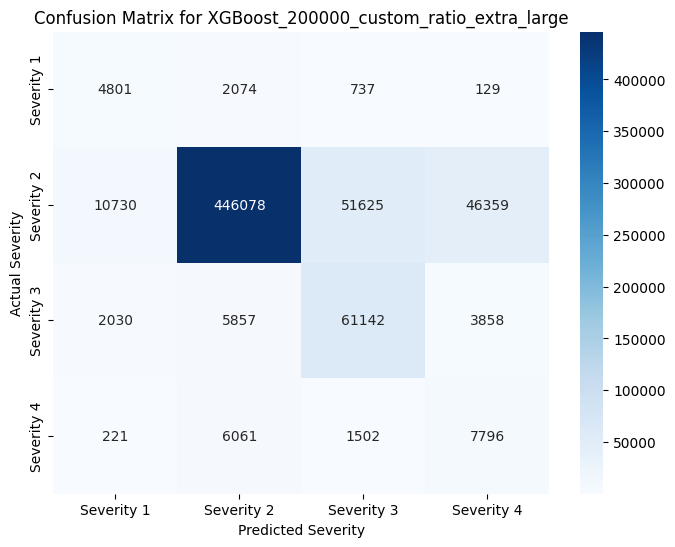


Overall Metrics for XGBoost_200000_custom_ratio_extra_large:
  Accuracy: 0.7985
  F1-Macro: 0.5294
  F1-Weighted: 0.8316
  Precision-Macro: 0.4763
  Recall-Macro: 0.6909
  Balanced Accuracy: 0.6909
  Matthews Correlation Coefficient (MCC): 0.5023
  Cohen's Kappa: 0.4633
--------------------------------------------------

--- Metrics for Model: RandomForest_200000_class_weight_medium ---

Classification Report:
              precision    recall  f1-score   support

  Severity 1       0.25      0.54      0.35      7741
  Severity 2       0.96      0.85      0.90    554792
  Severity 3       0.55      0.83      0.66     72887
  Severity 4       0.17      0.39      0.24     15580

    accuracy                           0.83    651000
   macro avg       0.48      0.65      0.54    651000
weighted avg       0.89      0.83      0.85    651000


Confusion Matrix (Rows: True, Columns: Predicted):
[[  4178   2469   1034     60]
 [ 11030 469097  46835  27830]
 [  1131   9256  60292   2208]
 [   

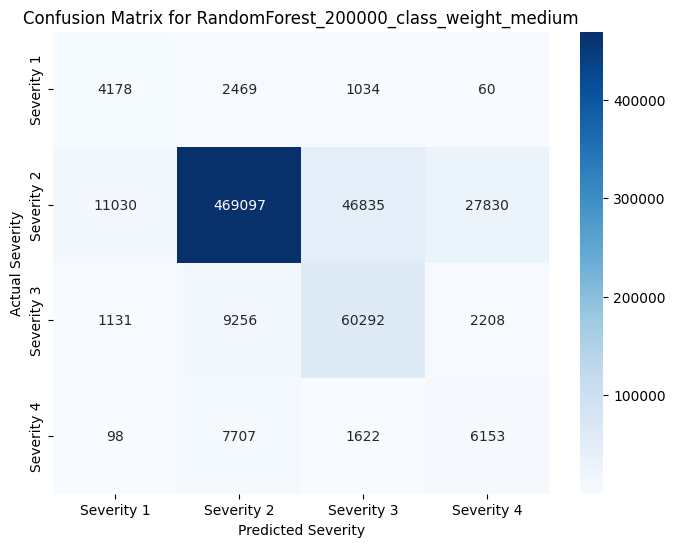


Overall Metrics for RandomForest_200000_class_weight_medium:
  Accuracy: 0.8291
  F1-Macro: 0.5356
  F1-Weighted: 0.8500
  Precision-Macro: 0.4833
  Recall-Macro: 0.6518
  Balanced Accuracy: 0.6518
  Matthews Correlation Coefficient (MCC): 0.5206
  Cohen's Kappa: 0.4972
--------------------------------------------------

--- Metrics for Model: XGBoost_200000_class_weight_extra_large ---

Classification Report:
              precision    recall  f1-score   support

  Severity 1       0.27      0.62      0.38      7741
  Severity 2       0.97      0.80      0.88    554792
  Severity 3       0.53      0.84      0.65     72887
  Severity 4       0.13      0.50      0.21     15580

    accuracy                           0.80    651000
   macro avg       0.48      0.69      0.53    651000
weighted avg       0.89      0.80      0.83    651000


Confusion Matrix (Rows: True, Columns: Predicted):
[[  4801   2074    737    129]
 [ 10730 446078  51625  46359]
 [  2030   5857  61142   3858]
 [   

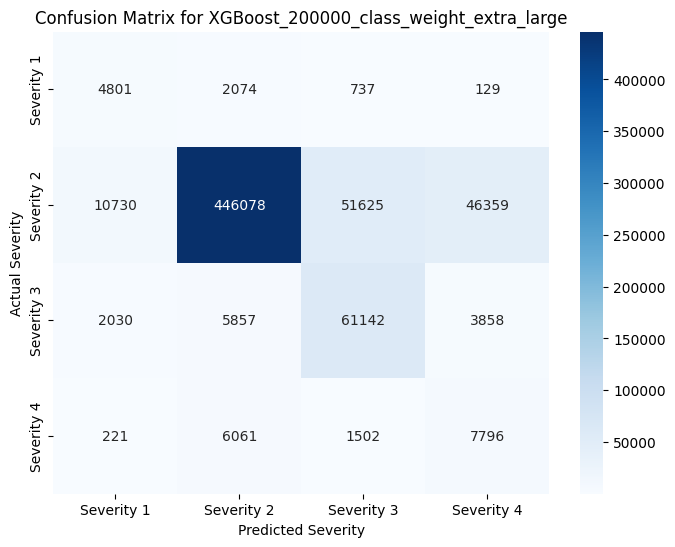


Overall Metrics for XGBoost_200000_class_weight_extra_large:
  Accuracy: 0.7985
  F1-Macro: 0.5294
  F1-Weighted: 0.8316
  Precision-Macro: 0.4763
  Recall-Macro: 0.6909
  Balanced Accuracy: 0.6909
  Matthews Correlation Coefficient (MCC): 0.5023
  Cohen's Kappa: 0.4633
--------------------------------------------------


           SUMMARY METRICS DATAFRAME             
                          model_identifier  accuracy  f1_macro  f1_weighted  balanced_accuracy  precision_macro  recall_macro    mcc  cohen_kappa  f1_class1  precision_class1  recall_class1  support_class1  f1_class2  precision_class2  recall_class2  support_class2  f1_class3  precision_class3  recall_class3  support_class3  f1_class4  precision_class4  recall_class4  support_class4                                                                                         confusion_matrix_str
0  XGBoost_200000_custom_ratio_extra_large    0.7985    0.5294       0.8316             0.6909           0.4763        0.6909 0.50

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    matthews_corrcoef,
    balanced_accuracy_score,
    cohen_kappa_score
)
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming all_predictions_for_analysis is populated as per your script:
# all_predictions_for_analysis[model_identifier] = {
#     'y_true': y_true_series,
#     'y_pred': y_pred_series,
#     'y_proba': y_proba_array,
#     'X_val_features': X_val_features_dataframe
# }

# Define the fixed labels for your classes
fixed_report_labels = [1, 2, 3, 4]
class_names = ['Severity 1', 'Severity 2', 'Severity 3', 'Severity 4'] # For nicer plots

metrics_summary_list = []

print("\n\n=================================================")
print(" DETAILED PERFORMANCE METRICS FOR SELECTED MODELS")
print("=================================================\n")

for model_id, data in all_predictions_for_analysis.items():
    print(f"\n--- Metrics for Model: {model_id} ---")
    y_true = data['y_true']
    y_pred = data['y_pred']

    if y_pred.empty or y_pred.isnull().all():
        print(f"  WARNING: No valid predictions found for {model_id}. Skipping metrics calculation.")
        metrics_summary_list.append({
            'model_identifier': model_id,
            'error_message': 'No valid predictions'
        })
        continue

    # Ensure y_pred is integer and handle any lingering NaNs (e.g., if fillna in get_predictions failed for an edge case)
    # A simple fill with the mode of y_true or a default class like 1 or 2
    if y_pred.isnull().any():
        fill_value = y_true.mode()[0] if not y_true.empty else fixed_report_labels[0]
        print(f"  Note: Filling {y_pred.isnull().sum()} NaN predictions with {fill_value} for metrics calculation.")
        y_pred = y_pred.fillna(fill_value)
    y_pred = y_pred.astype(int)


    # 1. Classification Report (Dictionary and String)
    report_dict = classification_report(
        y_true, y_pred,
        labels=fixed_report_labels,
        target_names=class_names, # For readable report
        output_dict=True,
        zero_division=0
    )
    report_str = classification_report(
        y_true, y_pred,
        labels=fixed_report_labels,
        target_names=class_names,
        zero_division=0
    )
    print("\nClassification Report:")
    print(report_str)

    # 2. Confusion Matrix
    cm = confusion_matrix(y_true, y_pred, labels=fixed_report_labels)
    print("\nConfusion Matrix (Rows: True, Columns: Predicted):")
    print(cm)

    # Plotting Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix for {model_id}')
    plt.ylabel('Actual Severity')
    plt.xlabel('Predicted Severity')
    plt.show()

    # 3. Overall Metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1_macro = f1_score(y_true, y_pred, labels=fixed_report_labels, average='macro', zero_division=0)
    f1_weighted = f1_score(y_true, y_pred, labels=fixed_report_labels, average='weighted', zero_division=0)
    precision_macro = precision_score(y_true, y_pred, labels=fixed_report_labels, average='macro', zero_division=0)
    recall_macro = recall_score(y_true, y_pred, labels=fixed_report_labels, average='macro', zero_division=0)
    mcc = matthews_corrcoef(y_true, y_pred)
    bal_acc = balanced_accuracy_score(y_true, y_pred)
    # Adjust y for cohen_kappa_score if it does not accept labels argument in your sklearn version or if issues arise
    # For newer sklearn, labels param should work.
    kappa = cohen_kappa_score(y_true, y_pred, labels=fixed_report_labels)


    print(f"\nOverall Metrics for {model_id}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  F1-Macro: {f1_macro:.4f}")
    print(f"  F1-Weighted: {f1_weighted:.4f}")
    print(f"  Precision-Macro: {precision_macro:.4f}")
    print(f"  Recall-Macro: {recall_macro:.4f}")
    print(f"  Balanced Accuracy: {bal_acc:.4f}")
    print(f"  Matthews Correlation Coefficient (MCC): {mcc:.4f}")
    print(f"  Cohen's Kappa: {kappa:.4f}")

    # Store for summary DataFrame
    current_model_summary = {
        'model_identifier': model_id,
        'accuracy': accuracy,
        'f1_macro': f1_macro,
        'f1_weighted': f1_weighted,
        'precision_macro': precision_macro,
        'recall_macro': recall_macro,
        'balanced_accuracy': bal_acc,
        'mcc': mcc,
        'cohen_kappa': kappa,
        'confusion_matrix_str': str(cm.tolist()) # For storage if needed
    }

    for i, label_name in enumerate(class_names):
        original_label = fixed_report_labels[i] # 1, 2, 3, 4
        if str(original_label) in report_dict: # report_dict keys might be '1', '2', ...
            key = str(original_label)
        elif label_name in report_dict: # or 'Severity 1', ...
            key = label_name
        else:
            # Fallback if neither key structure is found (should not happen with consistent labels)
            print(f"  Warning: Metrics for class '{label_name}' (label {original_label}) not found in report_dict for {model_id}.")
            current_model_summary[f'precision_class{original_label}'] = 0.0
            current_model_summary[f'recall_class{original_label}'] = 0.0
            current_model_summary[f'f1_class{original_label}'] = 0.0
            current_model_summary[f'support_class{original_label}'] = report_dict.get(str(original_label), {}).get('support', np.sum(y_true == original_label)) # Get support from y_true if not in report
            continue

        current_model_summary[f'precision_class{original_label}'] = report_dict[key]['precision']
        current_model_summary[f'recall_class{original_label}'] = report_dict[key]['recall']
        current_model_summary[f'f1_class{original_label}'] = report_dict[key]['f1-score']
        current_model_summary[f'support_class{original_label}'] = report_dict[key]['support']

    metrics_summary_list.append(current_model_summary)
    print("-" * 50)

# Create a summary DataFrame
metrics_summary_df = pd.DataFrame(metrics_summary_list)

# Define order of columns for better readability
ordered_cols = [
    'model_identifier', 'accuracy', 'f1_macro', 'f1_weighted',
    'balanced_accuracy', 'precision_macro', 'recall_macro', 'mcc', 'cohen_kappa',
    'f1_class1', 'precision_class1', 'recall_class1', 'support_class1',
    'f1_class2', 'precision_class2', 'recall_class2', 'support_class2',
    'f1_class3', 'precision_class3', 'recall_class3', 'support_class3',
    'f1_class4', 'precision_class4', 'recall_class4', 'support_class4',
    'confusion_matrix_str', 'error_message'
]
# Filter out columns not present in metrics_summary_df (like 'error_message' if no errors)
final_ordered_cols = [col for col in ordered_cols if col in metrics_summary_df.columns]
metrics_summary_df = metrics_summary_df[final_ordered_cols]


print("\n\n=================================================")
print("           SUMMARY METRICS DATAFRAME             ")
print("=================================================")
# Format float columns for better display
float_cols_to_format = [col for col in metrics_summary_df.columns
                        if metrics_summary_df[col].dtype == 'float64' or metrics_summary_df[col].dtype == 'float32']

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(metrics_summary_df.to_string(float_format="%.4f"))

# You can now easily copy from this DataFrame output for your thesis.
# For example, to get a specific model's F1 for class 4:
# model_id_to_check = 'XGBoost_200000_custom_ratio_extra_large'
# f1_c4 = metrics_summary_df[metrics_summary_df['model_identifier'] == model_id_to_check]['f1_class4'].values
# if len(f1_c4) > 0:
#     print(f"\nF1-score for Class 4 for {model_id_to_check}: {f1_c4[0]:.4f}")



 DETAILED PERFORMANCE METRICS (INCL. ROC/AUC) FOR SELECTED MODELS


--- Metrics for Model: XGBoost_200000_custom_ratio_extra_large ---

Classification Report:
              precision    recall  f1-score   support

  Severity 1       0.27      0.62      0.38      7741
  Severity 2       0.97      0.80      0.88    554792
  Severity 3       0.53      0.84      0.65     72887
  Severity 4       0.13      0.50      0.21     15580

    accuracy                           0.80    651000
   macro avg       0.48      0.69      0.53    651000
weighted avg       0.89      0.80      0.83    651000



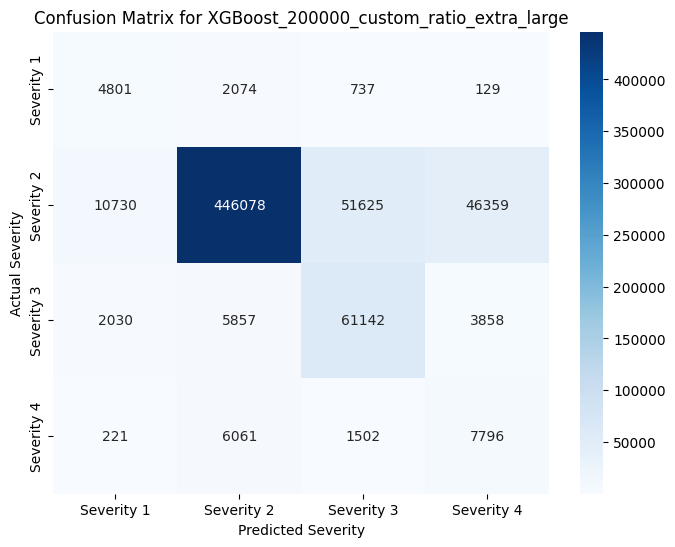

  AUC for Class 1 (OvR): 0.8505
  AUC for Class 2 (OvR): 0.8826
  AUC for Class 3 (OvR): 0.9367
  AUC for Class 4 (OvR): 0.7331


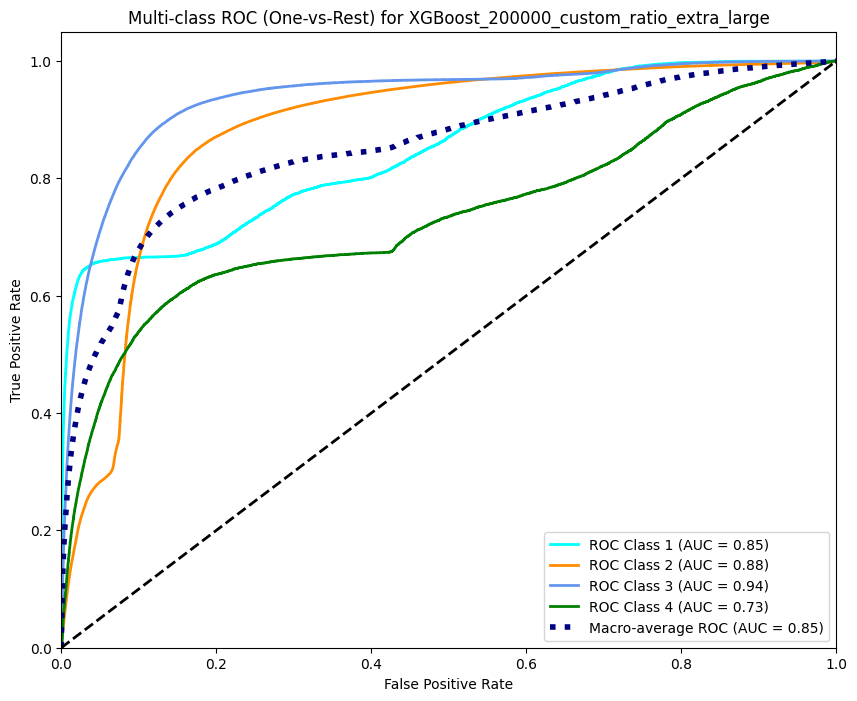

  AUC Macro Average (OvR): 0.8507
--------------------------------------------------

--- Metrics for Model: RandomForest_200000_class_weight_medium ---

Classification Report:
              precision    recall  f1-score   support

  Severity 1       0.25      0.54      0.35      7741
  Severity 2       0.96      0.85      0.90    554792
  Severity 3       0.55      0.83      0.66     72887
  Severity 4       0.17      0.39      0.24     15580

    accuracy                           0.83    651000
   macro avg       0.48      0.65      0.54    651000
weighted avg       0.89      0.83      0.85    651000



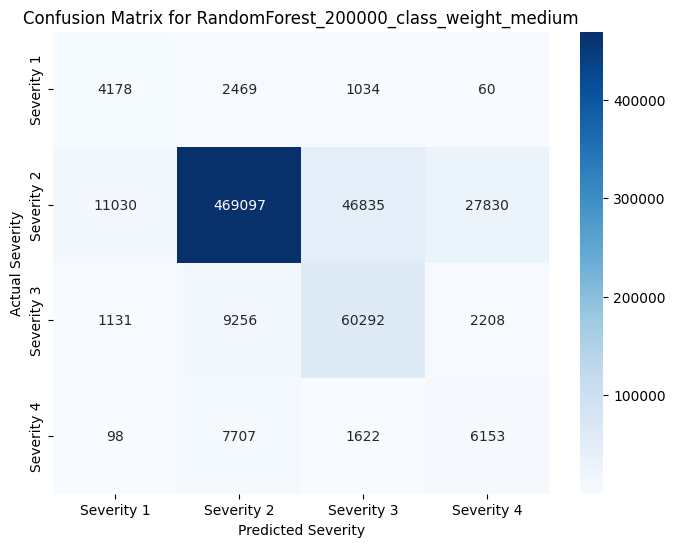

  AUC for Class 1 (OvR): 0.8187
  AUC for Class 2 (OvR): 0.8736
  AUC for Class 3 (OvR): 0.9338
  AUC for Class 4 (OvR): 0.7236


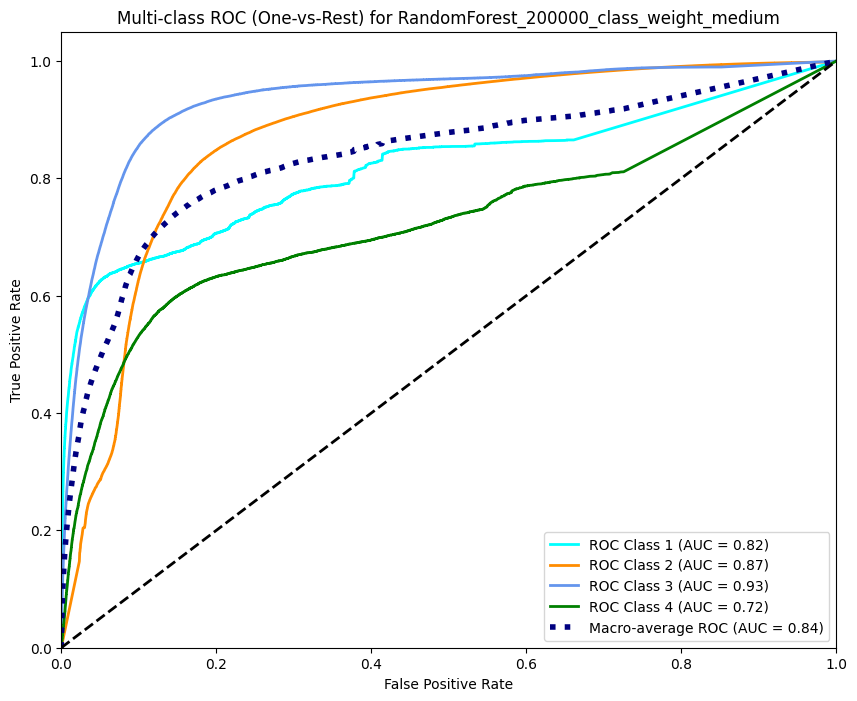

  AUC Macro Average (OvR): 0.8374
--------------------------------------------------

--- Metrics for Model: XGBoost_200000_class_weight_extra_large ---

Classification Report:
              precision    recall  f1-score   support

  Severity 1       0.27      0.62      0.38      7741
  Severity 2       0.97      0.80      0.88    554792
  Severity 3       0.53      0.84      0.65     72887
  Severity 4       0.13      0.50      0.21     15580

    accuracy                           0.80    651000
   macro avg       0.48      0.69      0.53    651000
weighted avg       0.89      0.80      0.83    651000



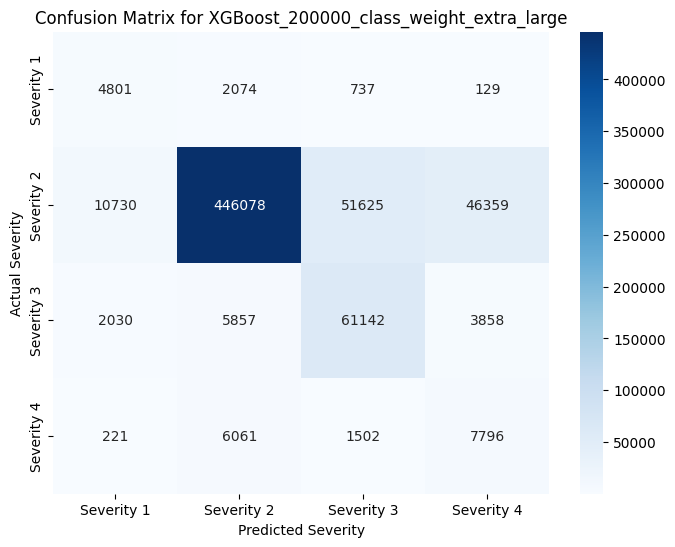

  AUC for Class 1 (OvR): 0.8505
  AUC for Class 2 (OvR): 0.8826
  AUC for Class 3 (OvR): 0.9367
  AUC for Class 4 (OvR): 0.7331


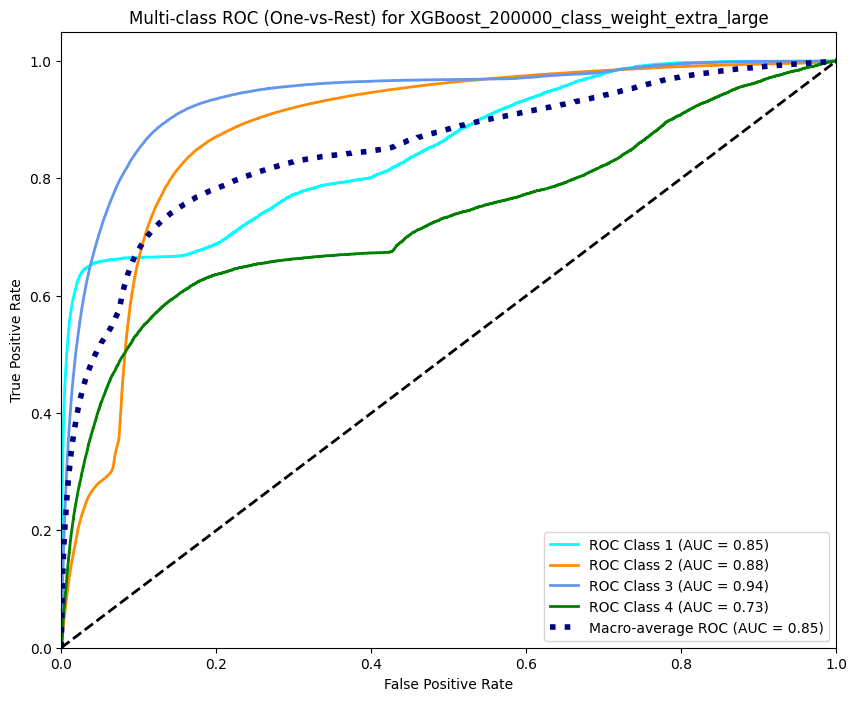

  AUC Macro Average (OvR): 0.8507
--------------------------------------------------


      SUMMARY METRICS DATAFRAME (WITH AUC)       
                          model_identifier  accuracy  f1_macro  balanced_accuracy  roc_auc_macro_ovr  f1_class1  precision_class1  recall_class1  roc_auc_class1_ovr  support_class1  f1_class2  precision_class2  recall_class2  roc_auc_class2_ovr  support_class2  f1_class3  precision_class3  recall_class3  roc_auc_class3_ovr  support_class3  f1_class4  precision_class4  recall_class4  roc_auc_class4_ovr  support_class4
0  XGBoost_200000_custom_ratio_extra_large    0.7985    0.5294             0.6909             0.8507     0.0000            0.0000         0.0000              0.8505            7741     0.0000            0.0000         0.0000              0.8826          554792     0.0000            0.0000         0.0000              0.9367           72887     0.0000            0.0000         0.0000              0.7331           15580
1  RandomForest_20000

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    matthews_corrcoef,
    balanced_accuracy_score,
    cohen_kappa_score,
    roc_curve,  # Added
    auc         # Added
)
from sklearn.preprocessing import label_binarize # Added for OvR
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle # Added for plotting multiple ROC curves

# Assuming all_predictions_for_analysis is populated:
# all_predictions_for_analysis[model_identifier] = {
#     'y_true': y_true_series,
#     'y_pred': y_pred_series, # Predicted class labels
#     'y_proba': y_proba_array, # Probabilities for each class
#     'X_val_features': X_val_features_dataframe
# }

fixed_report_labels = [1, 2, 3, 4] # Your actual class labels
class_names = ['Severity 1', 'Severity 2', 'Severity 3', 'Severity 4']
n_classes = len(fixed_report_labels)

metrics_summary_list = [] # To store metrics including AUC

print("\n\n=================================================")
print(" DETAILED PERFORMANCE METRICS (INCL. ROC/AUC) FOR SELECTED MODELS")
print("=================================================\n")

for model_id, data in all_predictions_for_analysis.items():
    print(f"\n--- Metrics for Model: {model_id} ---")
    y_true_original_labels = data['y_true'] # Labels are 1, 2, 3, 4
    y_pred_original_labels = data['y_pred'] # Labels are 1, 2, 3, 4
    y_proba = data['y_proba']           # Probabilities, shape (n_samples, n_proba_outputs)

    if y_pred_original_labels.empty or y_pred_original_labels.isnull().all():
        print(f"  WARNING: No valid predictions found for {model_id}. Skipping metrics calculation.")
        metrics_summary_list.append({
            'model_identifier': model_id,
            'error_message': 'No valid predictions'
        })
        continue

    if y_proba is None or y_proba.shape[0] == 0:
        print(f"  WARNING: No valid probabilities (y_proba) found for {model_id}. Skipping ROC/AUC.")
        # Proceed with other metrics if y_pred is available
    else:
        # Ensure y_proba columns align with fixed_report_labels order for binarization
        # If your y_proba columns are already ordered [P(class1), P(class2), P(class3), P(class4)]
        # and fixed_report_labels is [1,2,3,4], this is fine.
        # If y_proba comes from a model where model.classes_ might not match fixed_report_labels order
        # or if the number of probability outputs is different from n_classes (e.g., NN trained on fewer classes),
        # this part needs careful handling.
        # For now, assume y_proba has n_classes columns corresponding to fixed_report_labels
        if y_proba.shape[1] != n_classes:
            print(f"  WARNING: y_proba for {model_id} has {y_proba.shape[1]} columns, expected {n_classes}. ROC/AUC might be inaccurate or skipped.")
            can_calc_roc = False
        else:
            can_calc_roc = True


    # --- Standard Metrics (as before) ---
    if y_pred_original_labels.isnull().any():
        fill_value = y_true_original_labels.mode()[0] if not y_true_original_labels.empty else fixed_report_labels[0]
        y_pred_original_labels = y_pred_original_labels.fillna(fill_value)
    y_pred_original_labels = y_pred_original_labels.astype(int)

    report_dict = classification_report(y_true_original_labels, y_pred_original_labels, labels=fixed_report_labels, target_names=class_names, output_dict=True, zero_division=0)
    report_str = classification_report(y_true_original_labels, y_pred_original_labels, labels=fixed_report_labels, target_names=class_names, zero_division=0)
    print("\nClassification Report:")
    print(report_str)
    cm = confusion_matrix(y_true_original_labels, y_pred_original_labels, labels=fixed_report_labels)
    # ... (Plot CM as before) ...
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix for {model_id}')
    plt.ylabel('Actual Severity')
    plt.xlabel('Predicted Severity')
    plt.show()

    accuracy = accuracy_score(y_true_original_labels, y_pred_original_labels)
    f1_macro_val = f1_score(y_true_original_labels, y_pred_original_labels, labels=fixed_report_labels, average='macro', zero_division=0)
    # ... (other metrics as before) ...
    bal_acc = balanced_accuracy_score(y_true_original_labels, y_pred_original_labels)


    # --- ROC Curve and AUC (One-vs-Rest) ---
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    roc_auc_macro_avg = None # Initialize

    if can_calc_roc: # Only proceed if y_proba is valid
        # Binarize the true labels for OvR
        # `classes` argument should be your original, unique class labels [1, 2, 3, 4]
        y_true_binarized = label_binarize(y_true_original_labels, classes=fixed_report_labels)

        # Check if binarization produced the correct number of columns
        if y_true_binarized.shape[1] != n_classes:
            print(f"  WARNING: Binarized y_true has {y_true_binarized.shape[1]} columns, expected {n_classes} for model {model_id}. Skipping ROC/AUC.")
            # This could happen if some classes are entirely missing in y_true_original_labels for a particular fold/dataset
            # (though unlikely for the full validation set if it's representative)
        else:
            plt.figure(figsize=(10, 8))
            colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green']) # One color per class

            for i in range(n_classes):
                class_label_original = fixed_report_labels[i] # e.g., 1, 2, 3, 4
                fpr[class_label_original], tpr[class_label_original], _ = roc_curve(y_true_binarized[:, i], y_proba[:, i])
                roc_auc[class_label_original] = auc(fpr[class_label_original], tpr[class_label_original])
                plt.plot(fpr[class_label_original], tpr[class_label_original], color=next(colors), lw=2,
                         label=f'ROC Class {class_label_original} (AUC = {roc_auc[class_label_original]:.2f})')
                print(f"  AUC for Class {class_label_original} (OvR): {roc_auc[class_label_original]:.4f}")

            # Compute macro-average ROC curve and ROC area
            # First, aggregate all false positive rates
            all_fpr = np.unique(np.concatenate([fpr[fixed_report_labels[j]] for j in range(n_classes)]))
            # Then interpolate all ROC curves at these points
            mean_tpr = np.zeros_like(all_fpr)
            for i in range(n_classes):
                mean_tpr += np.interp(all_fpr, fpr[fixed_report_labels[i]], tpr[fixed_report_labels[i]])
            # Finally, average it and compute AUC
            mean_tpr /= n_classes
            fpr["macro"] = all_fpr
            tpr["macro"] = mean_tpr
            roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
            roc_auc_macro_avg = roc_auc["macro"] # Store for summary

            plt.plot(fpr["macro"], tpr["macro"],
                     label=f'Macro-average ROC (AUC = {roc_auc["macro"]:.2f})',
                     color='navy', linestyle=':', linewidth=4)

            plt.plot([0, 1], [0, 1], 'k--', lw=2) # Diagonal
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'Multi-class ROC (One-vs-Rest) for {model_id}')
            plt.legend(loc="lower right")
            plt.show()
            print(f"  AUC Macro Average (OvR): {roc_auc['macro']:.4f}")
    else: # if not can_calc_roc
        for i in range(n_classes):
            roc_auc[fixed_report_labels[i]] = np.nan # Set to NaN if cannot calculate
        roc_auc["macro"] = np.nan
        roc_auc_macro_avg = np.nan


    # Store for summary DataFrame
    current_model_summary = {
        'model_identifier': model_id,
        'accuracy': accuracy,
        'f1_macro': f1_macro_val,
        'balanced_accuracy': bal_acc,
        'roc_auc_macro_ovr': roc_auc_macro_avg, # Add the macro AUC
        # ... other overall metrics ...
    }
    for i, label_name in enumerate(class_names):
        original_label = fixed_report_labels[i]
        key_in_report = str(original_label) # Assuming report_dict uses '1', '2', etc.

        current_model_summary[f'precision_class{original_label}'] = report_dict.get(key_in_report, {}).get('precision', 0.0)
        current_model_summary[f'recall_class{original_label}'] = report_dict.get(key_in_report, {}).get('recall', 0.0)
        current_model_summary[f'f1_class{original_label}'] = report_dict.get(key_in_report, {}).get('f1-score', 0.0)
        current_model_summary[f'support_class{original_label}'] = report_dict.get(key_in_report, {}).get('support', np.sum(y_true_original_labels == original_label))
        current_model_summary[f'roc_auc_class{original_label}_ovr'] = roc_auc.get(original_label, np.nan) # Add per-class AUC

    metrics_summary_list.append(current_model_summary)
    print("-" * 50)

# Create a summary DataFrame
metrics_summary_df = pd.DataFrame(metrics_summary_list)

# Update ordered_cols to include AUCs
ordered_cols = [
    'model_identifier', 'accuracy', 'f1_macro', 'balanced_accuracy', 'roc_auc_macro_ovr',
    'f1_class1', 'precision_class1', 'recall_class1', 'roc_auc_class1_ovr', 'support_class1',
    'f1_class2', 'precision_class2', 'recall_class2', 'roc_auc_class2_ovr', 'support_class2',
    'f1_class3', 'precision_class3', 'recall_class3', 'roc_auc_class3_ovr', 'support_class3',
    'f1_class4', 'precision_class4', 'recall_class4', 'roc_auc_class4_ovr', 'support_class4',
    'error_message'
]
final_ordered_cols = [col for col in ordered_cols if col in metrics_summary_df.columns]
metrics_summary_df = metrics_summary_df[final_ordered_cols]

print("\n\n=================================================")
print("      SUMMARY METRICS DATAFRAME (WITH AUC)       ")
print("=================================================")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000) # Adjust width as needed
print(metrics_summary_df.to_string(float_format="%.4f"))